In [ ]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vector
from pathlib import Path
import time
import DataHandling as DH
import Plotting as mplt
import warnings
warnings.filterwarnings('ignore')

# Try to import awkward for vector branch handling
try:
    import awkward as ak
    AWKWARD_AVAILABLE = True
except ImportError:
    AWKWARD_AVAILABLE = False

preSavefig='Plots/0708/'
sufSavefig='_0708.png'

### Loading the dataframe containing computed 4vecs

N.B. : We are loading the light version with only the essential half of variables

In [ ]:
# Load DataFrame from pickle file
start_time = time.time()
df_with_4vecs = pd.read_pickle('df_with_4vecs.pkl')
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")

In [3]:
#Printing the dataframe to check correct loading
df_with_4vecs

PDFinfo_PDGID1  PDFinfo_PDGID2   PDFinfo_Q  PDFinfo_X1  PDFinfo_X2  \
0                   21              21  175.477707    0.018292    0.043399   
1                   21              21  199.347641    0.033969    0.072345   
2                   21              21  175.820526    0.212367    0.054992   
3                   21              21  184.677887    0.050892    0.016144   
4                   21              21  182.340729    0.074167    0.014212   
...                ...             ...         ...         ...         ...   
911143              21              21  254.847504    0.039080    0.050805   
911144              21              21  231.103027    0.064083    0.019838   
911145              21              21  188.113983    0.047282    0.017741   
911146              21              21  204.972458    0.105190    0.095418   
911147              21              21  389.670410    0.162846    0.063400   

        PDFinfo_XF1  PDFinfo_XF2 el_charge         el_eta       el_phi  ...  \
0          5.279873     2.428524        []             []           []  ...   
1          3.081088     1.338084    [-1.0]  [0.019284088]  [0.8802953]  ...   
2          0.210094     1.879462        []             []           []  ...   
3          2.043449     5.821816     [1.0]    [1.0029755]  [3.1009815]  ...   
4          1.305422     6.411271        []             []           []  ...   
...             ...          ...       ...            ...          ...  ...   
911143     2.657006     2.007821        []             []           []  ...   
911144     1.538785     4.940284        []             []           []  ...   
911145     2.210978     5.409729     [1.0]   [0.29584903]  [1.6508919]  ...   
911146     0.780996     0.905981     [1.0]   [0.70628667]  [2.1698506]  ...   
911147     0.333231     1.500760        []             []           []  ...   

                                                  up_4vec  \
0       MomentumObject4D(pt=35.376197814941406, phi=-2...   
1       MomentumObject4D(pt=31.418272018432617, phi=-1...   
2       MomentumObject4D(pt=135.8825225830078, phi=-1....   
3       MomentumObject4D(pt=65.02371978759766, phi=-0....   
4       MomentumObject4D(pt=83.33775329589844, phi=1.8...   
...                                                   ...   
911143  MomentumObject4D(pt=159.6160125732422, phi=-0....   
911144  MomentumObject4D(pt=84.85799407958984, phi=-3....   
911145  MomentumObject4D(pt=50.544708251953125, phi=-1...   
911146  MomentumObject4D(pt=56.51493453979492, phi=0.6...   
911147  MomentumObject4D(pt=49.42021560668945, phi=-0....   

                                               had_b_4vec  \
0       MomentumObject4D(pt=49.75637435913086, phi=1.3...   
1       MomentumObject4D(pt=118.49435424804688, phi=2....   
2       MomentumObject4D(pt=61.62810516357422, phi=2.9...   
3       MomentumObject4D(pt=62.58217239379883, phi=1.3...   
4       MomentumObject4D(pt=31.728225708007812, phi=2....   
...                                                   ...   
911143  MomentumObject4D(pt=32.94810485839844, phi=0.4...   
911144  MomentumObject4D(pt=34.719581604003906, phi=-1...   
911145  MomentumObject4D(pt=71.86709594726562, phi=0.7...   
911146  MomentumObject4D(pt=49.36479568481445, phi=-1....   
911147  MomentumObject4D(pt=139.12086486816406, phi=0....   

                                               lep_b_4vec  \
0       MomentumObject4D(pt=80.4171142578125, phi=0.30...   
1       MomentumObject4D(pt=62.8841552734375, phi=-0.5...   
2       MomentumObject4D(pt=109.79779815673828, phi=-2...   
3       MomentumObject4D(pt=35.11328887939453, phi=0.9...   
4       MomentumObject4D(pt=53.85918045043945, phi=-0....   
...                                                   ...   
911143  MomentumObject4D(pt=38.77629852294922, phi=0.4...   
911144  MomentumObject4D(pt=80.201416015625, phi=-0.84...   
911145  MomentumObject4D(pt=58.108062744140625, phi=-0...   
911146  MomentumObject4D(pt=111.63873291015625

### Studying the invariant masses of had_t & lep_t and applying a cut to keep only physical events

In [4]:
start_time = time.time()
had_t_mass=np.empty(len(df_with_4vecs))
lep_t_mass=np.empty(len(df_with_4vecs))

for i in range(len(df_with_4vecs)):
    had_t_mass[i] = df_with_4vecs['had_t'][i].mass
    lep_t_mass[i] = df_with_4vecs['lep_t'][i].mass

creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 18.5141 seconds


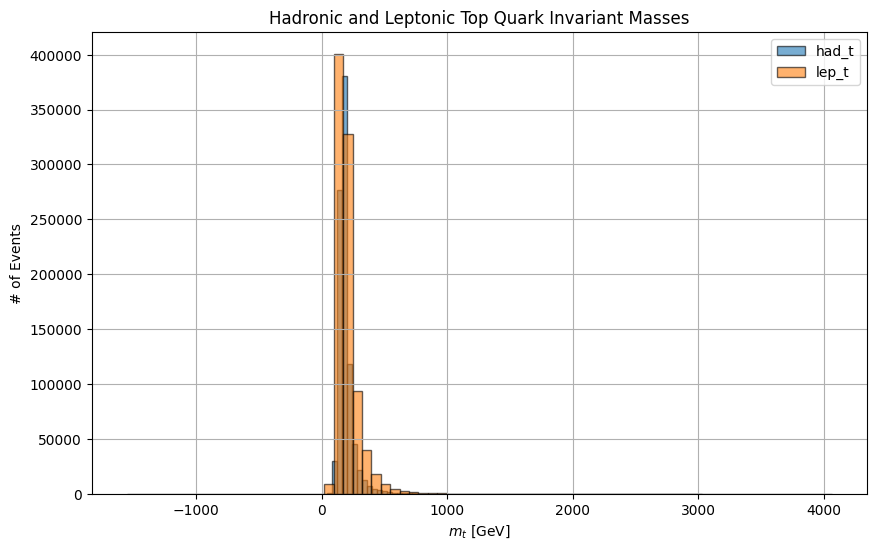

In [5]:
plt.figure(figsize=(10, 6))
n_had,_,_=plt.hist(had_t_mass, bins=75, alpha=0.6, edgecolor='black', density=False, label='had_t')
n_lep,_,_=plt.hist(lep_t_mass, bins=75, alpha=0.6, edgecolor='black', density=False, label='lep_t')

plt.xlabel(r'$m_{t}$ [GeV]')
plt.ylabel("# of Events")
# plt.xticks(np.arange(-200, 1100, 50),rotation=45)
plt.title('Hadronic and Leptonic Top Quark Invariant Masses')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.show()

# print("N_had events:", n_had.sum(),len(had_t_mass))
# print("N_lep events:", n_lep, len(lep_t_mass))

In [18]:
#Some info about the masses
print("=" * 80)
print(f'------------------------------- Informative panel ------------------------------')
print("=" * 80)
print(f"| Total number of Lep t masses : {len(lep_t_mass)} \t\t\t\t\t|")
print(f"| Total number of Had t masses : {len(had_t_mass)} \t\t\t\t\t|")
print("=" * 80)
print(f"| Total number of Lep t masses < 0 : {len(lep_t_mass[lep_t_mass<0])} || relative fraction: {(len(lep_t_mass[lep_t_mass<0])/len(lep_t_mass))*100:.3f}% \t\t|")
print(f"| Total number of Had t masses < 0 : {len(had_t_mass[had_t_mass<0])} || relative fraction: {(len(lep_t_mass[had_t_mass<0])/len(had_t_mass))*100:.3f}% \t\t| ")
print("=" * 80)
print(f"| Total number of Lep t masses > 1 TeV : {len(lep_t_mass[lep_t_mass>1000])} || relative fraction: {(len(lep_t_mass[lep_t_mass>1000])/len(lep_t_mass))*100:.3f}% \t| ")
print(f"| Total number of Had t masses > 1 TeV : {len(had_t_mass[had_t_mass>1000])} || relative fraction: {(len(lep_t_mass[had_t_mass>1000])/len(had_t_mass))*100:.3f}% \t| ")
print("=" * 80)
varCut=(len(lep_t_mass[lep_t_mass>1000])+len(had_t_mass[had_t_mass>1000])+len(lep_t_mass[lep_t_mass<0])+len(had_t_mass[had_t_mass<0]))
print(f"| Total number of cut : {varCut} || relative fraction: {(varCut)/len(lep_t_mass)*100:.3f}% \t\t\t|")
print("=" * 80)
print(f"| Remaining data after cut : {len(lep_t_mass)-varCut} || relative fraction: {((len(lep_t_mass)-varCut)/len(lep_t_mass)*100):.3f}% \t\t|")
print("=" * 80)


------------------------------- Informative panel ------------------------------
| Total number of Lep t masses : 911148 					|
| Total number of Had t masses : 911148 					|
| Total number of Lep t masses < 0 : 840 || relative fraction: 0.092% 		|
| Total number of Had t masses < 0 : 0 || relative fraction: 0.000% 		| 
| Total number of Lep t masses > 1 TeV : 1186 || relative fraction: 0.130% 	| 
| Total number of Had t masses > 1 TeV : 884 || relative fraction: 0.097% 	| 
| Total number of cut : 2910 || relative fraction: 0.319% 			|
| Remaining data after cut : 908238 || relative fraction: 99.681% 		|


In [19]:
# Create mask for reasonable mass range
mass_min, mass_max = 0, 1000  # GeV
mask_had = (had_t_mass>= mass_min) & (had_t_mass <= mass_max)
mask_lep = (lep_t_mass>= mass_min) & (lep_t_mass <= mass_max)

# Create combined mask (&)
combined_mask_and = mask_had & mask_lep

# Apply the combined mask to filter the DataFrame
df_cut = df_with_4vecs[combined_mask_and].copy()

# Also filter the mass arrays for consistency
had_t_mass_cut = had_t_mass[combined_mask_and]
lep_t_mass_cut = lep_t_mass[combined_mask_and]

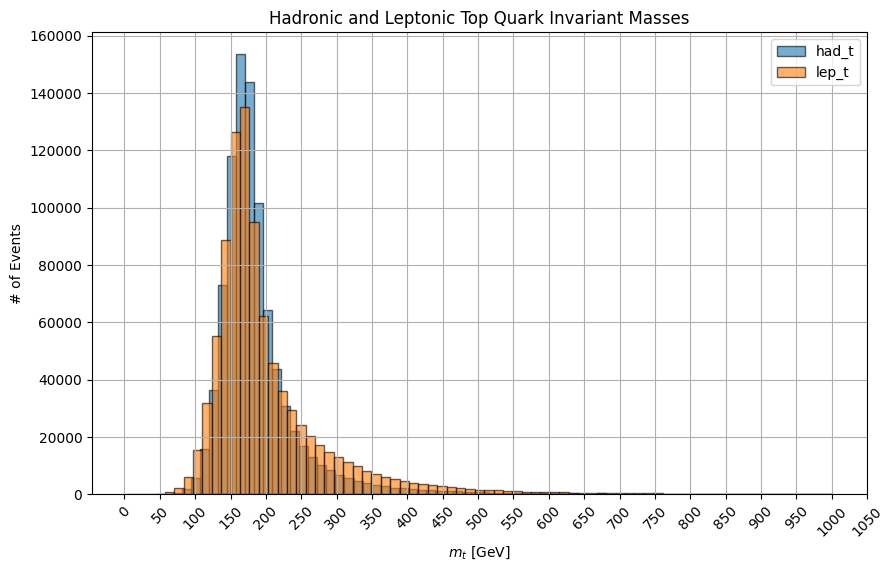

In [20]:
#Zoomed distributions
plt.figure(figsize=(10, 6))

n_had,_,_=plt.hist(had_t_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label='had_t')
n_had,_,_=plt.hist(lep_t_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label='lep_t')

plt.xlabel(r'$m_{t}$ [GeV]')
plt.ylabel("# of Events")
plt.xticks(np.arange(0, 1100, 50),rotation=45)
plt.title('Hadronic and Leptonic Top Quark Invariant Masses')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'Had_lep_t_mass_ZOOM'+sufSavefig)
plt.show()


In [21]:
print("=" * 80)
print(f"| Total number of Lep t masses : {len(lep_t_mass_cut)} \t\t\t\t\t|")
print(f"| Total number of Had t masses : {len(had_t_mass_cut)} \t\t\t\t\t|")
print(f"| Len of df_cut df : {len(df_cut)} \t\t\t\t\t\t\t|")
print("=" * 80)

| Total number of Lep t masses : 908258 					|
| Total number of Had t masses : 908258 					|
| Len of df_cut df : 908258 							|


In [22]:
#Computing the other needed variables with the new dataframe
start_time = time.time()

ttbar_mass=np.empty(len(df_with_4vecs))
ttbar_betaz=np.empty(len(df_with_4vecs))
ttbar_mass_cut=np.empty(len(df_cut))
ttbar_betaz_cut=np.empty(len(df_cut))
ttbar_pT=np.empty(len(df_cut))

for i in range(len(df_with_4vecs)):
    ttbar_mass[i] = df_with_4vecs['ttbar_4vec'][i].mass
    ttbar_betaz[i] = df_with_4vecs['ttbar_4vec'][i].pz/df_with_4vecs['ttbar_4vec'][i].e

for j in range(len(df_cut)):
    ttbar_mass_cut[j] = df_cut['ttbar_4vec'].iloc[j].m
    ttbar_betaz_cut[j] = df_cut['ttbar_4vec'].iloc[j].pz/df_cut['ttbar_4vec'].iloc[j].e
    ttbar_pT[j]=df_cut['ttbar_4vec'].iloc[j].pt
    
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 55.5536 seconds


## Physics Object Distributions

Plot distributions of key physics variables including the optimized neutrino properties.

In [23]:
# Define columns to plot with their display names
columns_to_plot = {
    # Muon properties
    'mu_eta': 'Muon η (Pseudorapidity)',
    'mu_phi': 'Muon φ [rad]', 
    'mu_e_NOSYS': 'Muon Energy [GeV]',
    'mu_pt_NOSYS': 'Muon pT [GeV]',
    
    # Electron properties  
    'el_eta': 'Electron η (Pseudorapidity)',
    'el_phi': 'Electron φ [rad]',
    'el_e_NOSYS': 'Electron Energy [GeV]', 
    'el_pt_NOSYS': 'Electron pT [GeV]',
    
    # Jet properties
    'jet_eta': 'Jet η (Pseudorapidity)',
    'jet_phi': 'Jet φ [rad]',
    'jet_e_NOSYS': 'Jet Energy [GeV]',
    'jet_pt_NOSYS': 'Jet pT [GeV]',
    
    # Neutrino momentum components
    'TtbarLjetsNu_spanet_reg_nu_px_NOSYS': 'Neutrino px [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_py_NOSYS': 'Neutrino py [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_pz_NOSYS': 'Neutrino pz [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_eta_NOSYS': 'Neutrino η (Pseudorapidity)'
}

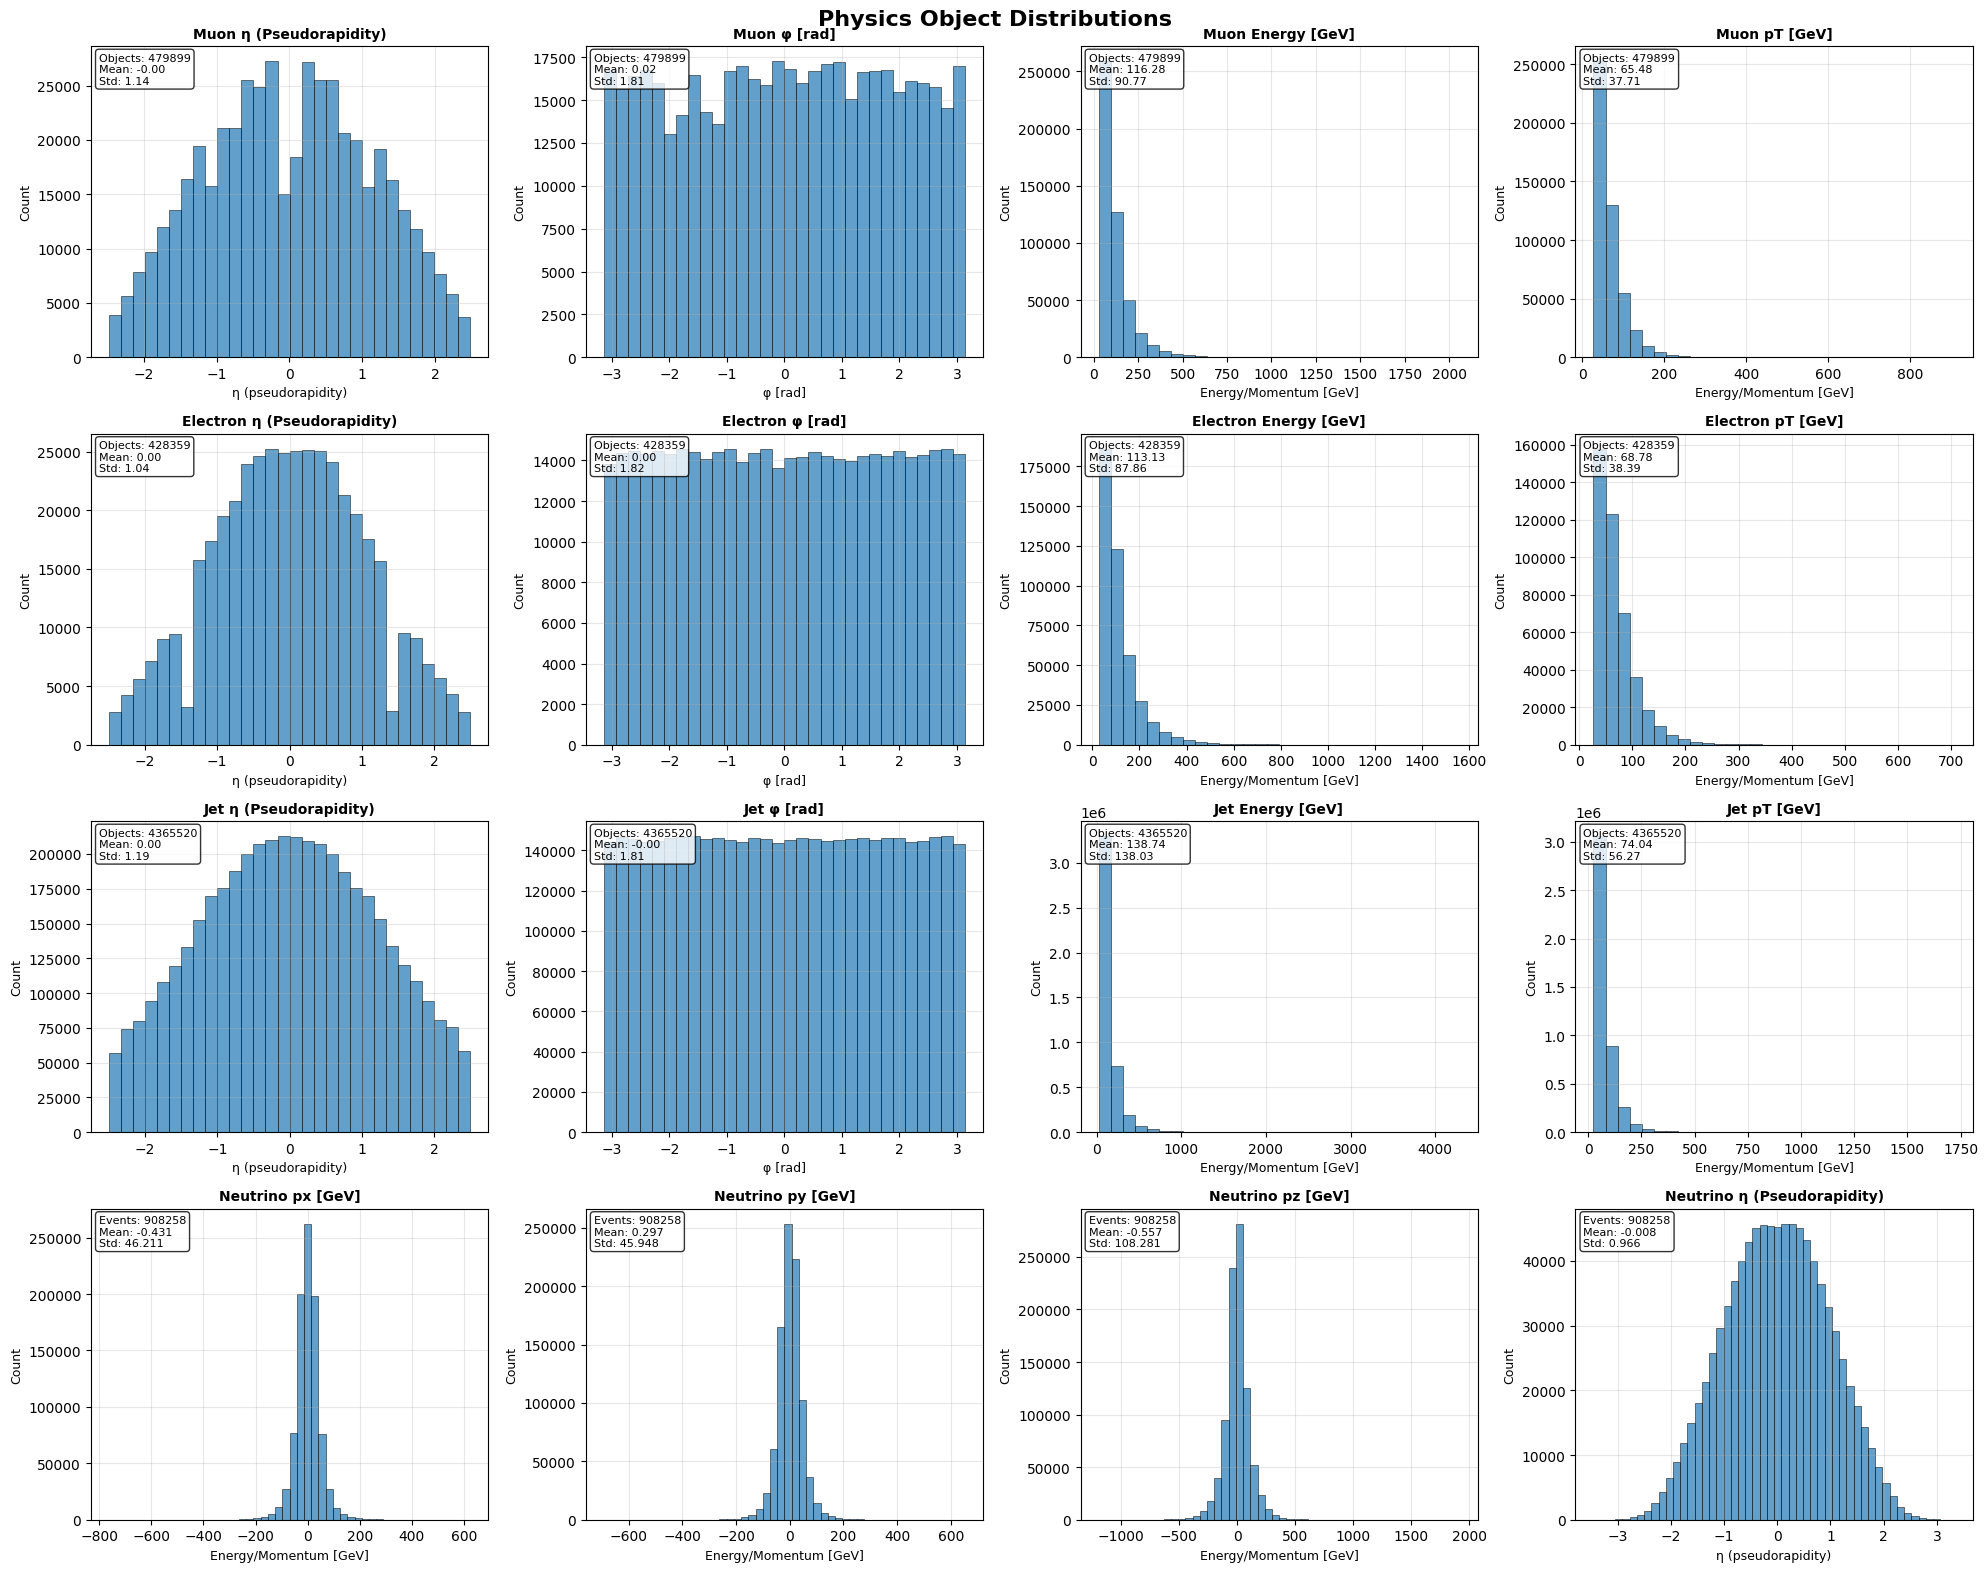

✅ Physics object distributions plotted successfully!


In [24]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Physics Object Distributions', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes_flat = axes.flatten()

for idx, (column, title) in enumerate(columns_to_plot.items()):
    ax = axes_flat[idx]
    
    if column in df_with_4vecs.columns:
        data = df_cut[column]
        
        # Check if data contains arrays (vector branch) or scalars
        sample_value = data.iloc[0]
        
        if isinstance(sample_value, (list, np.ndarray)) and hasattr(sample_value, '__len__'):
            # Vector branch - flatten all arrays
            all_values = []
            for event_data in data:
                if isinstance(event_data, (list, np.ndarray)) and len(event_data) > 0:
                    # Check if elements are not NaN before adding
                    valid_values = [val for val in event_data if not pd.isna(val)]
                    all_values.extend(valid_values)
            
            if len(all_values) > 0:
                plot_data = np.array(all_values)
                ax.hist(plot_data, bins=30, alpha=0.7, edgecolor='black', linewidth=0.5)
                
                # Add statistics
                stats_text = f'Objects: {len(plot_data)}\nMean: {plot_data.mean():.2f}\nStd: {plot_data.std():.2f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
        else:
            # Scalar branch or optimized neutrino columns
            plot_data = data.dropna()
            
            if len(plot_data) > 0:
                ax.hist(plot_data, bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
                
                # Add statistics
                stats_text = f'Events: {len(plot_data)}\nMean: {plot_data.mean():.3f}\nStd: {plot_data.std():.3f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
    else:
        ax.text(0.5, 0.5, f'Column\n{column}\nnot found', ha='center', va='center', transform=ax.transAxes)
    
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Set labels
    if 'GeV' in title:
        ax.set_xlabel('Energy/Momentum [GeV]', fontsize=9)
    elif 'η' in title:
        ax.set_xlabel('η (pseudorapidity)', fontsize=9)
    elif 'φ' in title:
        ax.set_xlabel('φ [rad]', fontsize=9)
    
    ax.set_ylabel('Count', fontsize=9)

plt.tight_layout()
plt.savefig(preSavefig+'PhysicsObjDistribution_cut'+sufSavefig)
plt.show()


print("✅ Physics object distributions plotted successfully!")

## Event Type Classification

Classify events based on the initial parton types using PDG IDs from the PDF information.
- **gg**: gluon-gluon collision (col1=21, col2=21)
- **qq**: quark-quark collision (col1≠21, col2≠21) 
- **gq**: gluon-quark collision (one is 21, the other is not)

In [25]:
# Apply the function to classify production types
df_cut = DH.production_classification(df_cut, verbose=True)

🚀 Creating event type classification based on PDG IDs
✅ Production type classification completed!

📊 Event type distribution:
   • gg: 794,173 events (87.4%)
   • qq: 81,153 events (8.9%)
   • gq: 32,932 events (3.6%)

🎯 Total classified events: 908,258
✅ All events successfully classified!


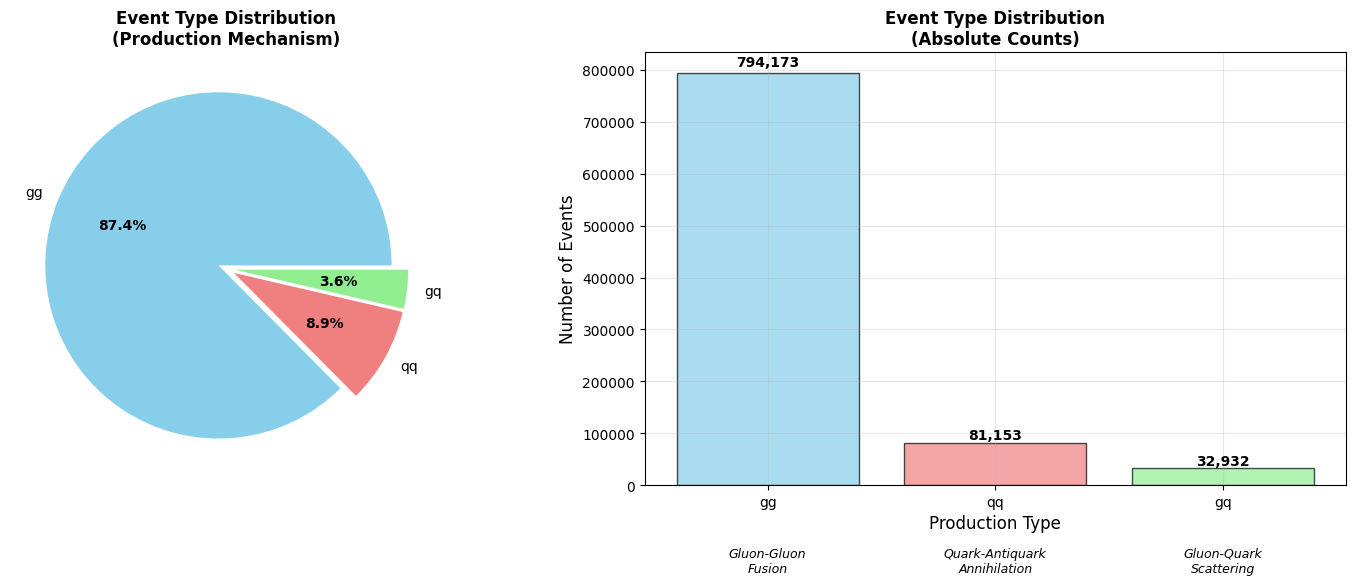

In [26]:
# Apply the function to visualize production types
fig = mplt.plot_prod_classification(df_cut,preSavefig+'PieChart_cut'+sufSavefig)


🔬 Physics Analysis by Production Type

📊 Had T Mass Statistics by Production Type:
------------------------------------------------------------
   GG:
      • Events: 794,173
      • Mean: 189.42 GeV
      • Std: 66.91 GeV
   GQ:
      • Events: 32,932
      • Mean: 219.11 GeV
      • Std: 113.03 GeV
   QQ:
      • Events: 81,153
      • Mean: 187.18 GeV
      • Std: 64.14 GeV

📊 Lep T Mass Statistics by Production Type:
------------------------------------------------------------
   GG:
      • Events: 794,173
      • Mean: 201.94 GeV
      • Std: 88.79 GeV
   GQ:
      • Events: 32,932
      • Mean: 227.45 GeV
      • Std: 133.88 GeV
   QQ:
      • Events: 81,153
      • Mean: 205.04 GeV
      • Std: 89.32 GeV


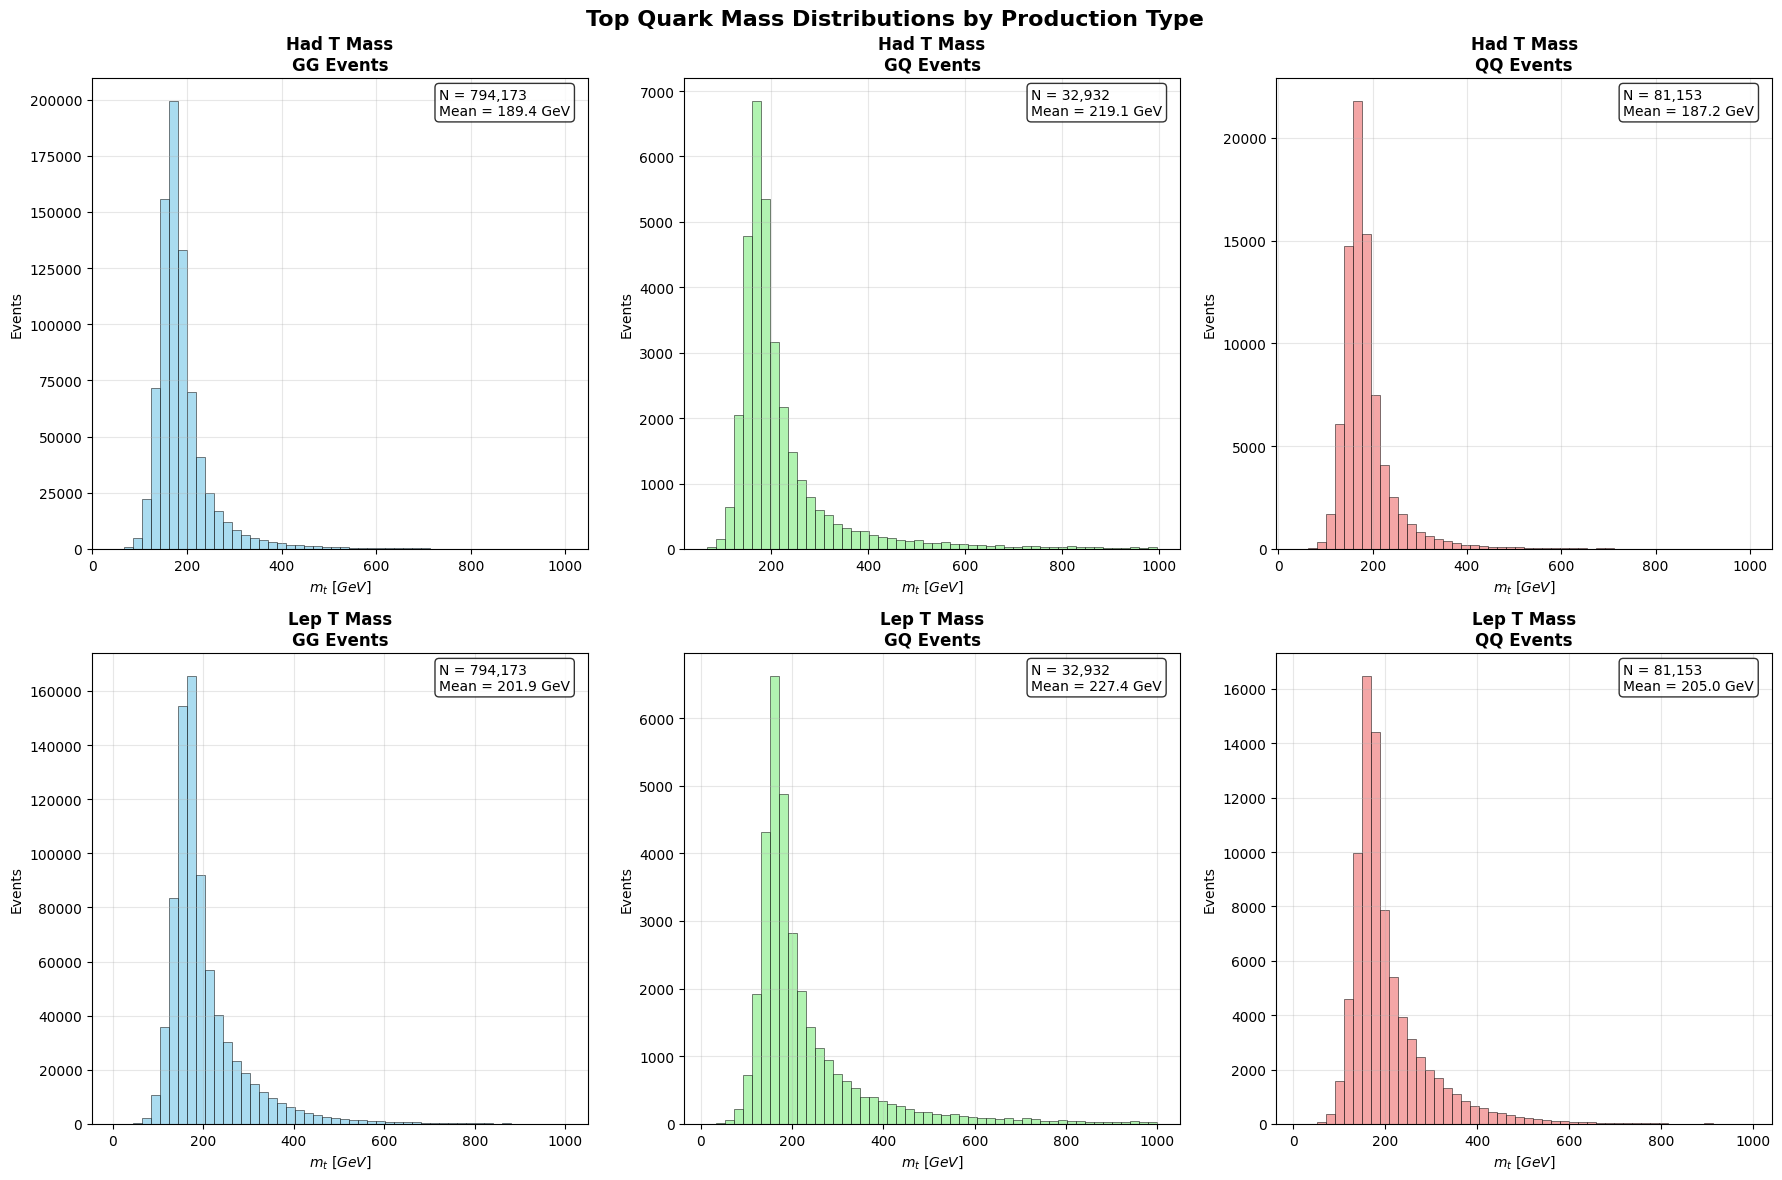

In [27]:
# Analyze physics properties by production type
print("🔬 Physics Analysis by Production Type")
print("=" * 50)

# Group data by production type
grouped = df_cut.groupby('prod_type')

# Create dictionaries to map mass arrays to production types
mass_arrays = {
    'had_t_mass': had_t_mass_cut,
    'lep_t_mass': lep_t_mass_cut
}

# Analyze top quark masses by production type
for mass_var, mass_array in mass_arrays.items():
    print(f"\n📊 {mass_var.replace('_', ' ').title()} Statistics by Production Type:")
    print("-" * 60)
    
    for prod_type, group_data in grouped:
        # Create mask for current production type
        mask = df_cut['prod_type'] == prod_type
        
        # Apply mask to mass array and remove NaN values
        valid_masses = mass_array[mask]
        valid_masses = valid_masses[~np.isnan(valid_masses)]
        
        if len(valid_masses) > 0:
            print(f"   {prod_type.upper()}:")
            print(f"      • Events: {len(valid_masses):,}")
            print(f"      • Mean: {valid_masses.mean():.2f} GeV")
            print(f"      • Std: {valid_masses.std():.2f} GeV")
        else:
            print(f"   {prod_type.upper()}: No valid data")

# Create comparison plots of top masses by production type
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Top Quark Mass Distributions by Production Type', fontsize=16, fontweight='bold')

colors = {'gg': 'skyblue', 'qq': 'lightcoral', 'gq': 'lightgreen'}

for row, (mass_var, mass_array) in enumerate(mass_arrays.items()):
    # Individual histograms for each production type
    for col, (prod_type, group_data) in enumerate(grouped):
        if col < 3:  # Limit to 3 columns
            ax = axes[row, col]
            
            # Create mask for current production type
            mask = df_cut['prod_type'] == prod_type
            
            # Apply mask to mass array and remove NaN values
            valid_masses = mass_array[mask]
            valid_masses = valid_masses[~np.isnan(valid_masses)]
            
            if len(valid_masses) > 0:
                ax.hist(valid_masses, bins=50, alpha=0.7, 
                       color=colors.get(prod_type, 'gray'), 
                       edgecolor='black', linewidth=0.5)
                
                ax.set_title(f'{mass_var.replace("_", " ").title()}\n{prod_type.upper()} Events', 
                           fontweight='bold')
                ax.set_xlabel(r'$m_t~ [GeV]$')
                ax.set_ylabel('Events')
                ax.grid(True, alpha=0.3)
                
                # Add event count and statistics
                stats_text = f'N = {len(valid_masses):,}\nMean = {valid_masses.mean():.1f} GeV'
                ax.text(0.7, 0.98, stats_text, 
                       transform=ax.transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, f'No valid\n{mass_var}\ndata', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{mass_var.replace("_", " ").title()}\n{prod_type.upper()} Events')

plt.tight_layout()
plt.show()

### Number of jets per production type

🚀 Analyzing Jets per Event Distribution
🔄 Counting jets per event...
📊 Overall Statistics:
   • Total events: 908,258
   • Total jets: 4,365,520
   • Mean jets per event: 4.81
   • Median jets per event: 5.0
   • Std deviation: 1.02
   • Range: [4, 14] jets

📊 Statistics by Production Type:
   GG:
      • Events: 794,173
      • Mean jets: 4.80
      • Std: 1.01
   GQ:
      • Events: 32,932
      • Mean jets: 5.40
      • Std: 1.27
   QQ:
      • Events: 81,153
      • Mean jets: 4.63
      • Std: 0.88
💾 Plot saved to: Plots/0708/jets_per_event_analysis_0708.png


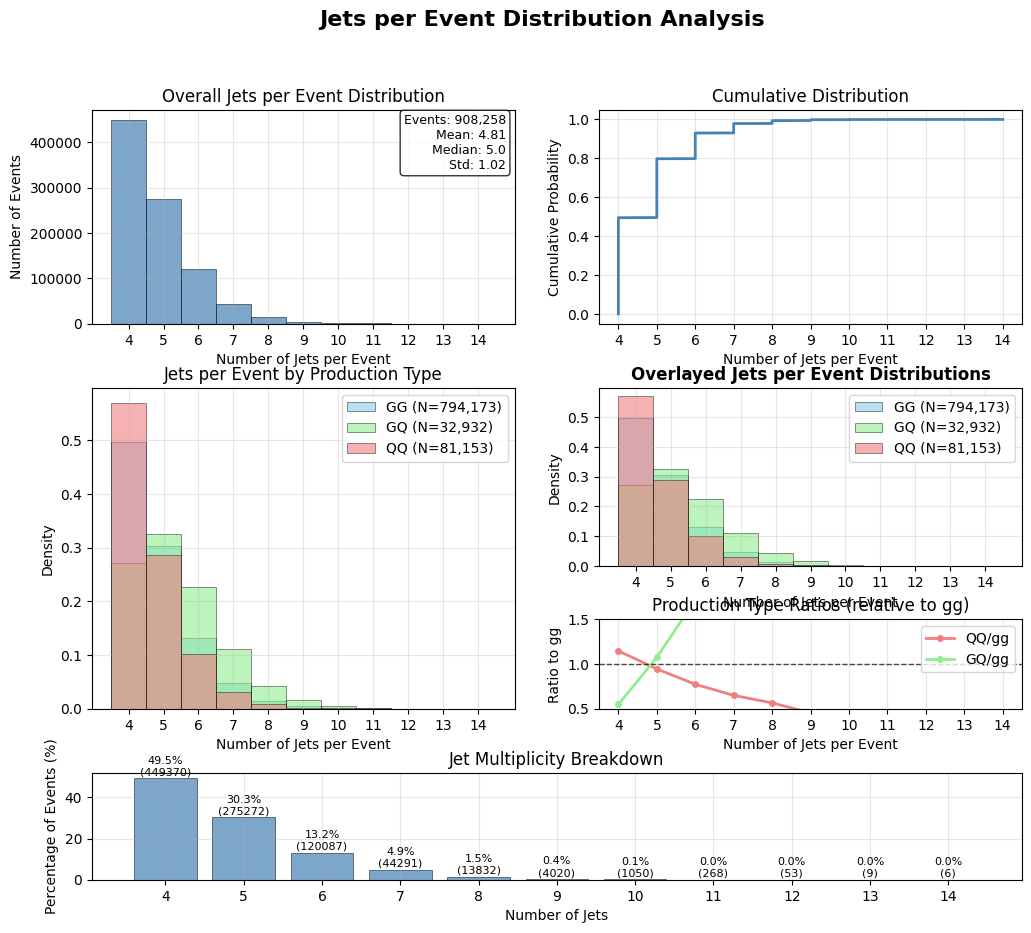


🎯 Jet Multiplicity Breakdown:
----------------------------------------
   • 4 jets: 449,370 events (49.5%)
   • 5 jets: 275,272 events (30.3%)
   • 6 jets: 120,087 events (13.2%)
   • 7 jets: 44,291 events (4.9%)
   • 8 jets: 13,832 events (1.5%)
   • 9 jets: 4,020 events (0.4%)
   • 10 jets: 1,050 events (0.1%)
   • 11 jets: 268 events (0.0%)
   • 12 jets: 53 events (0.0%)
   • 13 jets: 9 events (0.0%)
   • 14 jets: 6 events (0.0%)


In [28]:
# Apply the function to analyze jets per event
fig, jets_per_event, statistics = mplt.plot_jets_per_event_distribution(
    df=df_cut, 
    jet_col='jet_eta',
    save_plot=True,
    save_path=preSavefig+'jets_per_event_analysis'+sufSavefig
)

## Beta variable study

Studying beta=p/E for ttbar 4vec

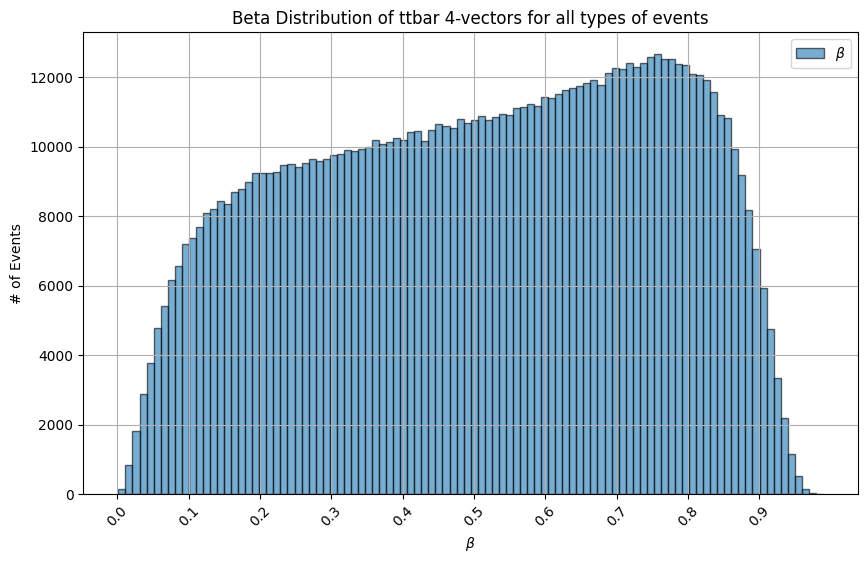

In [29]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,_,_=plt.hist(df_cut['beta'], bins=100, alpha=0.6, edgecolor='black', density=False, label=r'$\beta$')

plt.xlabel(r'$\beta$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,1, 0.1),rotation=45)
plt.title('Beta Distribution of ttbar 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'BetaDistribution_all'+sufSavefig)
plt.show()

🔬 Beta Distribution Analysis by Production Type


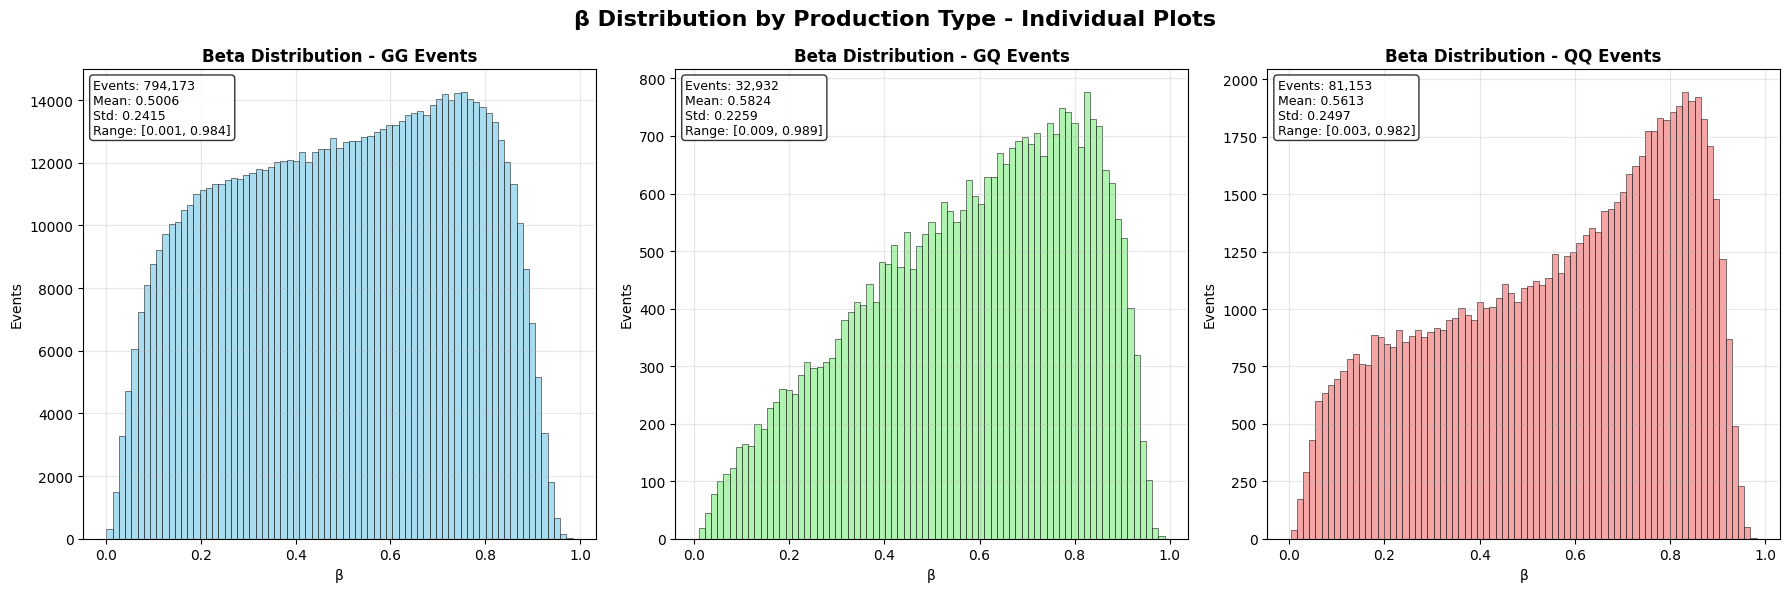

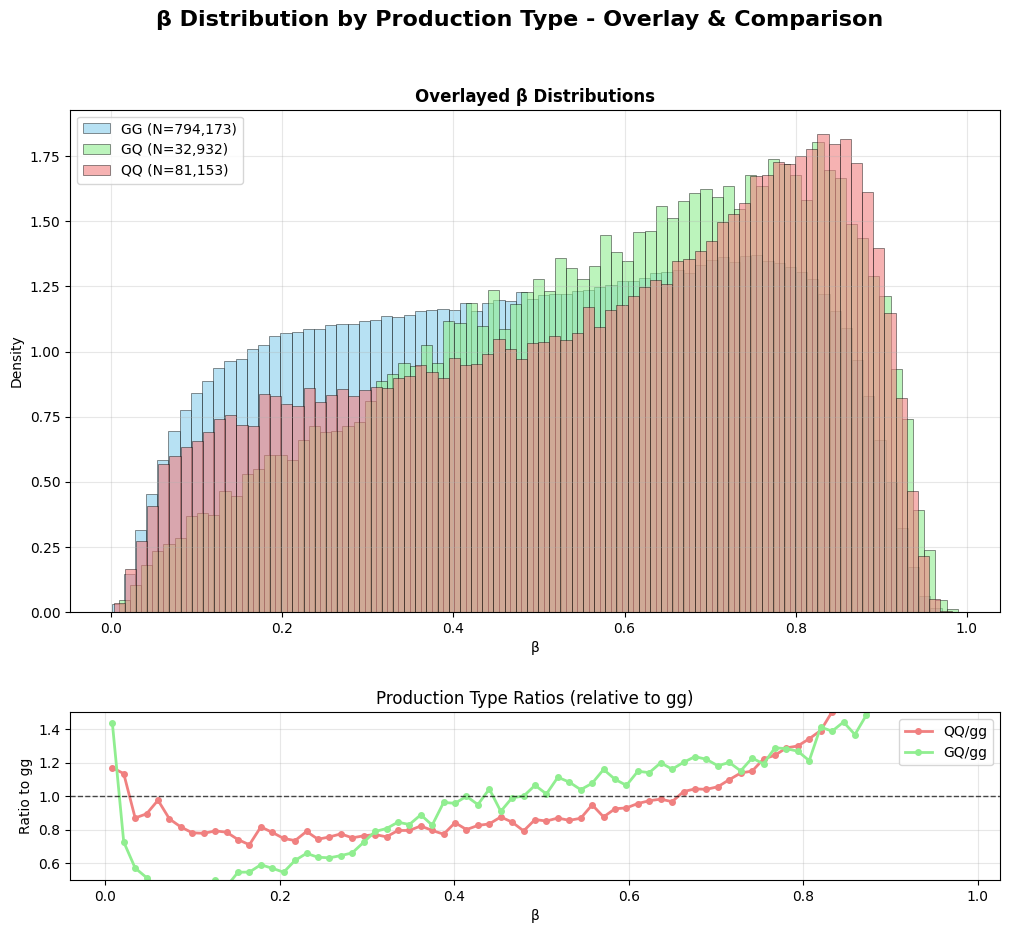

In [72]:
# Beta distribution analysis by production type
print("🔬 Beta Distribution Analysis by Production Type")
print("=" * 50)

# Check if beta column exists
if 'beta' in df_cut.columns:
    # Colors for different production types
    colors = {'gg': 'skyblue', 'qq': 'lightcoral', 'gq': 'lightgreen'}
    
    # Individual histograms for each production type
    grouped = df_cut.groupby('prod_type')
    histograms = {}  # Store histogram data for comparison
    
    # FIGURE 1: Individual distributions (3 separate subplots)
    fig1, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig1.suptitle('β Distribution by Production Type - Individual Plots', fontsize=16, fontweight='bold')
    
    # Plot individual distributions
    plot_idx = 0
    for prod_type, group_data in grouped:
        if plot_idx < 3:  # First 3 subplots for individual types
            ax = axes[plot_idx]
            
            valid_beta = group_data['beta'].dropna()
            
            if len(valid_beta) > 0:
                # Calculate histogram for comparison
                hist_counts, hist_edges = np.histogram(valid_beta, bins=75, density=True)
                histograms[prod_type] = {'counts': hist_counts, 'edges': hist_edges}
                
                ax.hist(valid_beta, bins=75, alpha=0.7, 
                       color=colors.get(prod_type, 'gray'),
                       edgecolor='black', linewidth=0.5)
                
                # Add statistics
                mean_beta = valid_beta.mean()
                std_beta = valid_beta.std()
                
                ax.set_title(f'Beta Distribution - {prod_type.upper()} Events', fontweight='bold')
                ax.set_xlabel('β')
                ax.set_ylabel('Events')
                ax.grid(True, alpha=0.3)
                
                # Add statistics text box
                stats_text = (f'Events: {len(valid_beta):,}\n'
                             f'Mean: {mean_beta:.4f}\n'
                             f'Std: {std_beta:.4f}\n'
                             f'Range: [{valid_beta.min():.3f}, {valid_beta.max():.3f}]')
                
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                       verticalalignment='top', fontsize=9,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
                
            else:
                ax.text(0.5, 0.5, f'No valid\nbeta data\nfor {prod_type.upper()}',
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'Beta Distribution - {prod_type.upper()} Events')
            
            plot_idx += 1
    
    plt.tight_layout()
    plt.savefig(preSavefig+'BetaPerProdType_individual'+sufSavefig)
    plt.show()
    
    # FIGURE 2: Overlapped distributions + comparison plot
    fig2 = plt.figure(figsize=(12, 10))
    gs = fig2.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.3)
    
    fig2.suptitle('β Distribution by Production Type - Overlay & Comparison', fontsize=16, fontweight='bold')
    
    # Overlay plot
    ax_overlay = fig2.add_subplot(gs[0])
    for prod_type, group_data in grouped:
        valid_beta = group_data['beta'].dropna()
        
        if len(valid_beta) > 0:
            ax_overlay.hist(valid_beta, bins=75, alpha=0.6, 
                           color=colors.get(prod_type, 'gray'),
                           edgecolor='black', linewidth=0.5,
                           label=f'{prod_type.upper()} (N={len(valid_beta):,})',
                           density=True)
    
    ax_overlay.set_title('Overlayed β Distributions', fontweight='bold')
    ax_overlay.set_xlabel('β')
    ax_overlay.set_ylabel('Density')
    ax_overlay.grid(True, alpha=0.3)
    ax_overlay.legend()
    
    # Comparison subplot: ratio plots
    ax_comp = fig2.add_subplot(gs[1])
    if 'gg' in histograms:
        bin_centers = 0.5 * (histograms['gg']['edges'][:-1] + histograms['gg']['edges'][1:])
        gg_counts = histograms['gg']['counts']
        
        for prod_type in ['qq', 'gq']:
            if prod_type in histograms:
                other_counts = histograms[prod_type]['counts']
                
                # Calculate ratio (avoid division by zero)
                ratio = np.where(gg_counts > 0, other_counts / gg_counts, 1.0)
                
                # Plot ratio
                ax_comp.plot(bin_centers, ratio, 'o-', 
                            color=colors.get(prod_type, 'gray'),
                            label=f'{prod_type.upper()}/gg', linewidth=2, markersize=4)
        
        # Reference line at y=1
        ax_comp.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, linewidth=1)
        ax_comp.set_xlabel('β')
        ax_comp.set_ylabel('Ratio to gg')
        ax_comp.set_title('Production Type Ratios (relative to gg)')
        ax_comp.grid(True, alpha=0.3)
        ax_comp.legend()
        ax_comp.set_ylim(0.5, 1.5)
    else:
        ax_comp.text(0.5, 0.5, 'No gg channel data available for comparison',
                    ha='center', va='center', transform=ax_comp.transAxes)
    
    plt.tight_layout()
    plt.savefig(preSavefig+'BetaPerProdType_overlay'+sufSavefig)
    plt.show()
        
else:
    print("❌ Beta column not found in DataFrame")
    print("Available columns related to beta or momentum:")
    beta_related = [col for col in df_with_4vecs.columns if 'beta' in col.lower() or 'momentum' in col.lower()]
    for col in beta_related:
        print(f"   • {col}")
    
    if not beta_related:
        print("   No beta-related columns found")

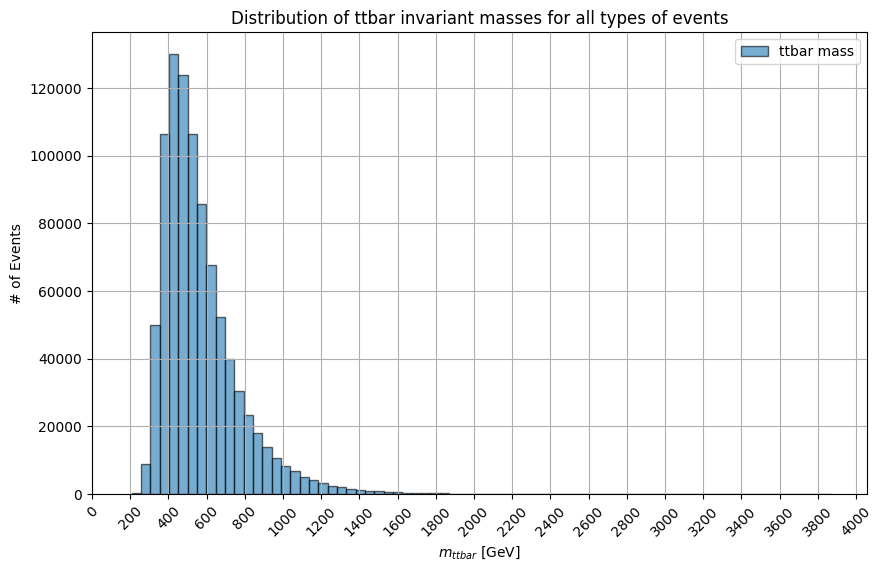

In [31]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,_,_=plt.hist(ttbar_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label=r'ttbar mass')

plt.xlabel(r'$m_{ttbar}$ [GeV] ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,4100, 200),rotation=45)
plt.title('Distribution of ttbar invariant masses for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'ttbar_minv_cut'+sufSavefig)
plt.show()

🔬 ttbar mass Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 563.7054
   • Std: 202.9229
   • Range: [208.634, 3873.306]

GQ Production:
   • Events: 32,932
   • Mean: 670.1579
   • Std: 295.9860
   • Range: [207.371, 3713.670]

QQ Production:
   • Events: 81,153
   • Mean: 559.5581
   • Std: 199.8533
   • Range: [229.688, 2726.121]


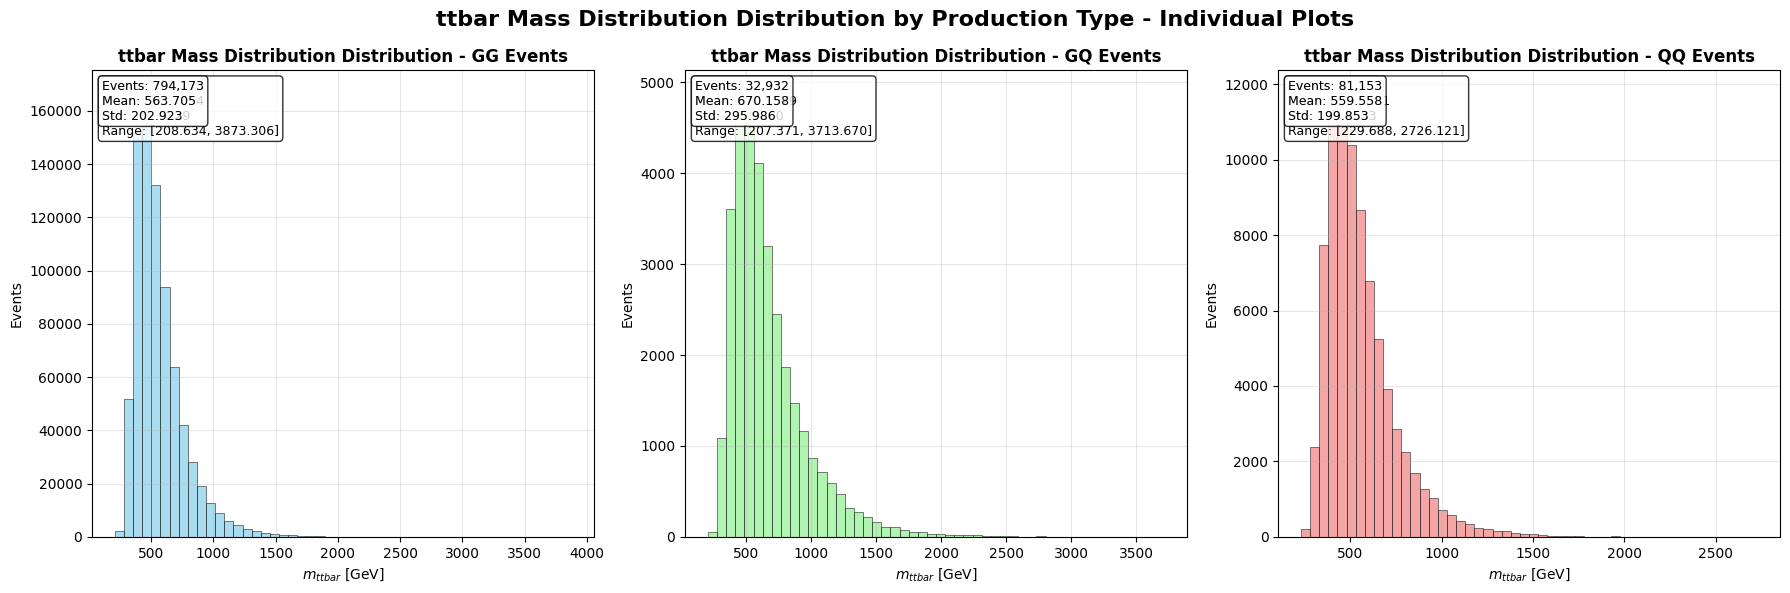

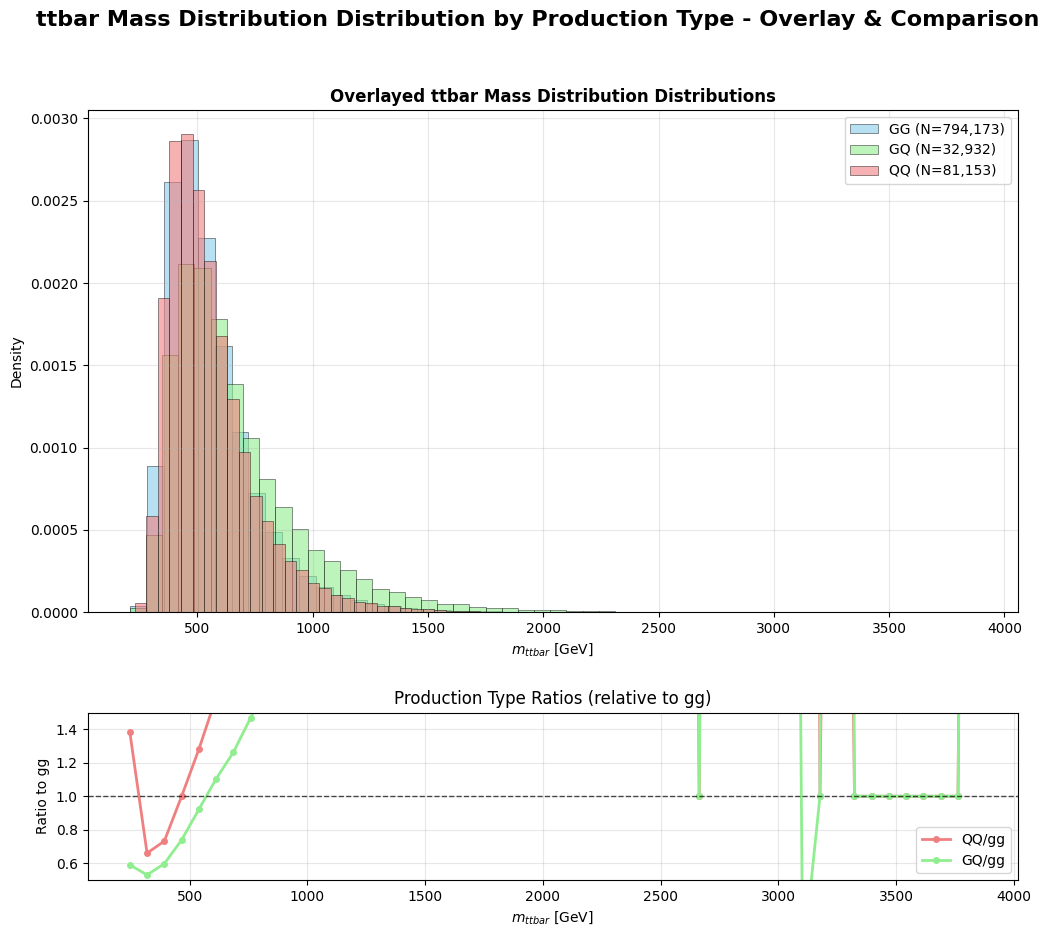

In [32]:
# Apply the function to analyze ttbar mass
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=ttbar_mass_cut,
    variable_name="ttbar mass",
    FileName=preSavefig+'ttbar_minv_prod_type_cut'+sufSavefig,
    xlabel=r'$m_{ttbar}$ [GeV]',
    title_prefix=r'ttbar Mass Distribution',
    overlay_bins=50
)

### Normalized to 1 ttbar distribution

🔬 ttbar mass Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 563.7054
   • Std: 202.9229
   • Range: [208.634, 3873.306]

GQ Production:
   • Events: 32,932
   • Mean: 670.1579
   • Std: 295.9860
   • Range: [207.371, 3713.670]

QQ Production:
   • Events: 81,153
   • Mean: 559.5581
   • Std: 199.8533
   • Range: [229.688, 2726.121]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


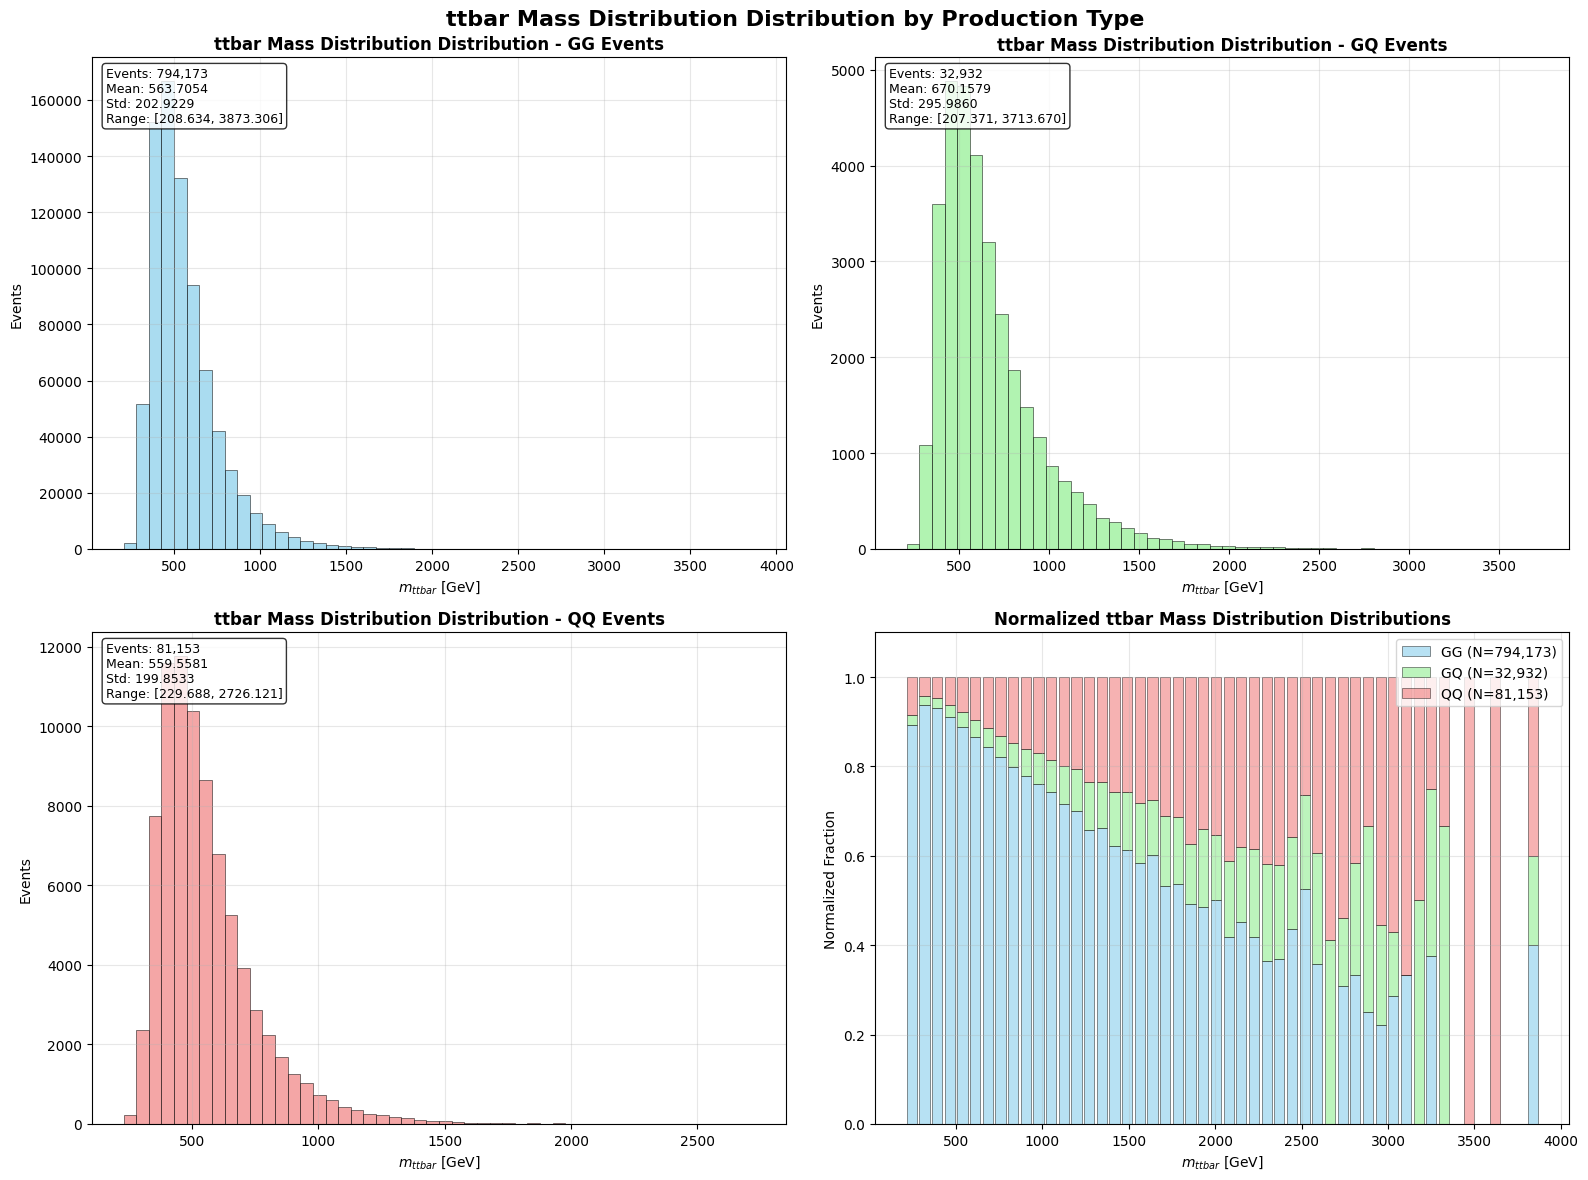

In [33]:
# Apply the function to analyze ttbar mass
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=ttbar_mass_cut,
    variable_name="ttbar mass",
    FileName=preSavefig+'ttbar_minv_prod_type_norm1'+sufSavefig,
    xlabel=r'$m_{ttbar}$ [GeV]',
    title_prefix=r'ttbar Mass Distribution',
    overlay_bins=50
)

🔬 ttbar beta Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 0.5006
   • Std: 0.2415
   • Range: [0.001, 0.984]

GQ Production:
   • Events: 32,932
   • Mean: 0.5824
   • Std: 0.2259
   • Range: [0.009, 0.989]

QQ Production:
   • Events: 81,153
   • Mean: 0.5613
   • Std: 0.2497
   • Range: [0.003, 0.982]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


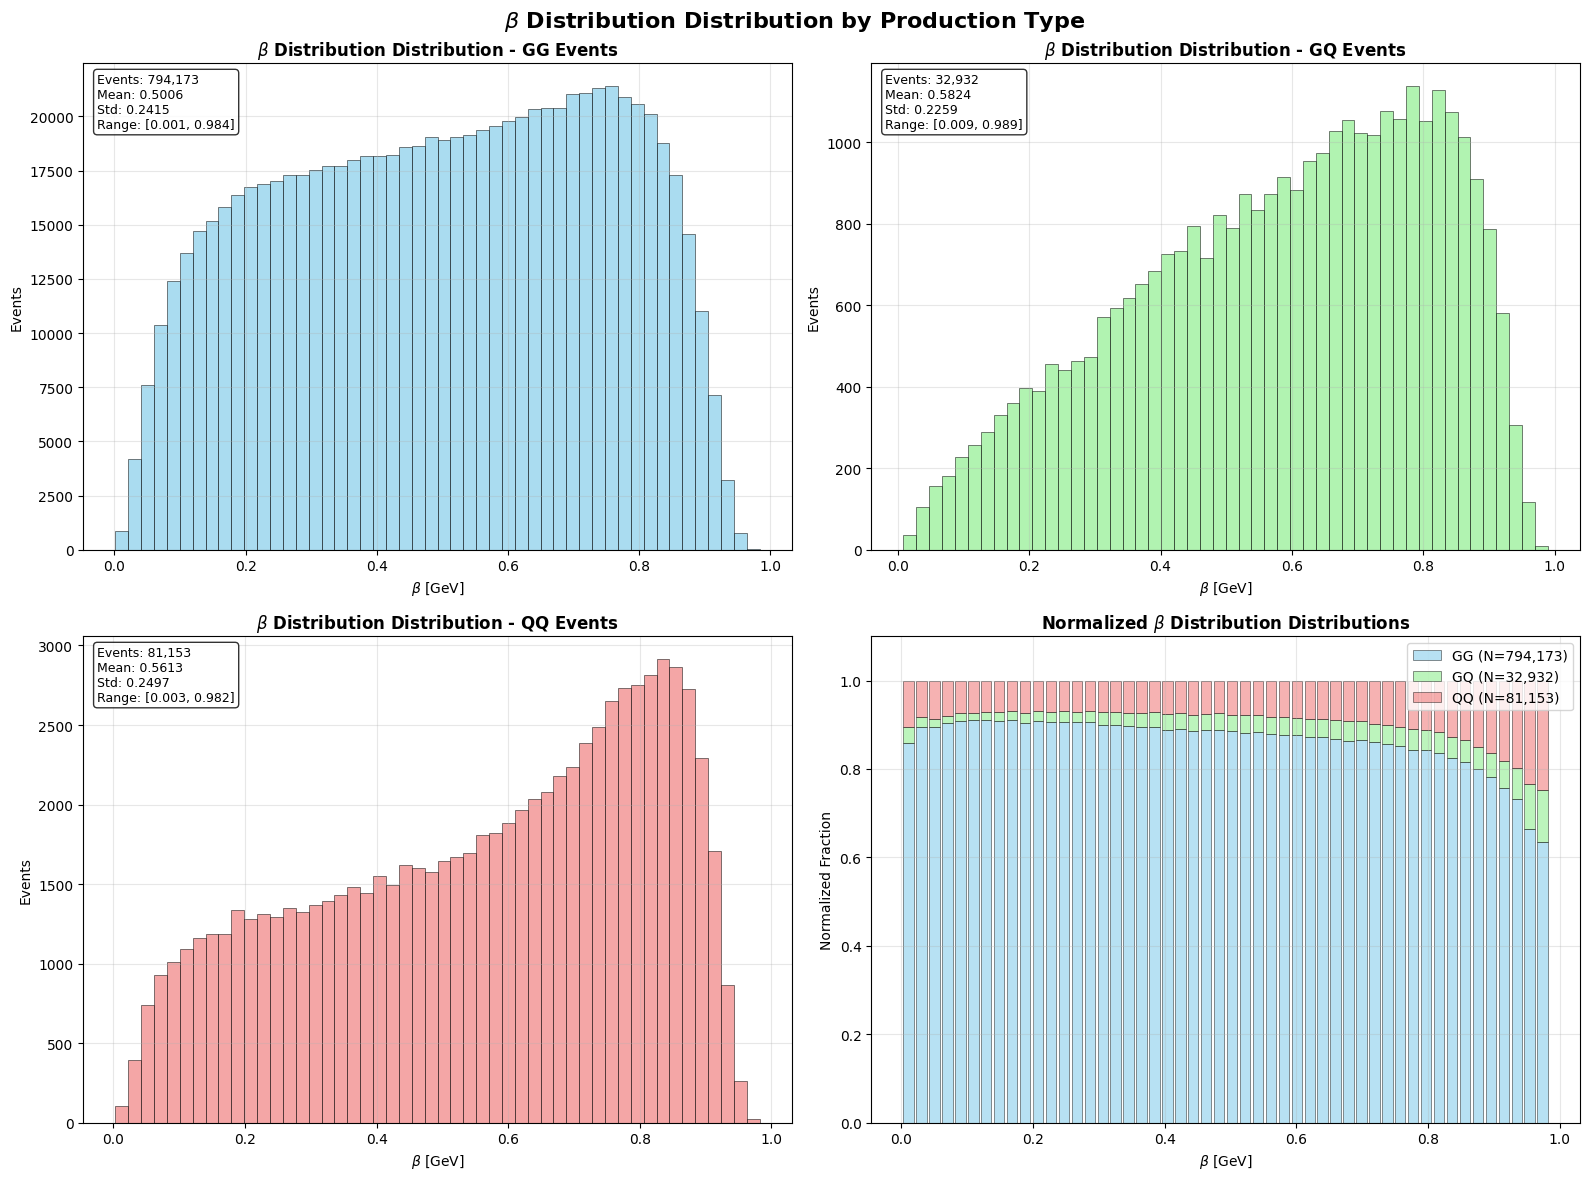

In [57]:
# Apply the function to analyze ttbar beta
ttbar_beta_arr=df_cut['beta']

fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=ttbar_beta_arr,
    variable_name="ttbar beta",
    FileName=preSavefig+'ttbar_beta_prod_type_norm1'+sufSavefig,
    xlabel=r'$\beta$ [GeV]',
    title_prefix=r'$\beta$ Distribution',
    overlay_bins=50
)

## Beta_z

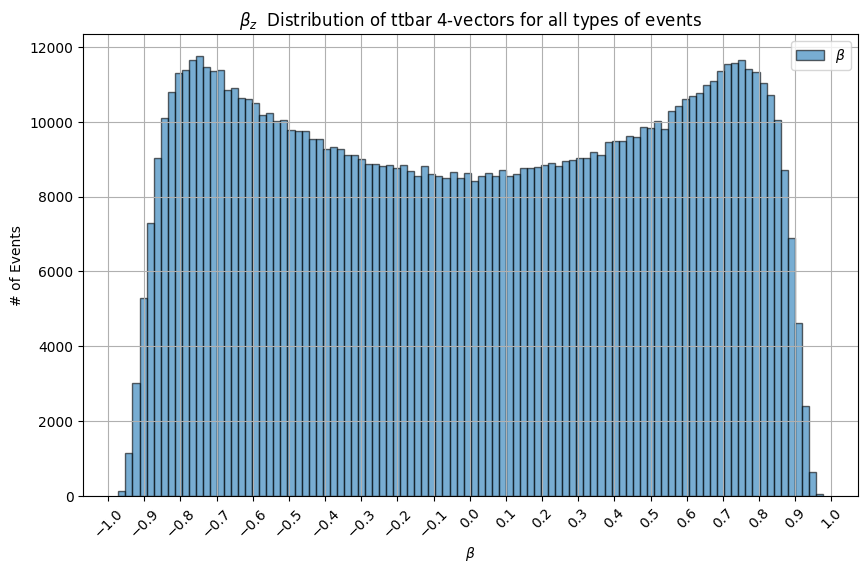

In [35]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(ttbar_betaz_cut, bins=100, alpha=0.6, edgecolor='black', density=False, label=r'$\beta$')

plt.xlabel(r'$\beta$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(-1,1.1, 0.1),rotation=45)
plt.title(r'$\beta_z~$ Distribution of ttbar 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'Betaz_cut'+sufSavefig)
plt.show()

🔬 ttbar β_z Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.4700
   • Std: 0.2584
   • Range: [0.000, 0.973]

GQ Production:
   • Events: 32,932
   • Mean: 0.4815
   • Std: 0.2633
   • Range: [0.000, 0.972]

QQ Production:
   • Events: 81,153
   • Mean: 0.5399
   • Std: 0.2652
   • Range: [0.000, 0.977]


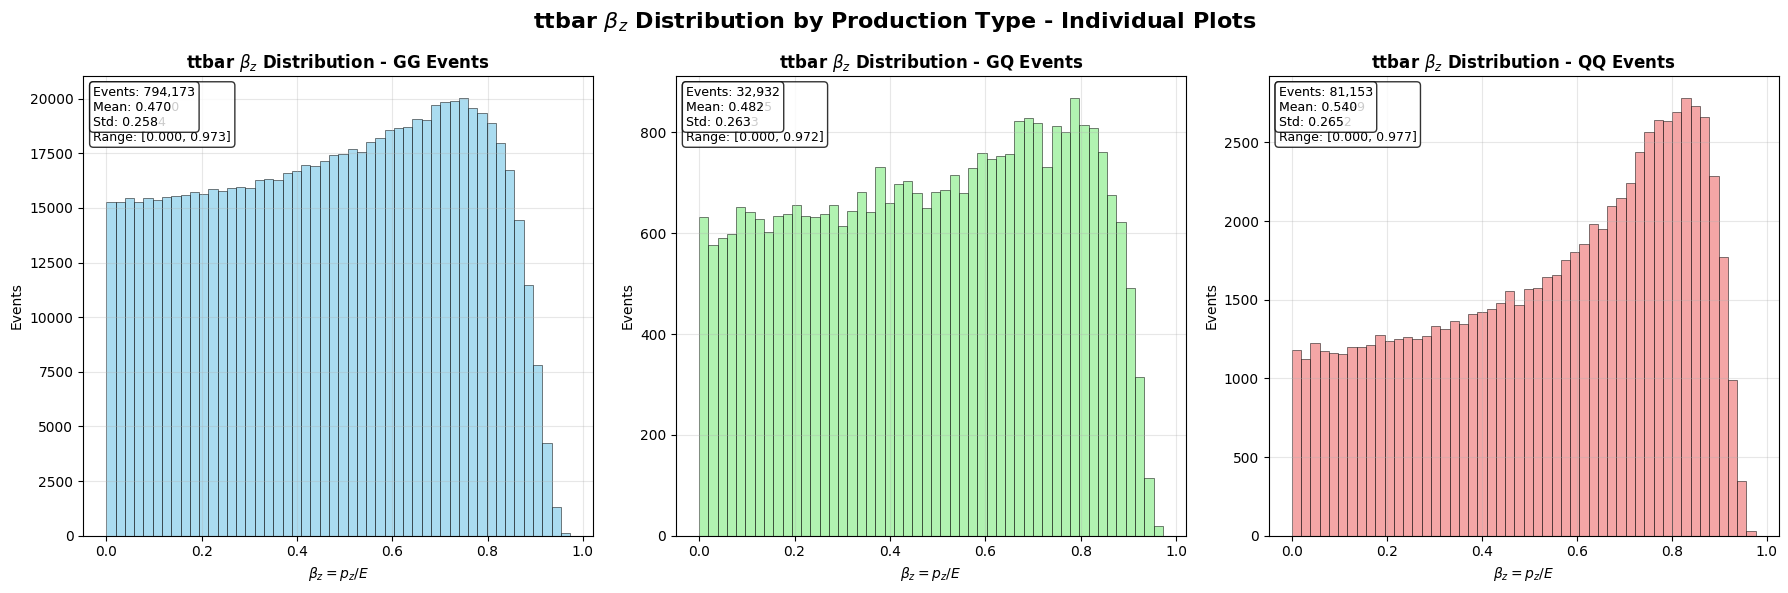

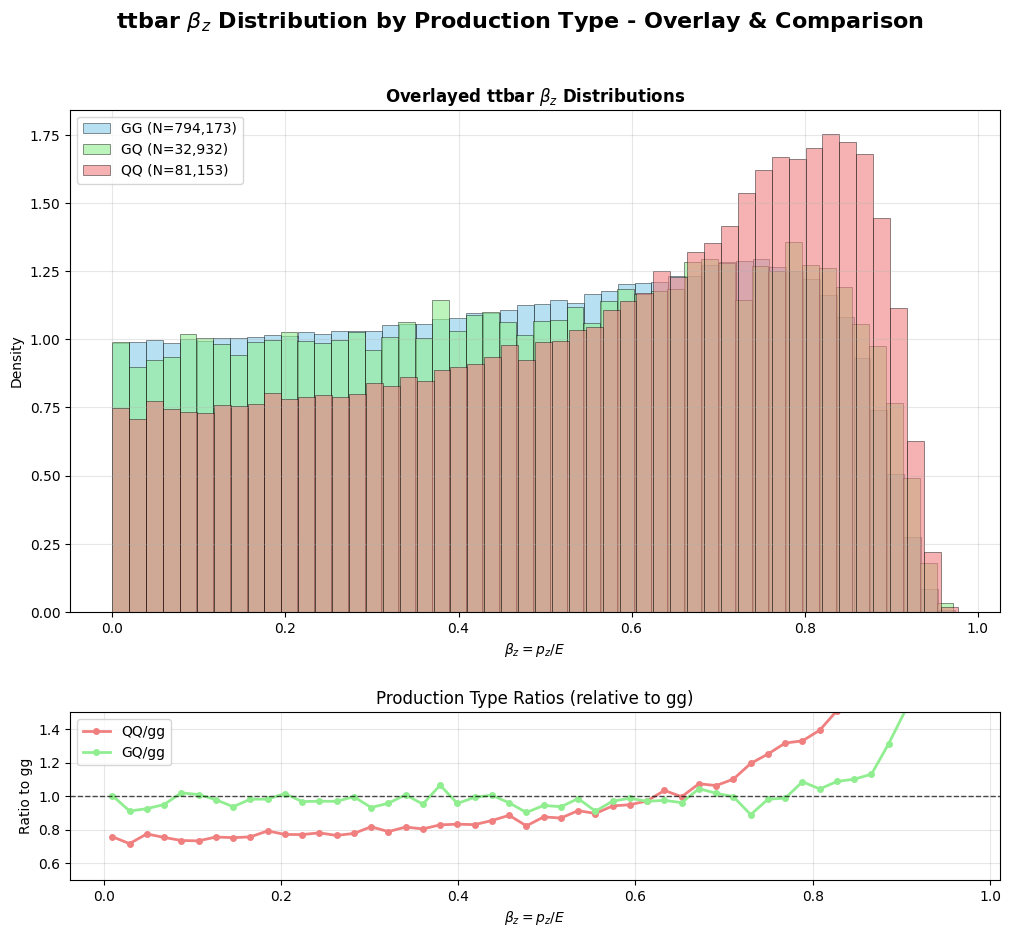

In [36]:
# Apply the function to analyze ttbar beta_z
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=abs(ttbar_betaz_cut),
    variable_name="ttbar β_z",
    FileName=preSavefig+'Betaz_prod_type_cut'+sufSavefig,
    xlabel=r'$\beta_z = p_z/E$',
    title_prefix=r'ttbar $\beta_z$',
    overlay_bins=50
)

🔬 ttbar β_z Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 0.4700
   • Std: 0.2584
   • Range: [0.000, 0.973]

GQ Production:
   • Events: 32,932
   • Mean: 0.4815
   • Std: 0.2633
   • Range: [0.000, 0.972]

QQ Production:
   • Events: 81,153
   • Mean: 0.5399
   • Std: 0.2652
   • Range: [0.000, 0.977]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


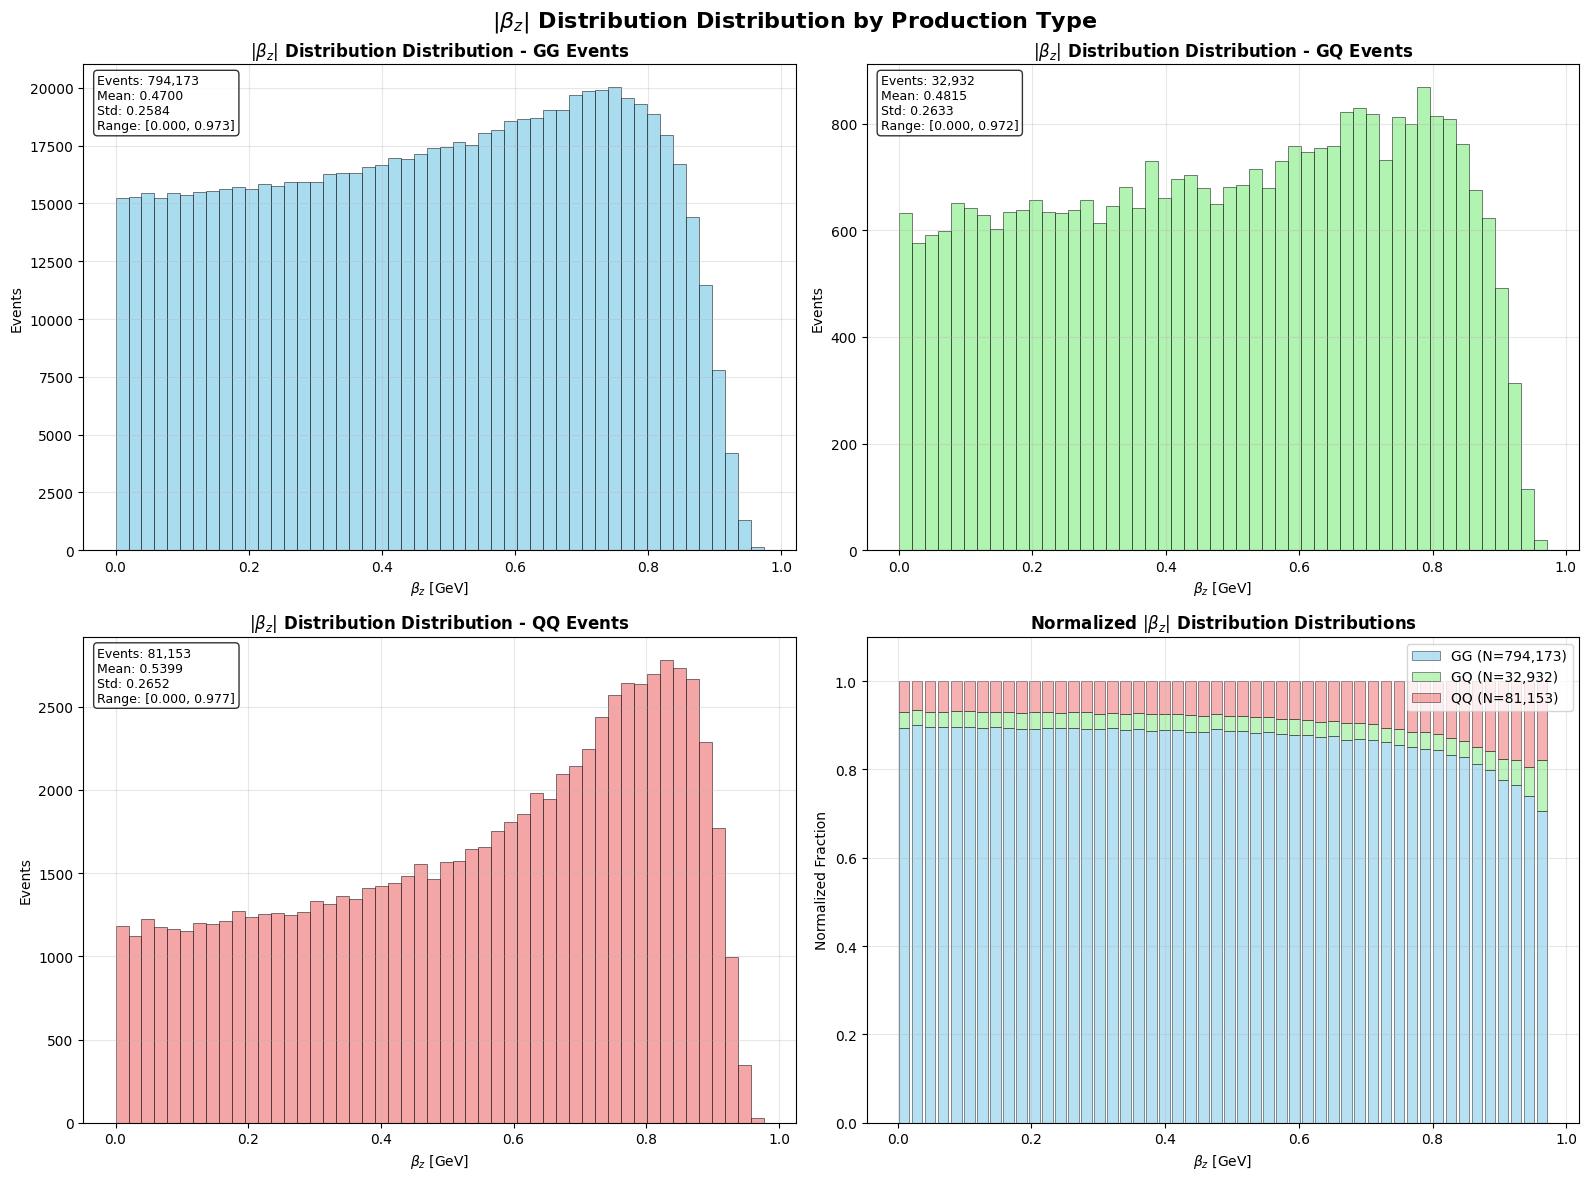

In [58]:
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=abs(ttbar_betaz_cut),
    variable_name="ttbar β_z",
    FileName=preSavefig+'ttbar_betaZ_prod_type_norm1'+sufSavefig,
    xlabel=r'$\beta_z$ [GeV]',
    title_prefix=r'$|\beta_z|$ Distribution',
    overlay_bins=50
)

## Studying the slope of the beta distributions

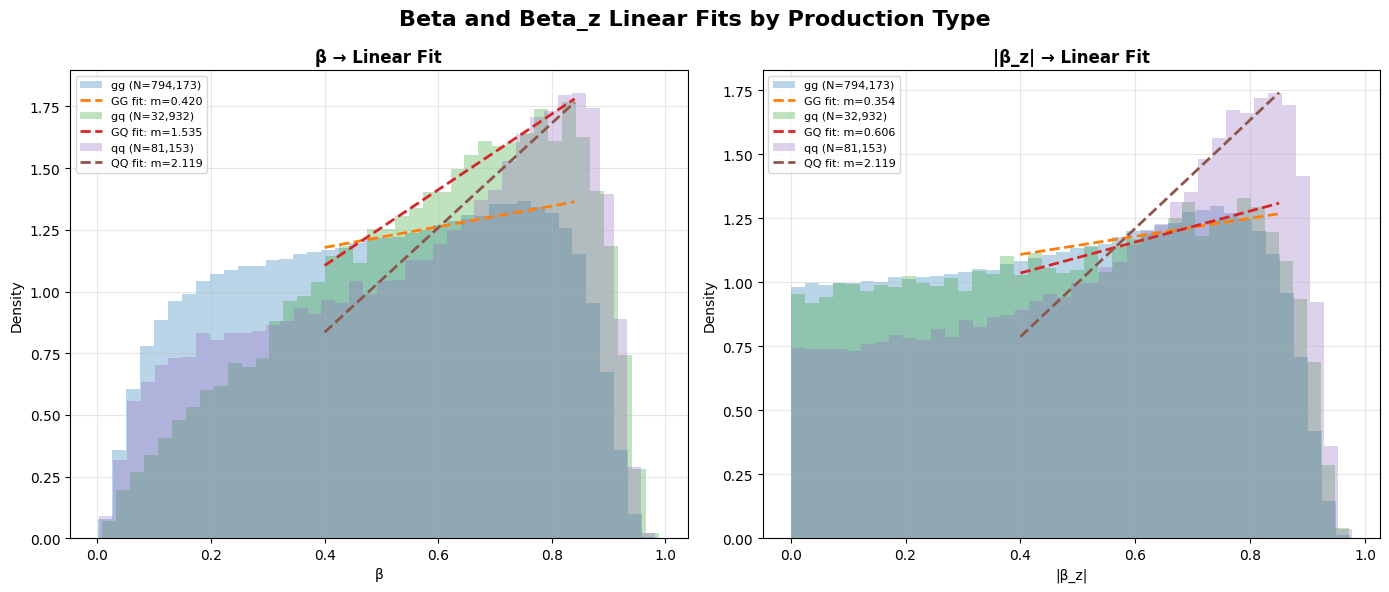

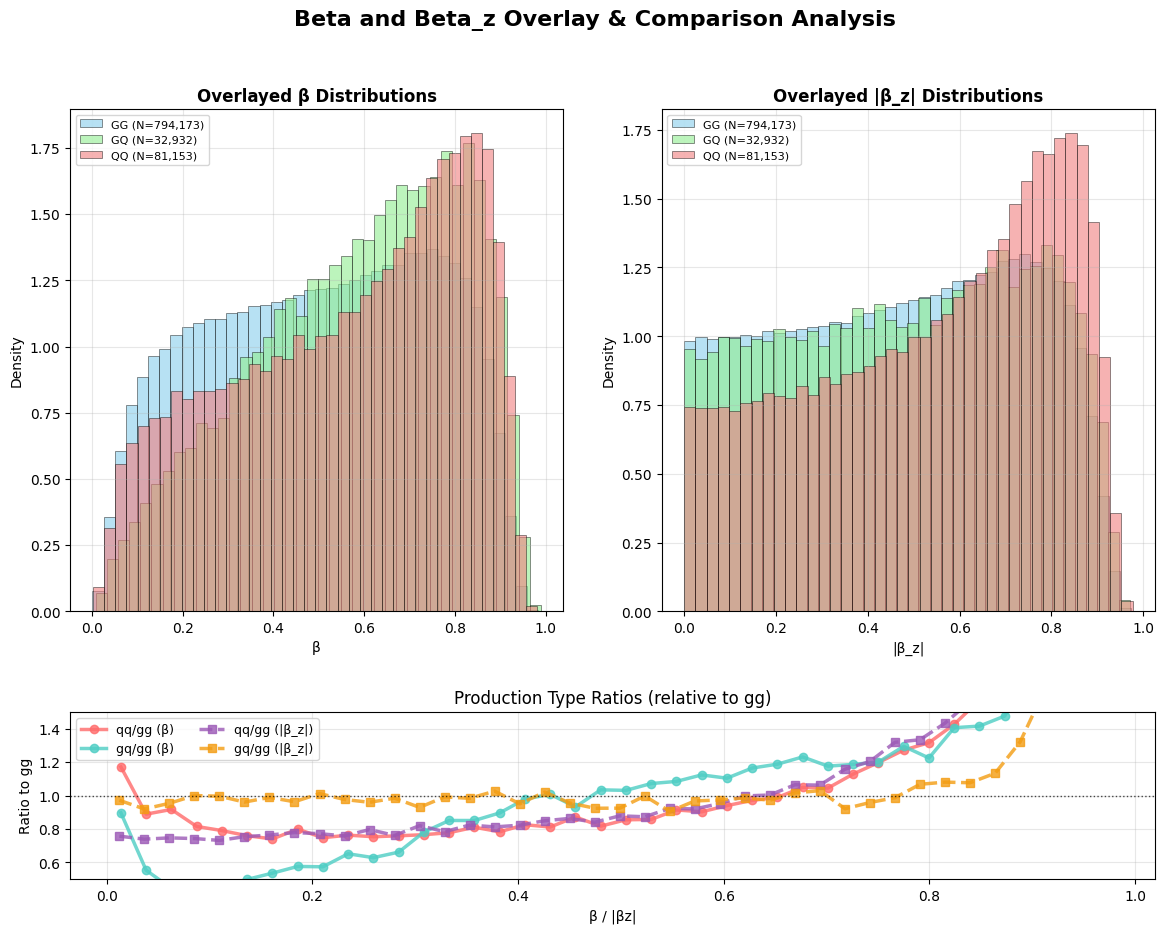

In [37]:
fits = mplt.fit_linear_on_bin_distributions(
    df=df_cut,
    betaz_array=ttbar_betaz_cut,
    FileName=preSavefig+'BetaBetaz_comparison'+sufSavefig,
    beta_col='beta',
    prod_type_col='prod_type',
    bins=40,
    fit_range_beta=(0.4, 0.84),
    fit_range_betaz=(0.4, 0.85)
)


## Transverse momentum of ttbar system

🔬 ttbar p_T Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 69.2289
   • Std: 71.8396
   • Range: [0.036, 1290.926]

GQ Production:
   • Events: 32,932
   • Mean: 187.9458
   • Std: 161.4008
   • Range: [0.404, 1598.158]

QQ Production:
   • Events: 81,153
   • Mean: 58.2190
   • Std: 66.1587
   • Range: [0.136, 1557.578]


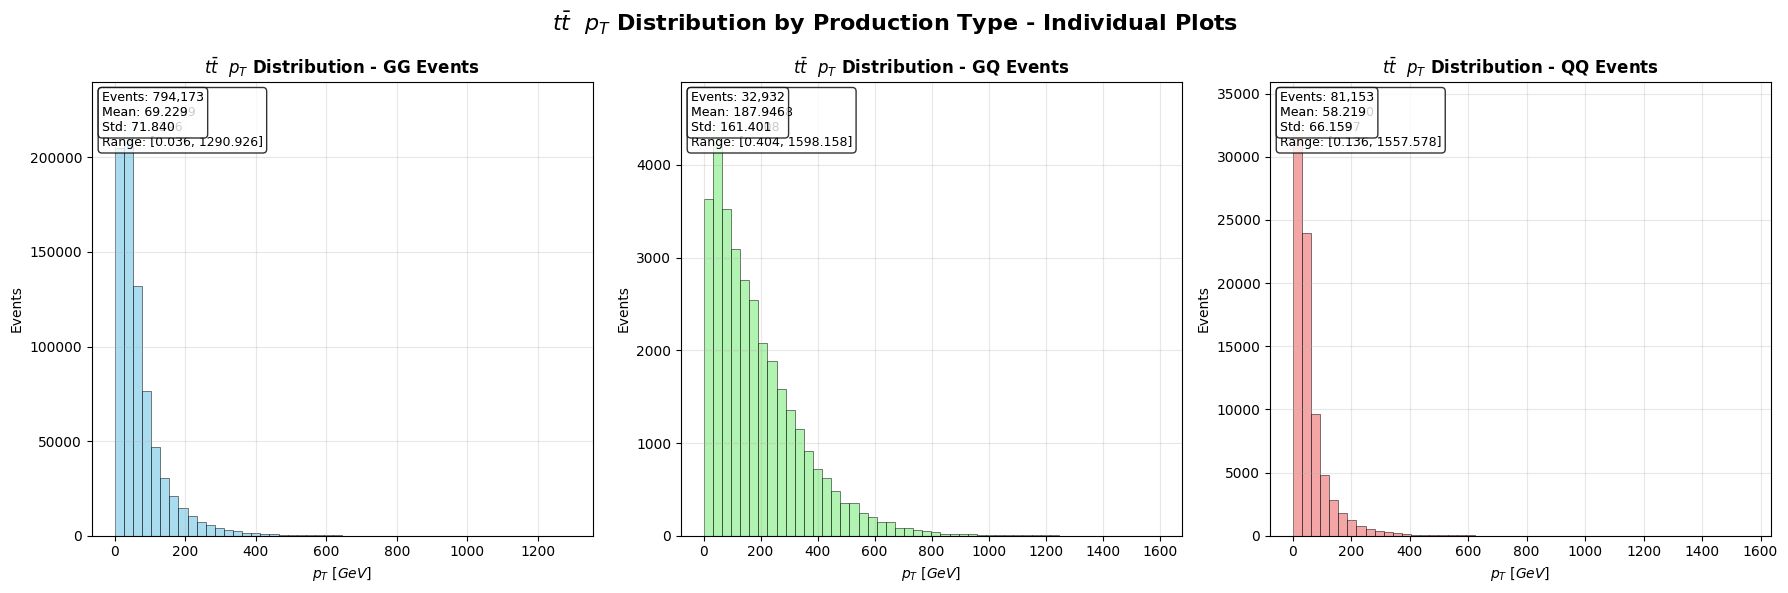

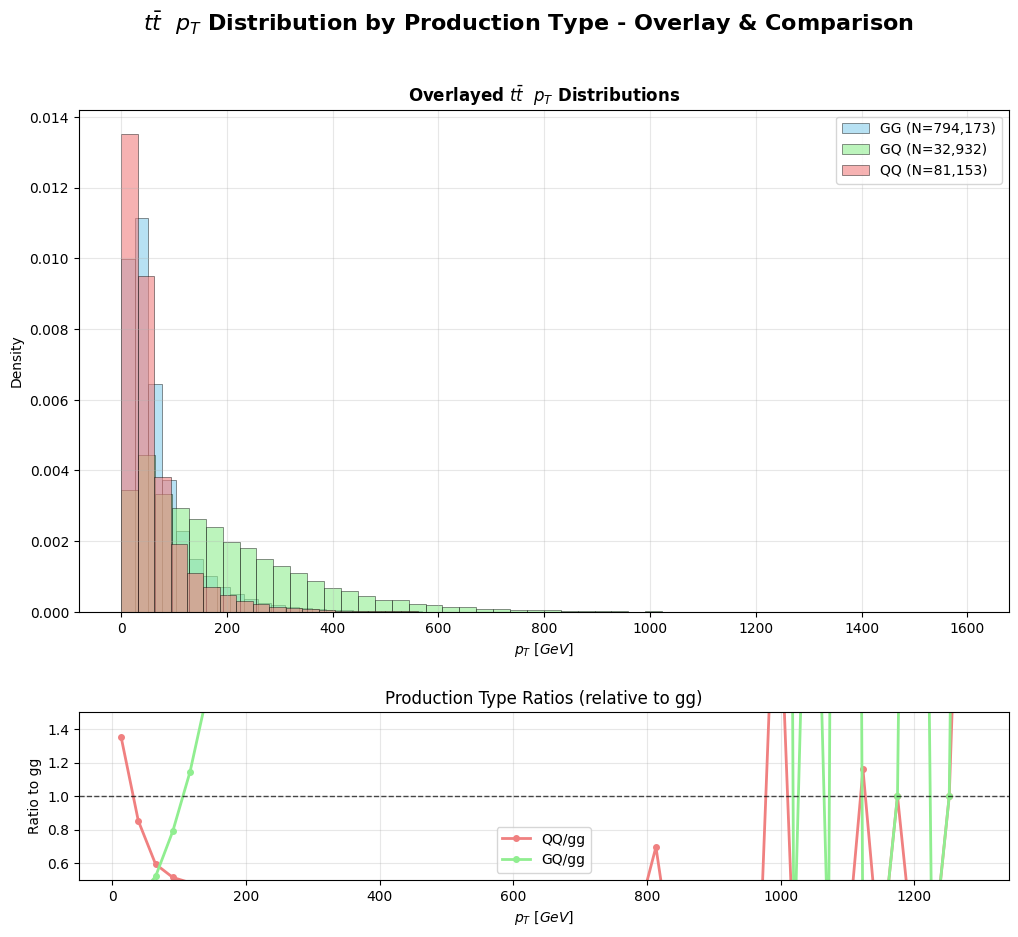

In [38]:
# Apply the function to analyze ttbar_pT
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=(ttbar_pT),
    variable_name="ttbar p_T",
    FileName=preSavefig+'ttbar_pT_prod_type'+sufSavefig,
    xlabel=r'$p_T~[GeV]$',
    title_prefix=r'$t\bar{t}~$ $p_T$',
    overlay_bins=50
)

🔬 ttbar p_T Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 69.2289
   • Std: 71.8396
   • Range: [0.036, 1290.926]

GQ Production:
   • Events: 32,932
   • Mean: 187.9458
   • Std: 161.4008
   • Range: [0.404, 1598.158]

QQ Production:
   • Events: 81,153
   • Mean: 58.2190
   • Std: 66.1587
   • Range: [0.136, 1557.578]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


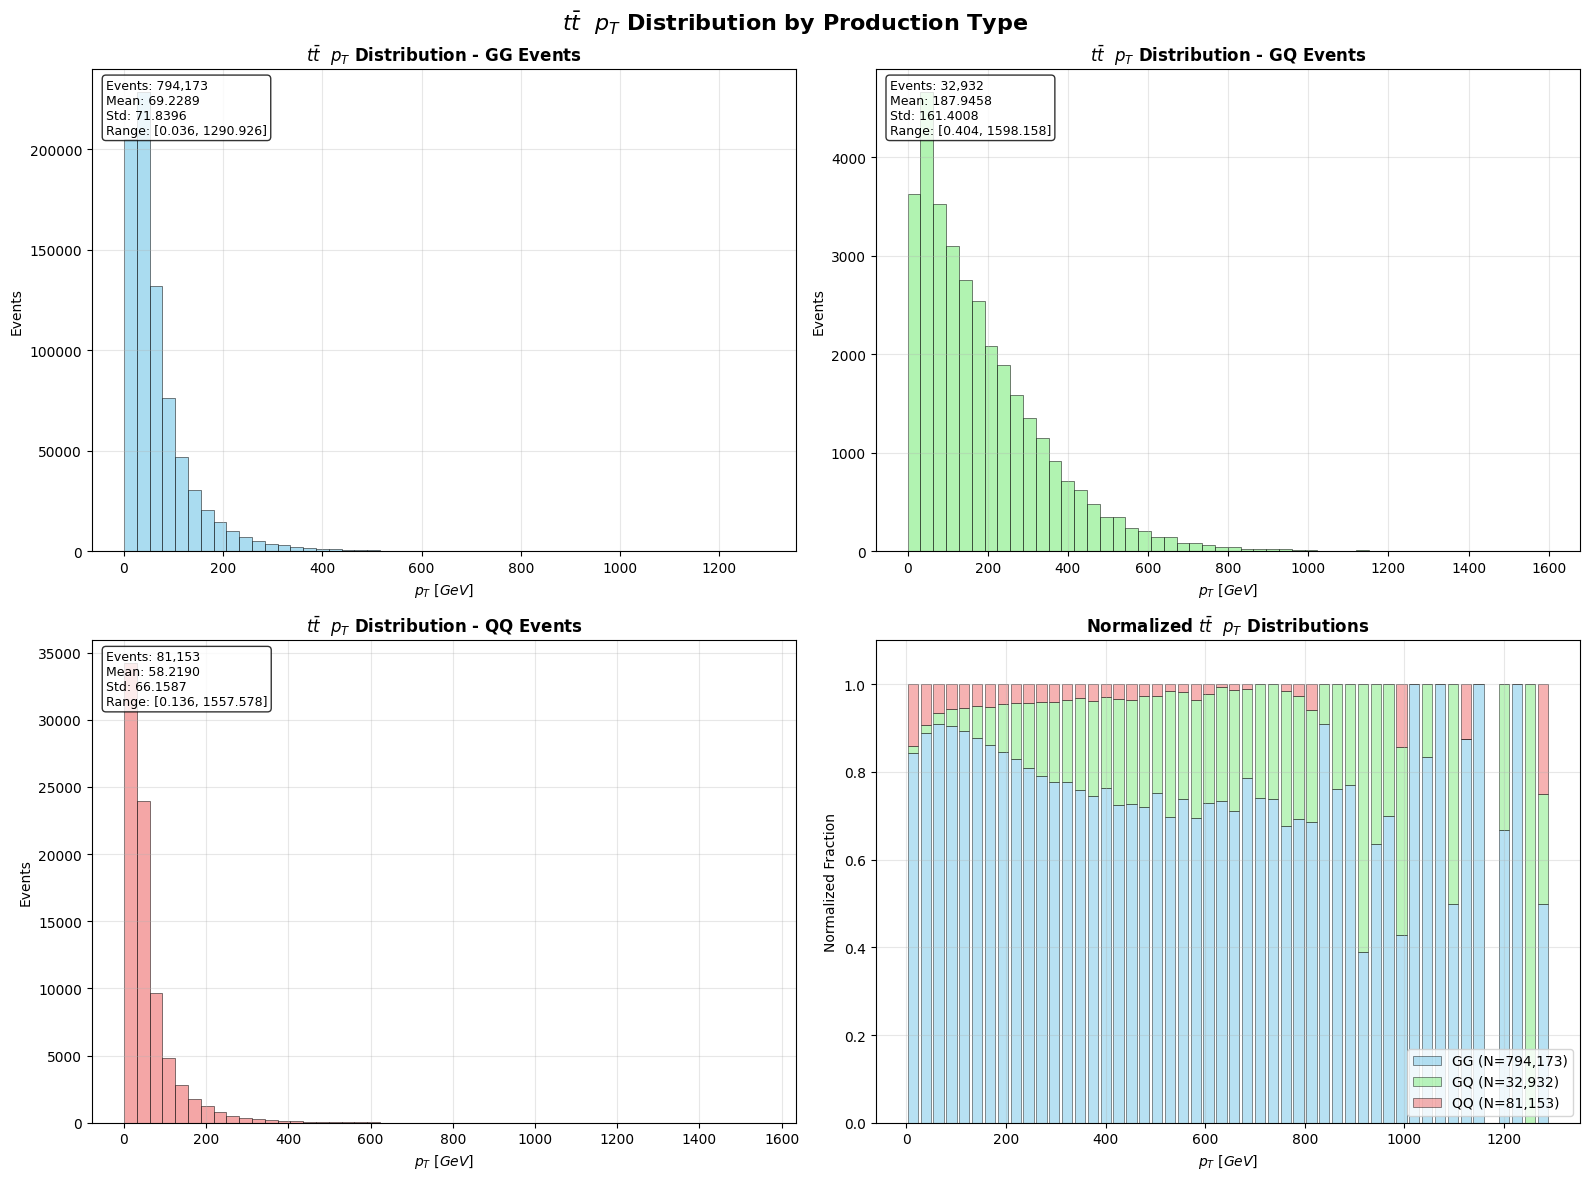

In [73]:
# Apply the function to analyze ttbar_pT normalized
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=ttbar_pT,
    variable_name="ttbar p_T",
    FileName=preSavefig+'ttbar_pT_prod_type_norm1'+sufSavefig,
    xlabel=r'$p_T~[GeV]$',
    title_prefix=r'$t\bar{t}~$ $p_T$',
    overlay_bins=50
)

## $\Delta \eta$, $\Delta R$ for b jets

In [39]:
#Computing the other needed variables with the new dataframe
start_time = time.time()
bbbar_deltaeta=np.empty(len(df_cut))
bbbar_deltaR=np.empty(len(df_cut))
ttbar_deltaeta=np.empty(len(df_cut))
ttbar_deltaR=np.empty(len(df_cut))

for j in range(len(df_cut)):
    bbbar_deltaeta[j]=df_cut['had_b_4vec'].iloc[j].deltaeta(df_cut['lep_b_4vec'].iloc[j])
    bbbar_deltaR[j]=df_cut['had_b_4vec'].iloc[j].deltaR(df_cut['lep_b_4vec'].iloc[j])
    ttbar_deltaeta[j]=df_cut['had_t'].iloc[j].deltaeta(df_cut['lep_t'].iloc[j])
    ttbar_deltaR[j]=df_cut['had_t'].iloc[j].deltaR(df_cut['lep_t'].iloc[j])

creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 52.0743 seconds


#### Plotting for bbbar

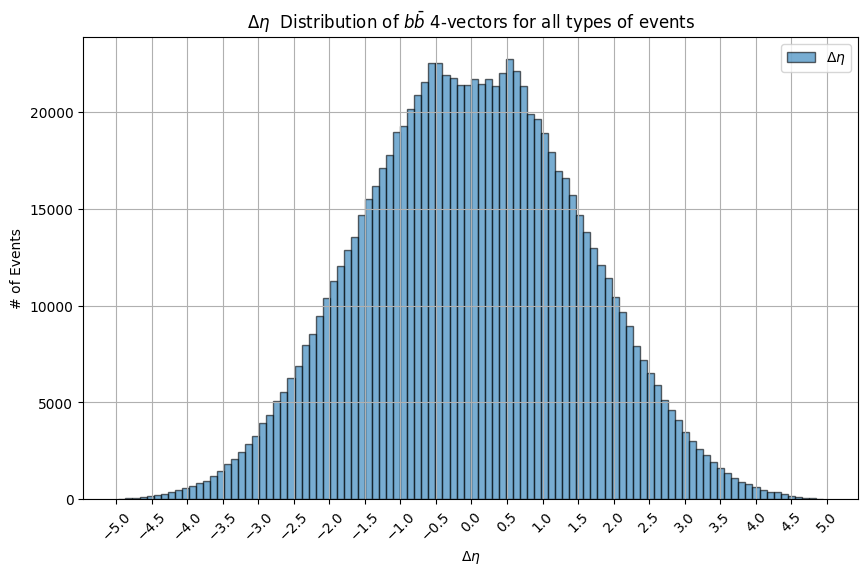

In [40]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(bbbar_deltaeta, bins=100, alpha=0.6, edgecolor='black', density=False, label=r'$\Delta\eta$')

plt.xlabel(r'$\Delta \eta$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(-5,5.5, 0.5),rotation=45)
plt.title(r'$\Delta \eta~$ Distribution of $b\bar{b}$ 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'DeltaEta_bbar_all'+sufSavefig)
plt.show()

🔬 bbbar $\Delta\eta$ Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.0018
   • Std: 1.5351
   • Range: [-4.969, 4.946]

GQ Production:
   • Events: 32,932
   • Mean: 0.0088
   • Std: 1.4814
   • Range: [-4.835, 4.797]

QQ Production:
   • Events: 81,153
   • Mean: 0.0099
   • Std: 1.3108
   • Range: [-4.822, 4.853]


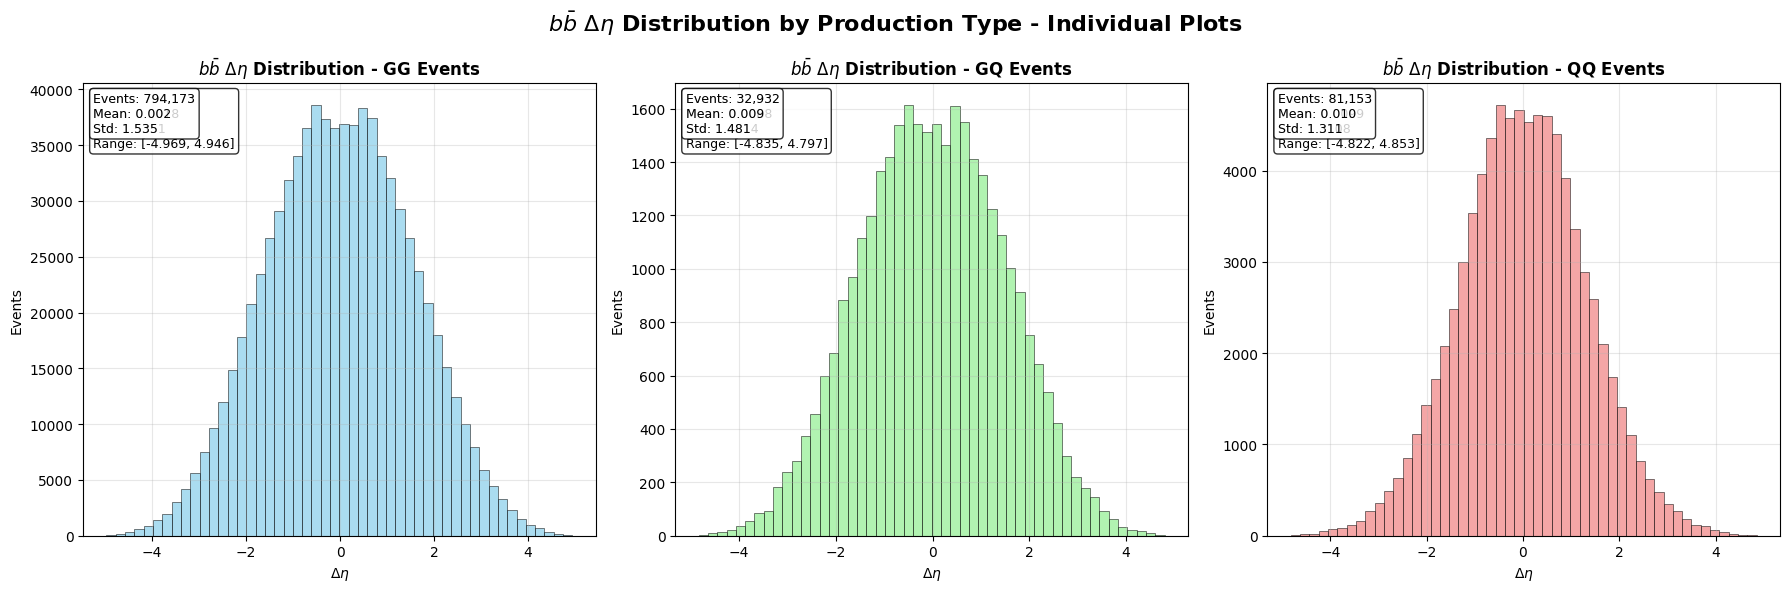

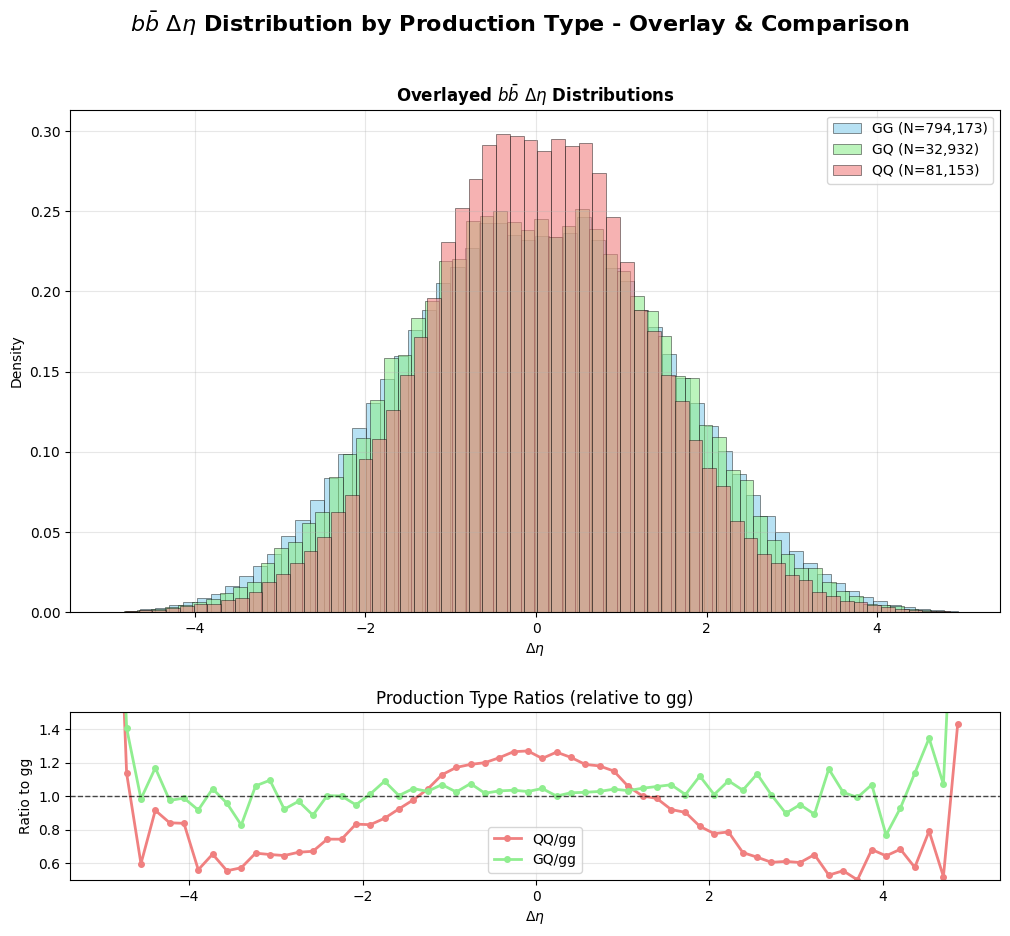

In [41]:
# Apply the function to analyze delta eta over bbar
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=bbbar_deltaeta,
    variable_name="bbbar $\Delta\eta$",
    FileName=preSavefig+'DeltaEta_bbar_prod_type'+sufSavefig,
    xlabel=r'$\Delta\eta$',
    title_prefix=r'$b\bar{b} $ $\Delta\eta$',
    overlay_bins=60
)

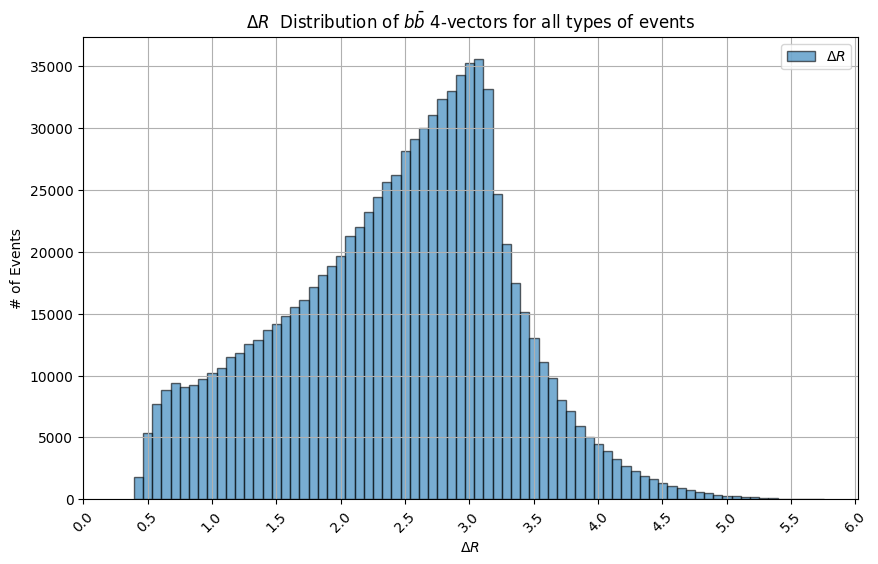

In [42]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(bbbar_deltaR, bins=75, alpha=0.6, edgecolor='black', density=False, label=r'$\Delta R$')

plt.xlabel(r'$\Delta R$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,6.5, 0.5),rotation=45)
plt.title(r'$\Delta R~$ Distribution of $b\bar{b}$ 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'DeltaR_bbar_all'+sufSavefig)
plt.show()

🔬 bbbar $\Delta R$ Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 2.4485
   • Std: 0.8728
   • Range: [0.394, 5.754]

GQ Production:
   • Events: 32,932
   • Mean: 2.3489
   • Std: 0.8750
   • Range: [0.403, 5.565]

QQ Production:
   • Events: 81,153
   • Mean: 2.3780
   • Std: 0.8304
   • Range: [0.401, 5.677]


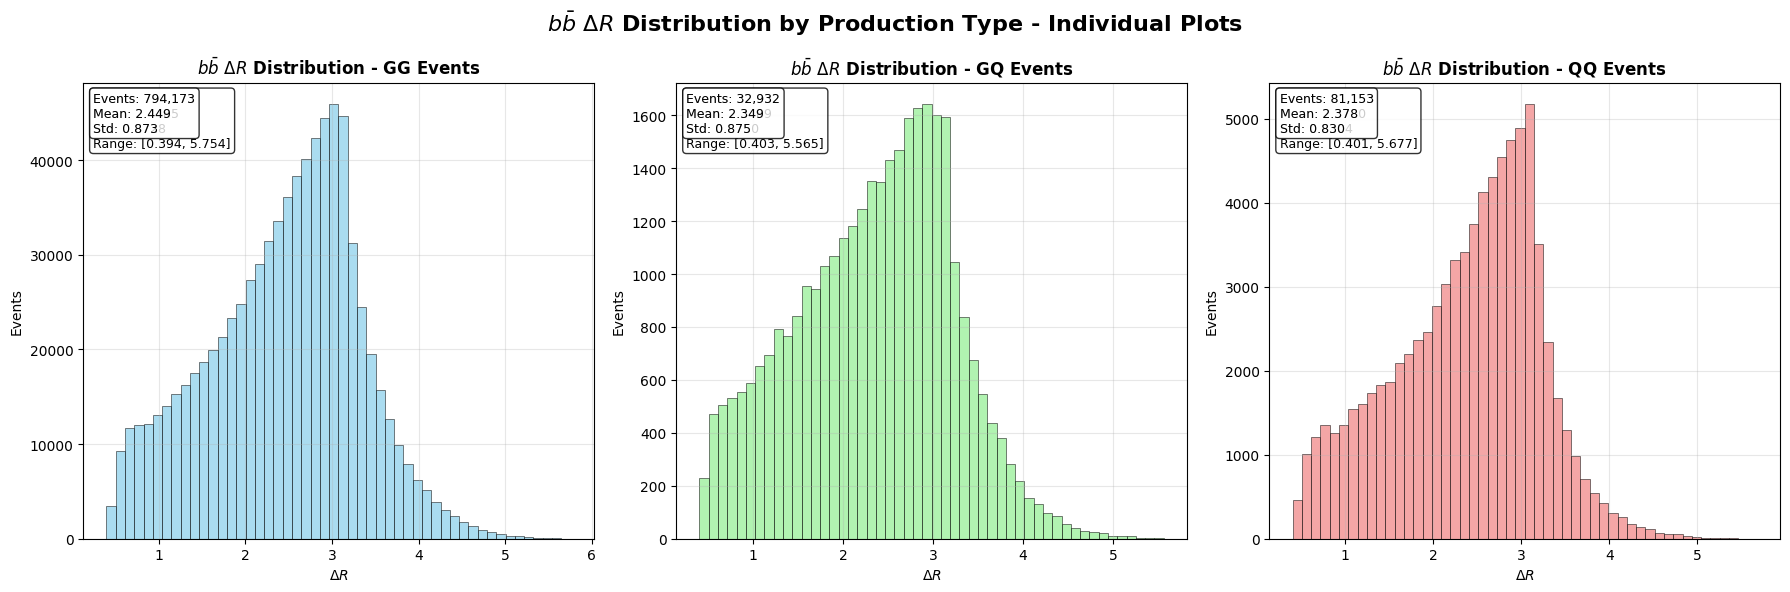

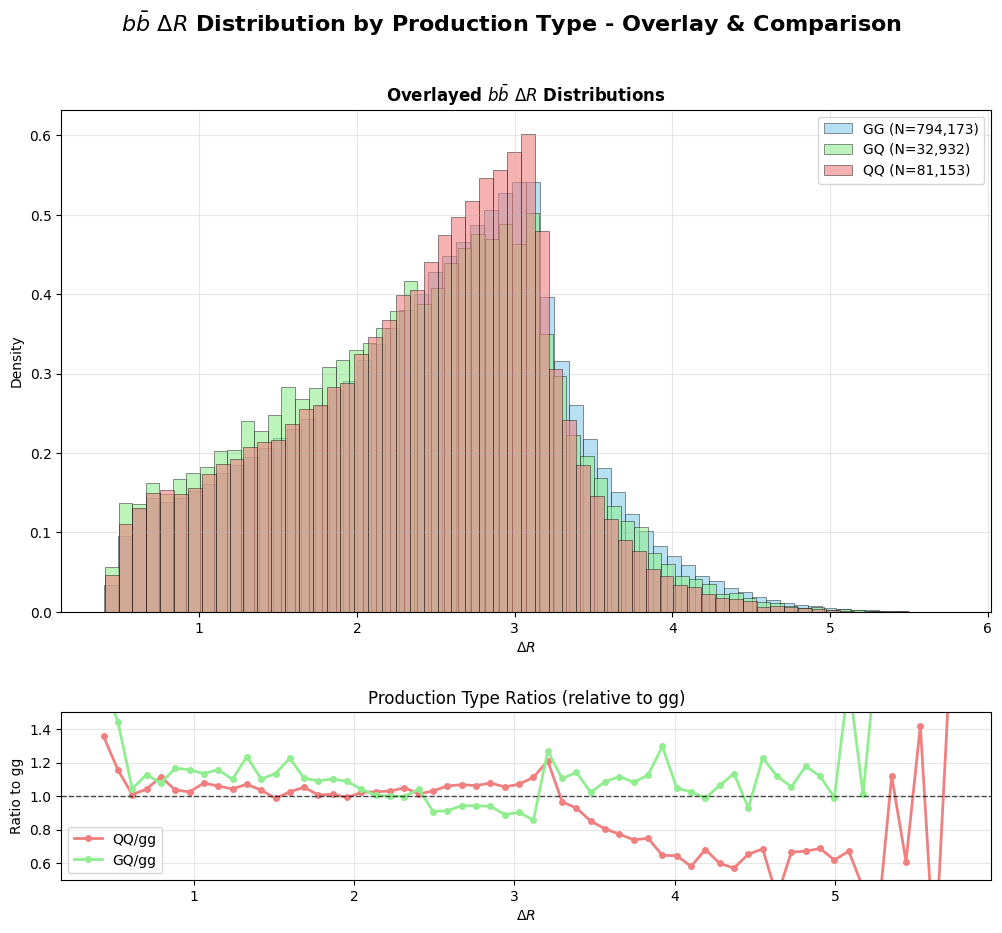

In [43]:
# Apply the function to analyze delta R over bbar
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=bbbar_deltaR,
    variable_name="bbbar $\Delta R$",
    FileName=preSavefig+'DeltaR_bbar_prod_type'+sufSavefig,
    xlabel=r'$\Delta R$',
    title_prefix=r'$b\bar{b} $ $\Delta R$',
    overlay_bins=60
)

#### Plotting for ttbar

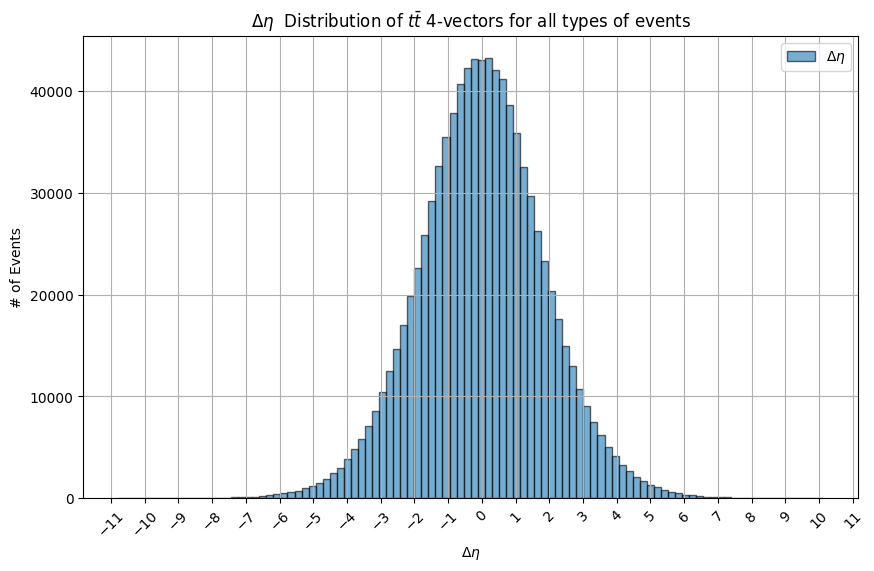

In [44]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(ttbar_deltaeta, bins=100, alpha=0.6, edgecolor='black', density=False, label=r'$\Delta\eta$')

plt.xlabel(r'$\Delta \eta$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(-11,12, 1),rotation=45)
plt.title(r'$\Delta \eta~$ Distribution of $t\bar{t}$ 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'DeltaEta_ttbar_all'+sufSavefig)
plt.show()

🔬 ttbar $\Delta\eta$ Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.0036
   • Std: 1.8849
   • Range: [-10.781, 9.850]

GQ Production:
   • Events: 32,932
   • Mean: 0.0032
   • Std: 1.7282
   • Range: [-9.980, 10.114]

QQ Production:
   • Events: 81,153
   • Mean: 0.0072
   • Std: 1.4835
   • Range: [-10.277, 9.073]


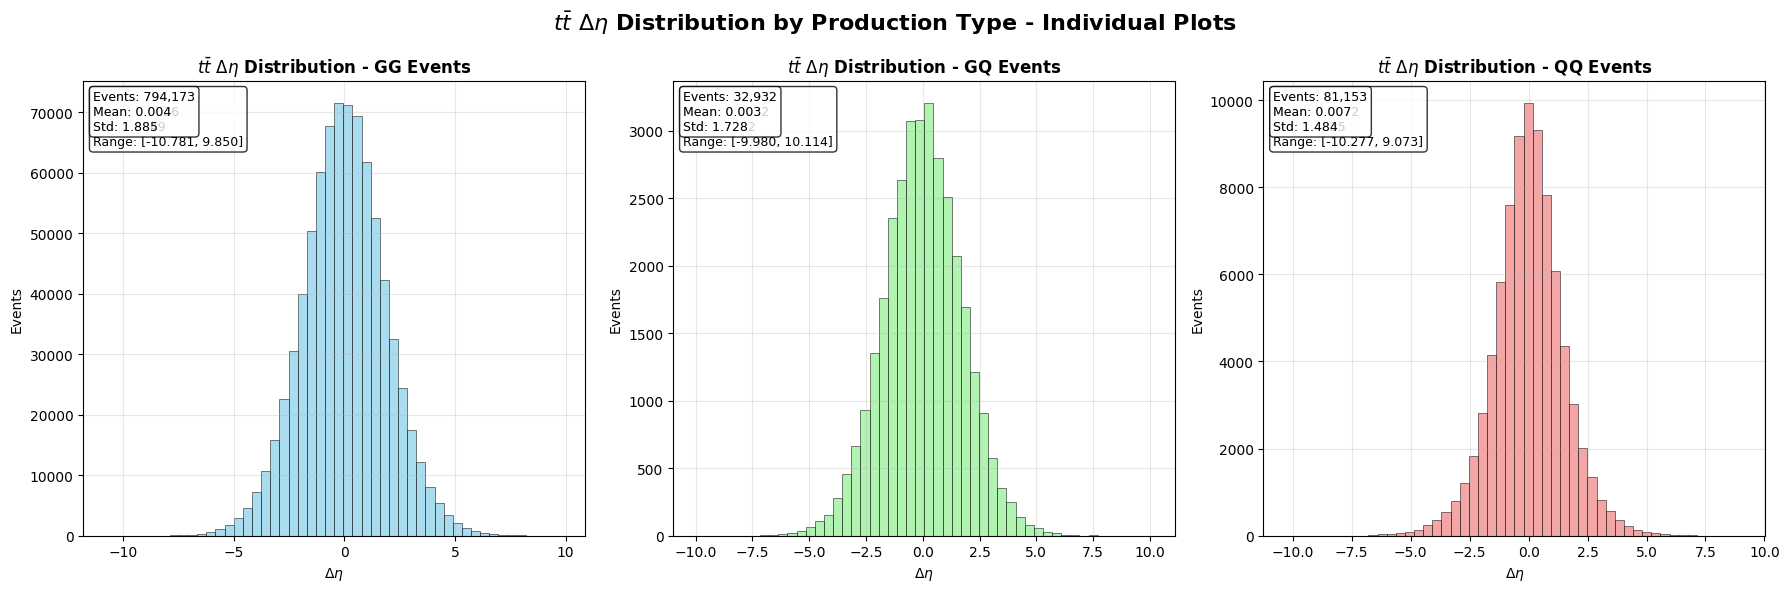

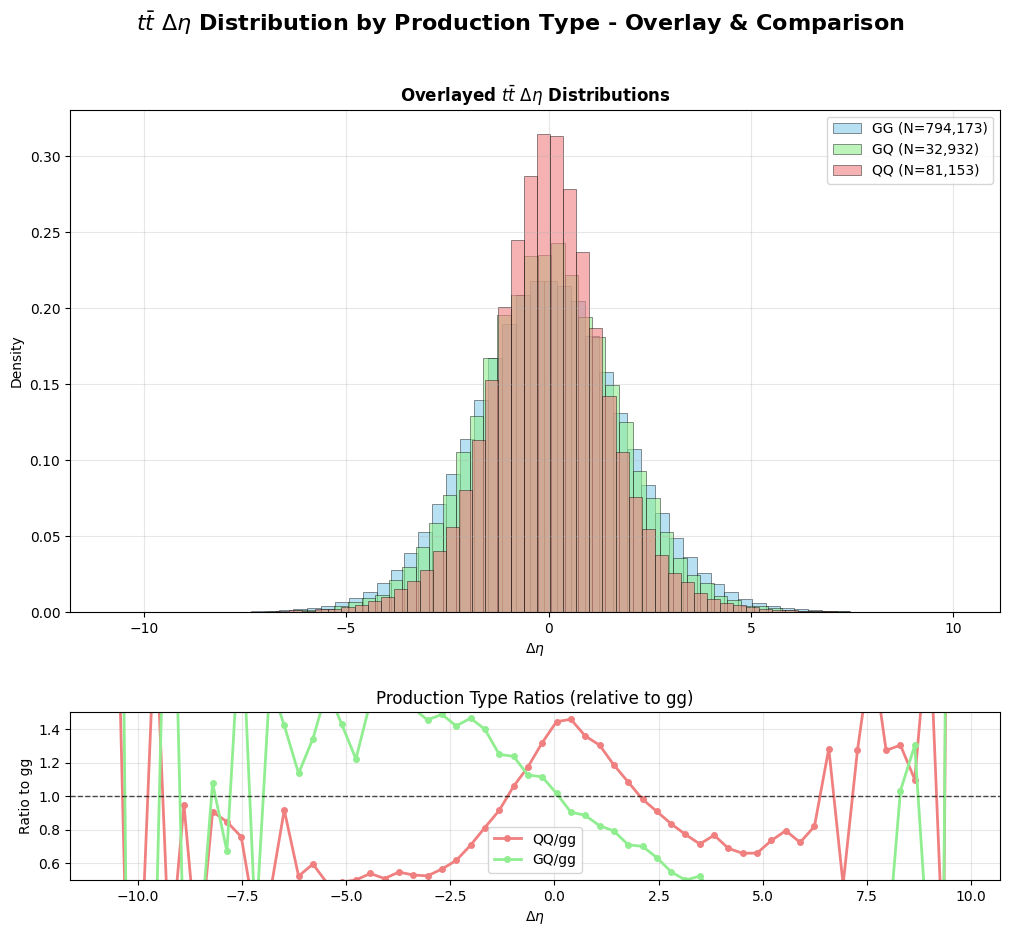

In [45]:
# Apply the function to analyze delta eta over bbar
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=ttbar_deltaeta,
    variable_name="ttbar $\Delta\eta$",
    FileName=preSavefig+'DeltaEta_ttbar_prod_type'+sufSavefig,
    xlabel=r'$\Delta\eta$',
    title_prefix=r'$t\bar{t} $ $\Delta\eta$',
    overlay_bins=60
)

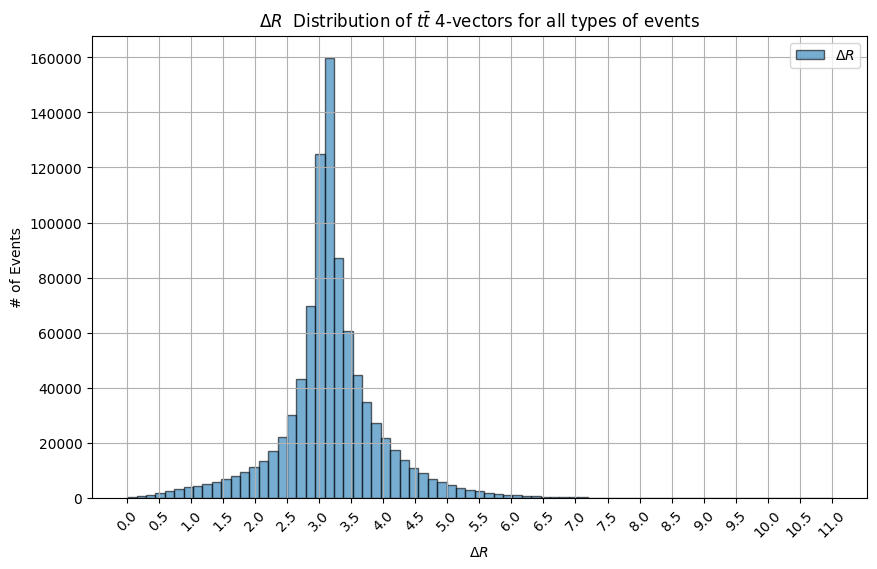

In [46]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(ttbar_deltaR, bins=75, alpha=0.6, edgecolor='black', density=False, label=r'$\Delta R$')

plt.xlabel(r'$\Delta R$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,11.5, 0.5),rotation=45)
plt.title(r'$\Delta R~$ Distribution of $t\bar{t}$ 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'DeltaR_ttbar_all'+sufSavefig)
plt.show()

🔬 ttbar $\Delta R$ Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 3.2042
   • Std: 0.8092
   • Range: [0.005, 11.000]

GQ Production:
   • Events: 32,932
   • Mean: 2.7212
   • Std: 1.0045
   • Range: [0.009, 10.450]

QQ Production:
   • Events: 81,153
   • Mean: 3.1009
   • Std: 0.6515
   • Range: [0.010, 10.438]


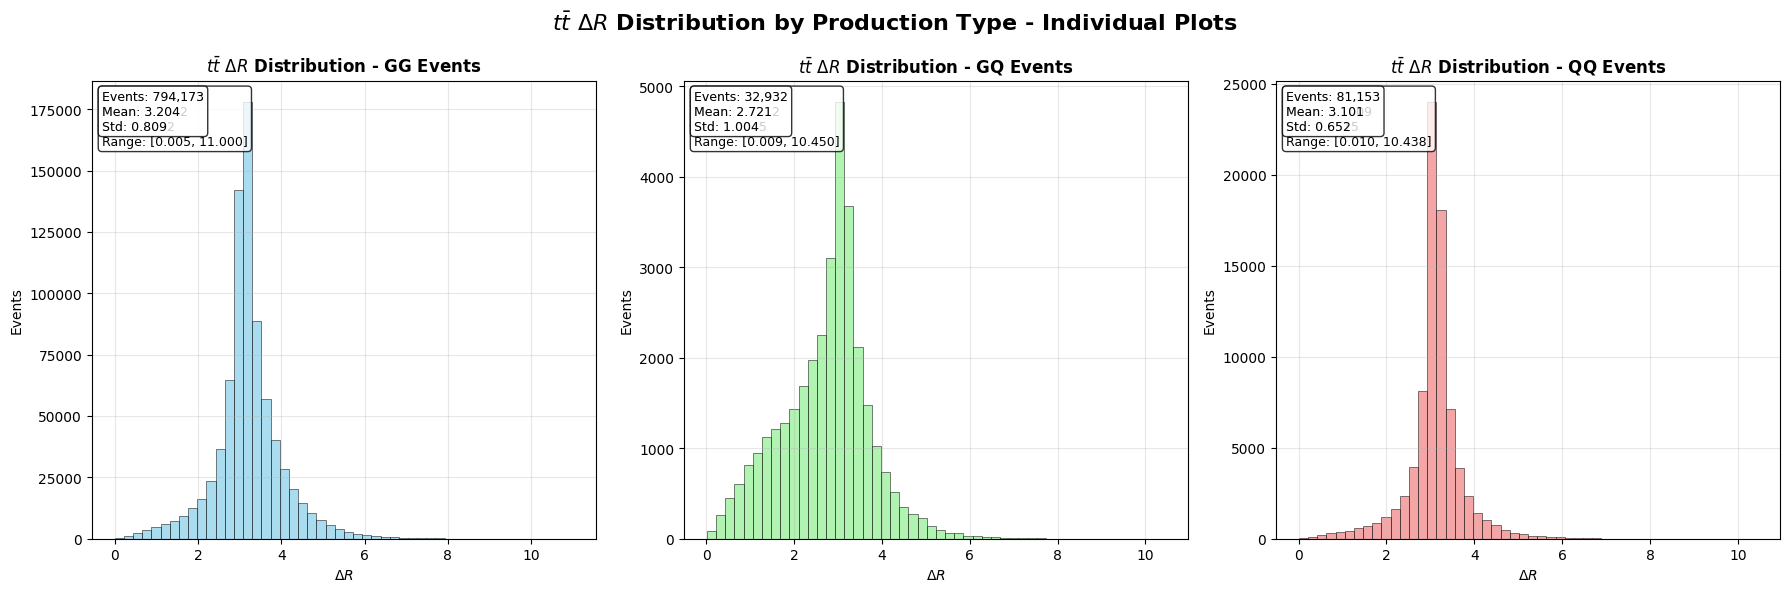

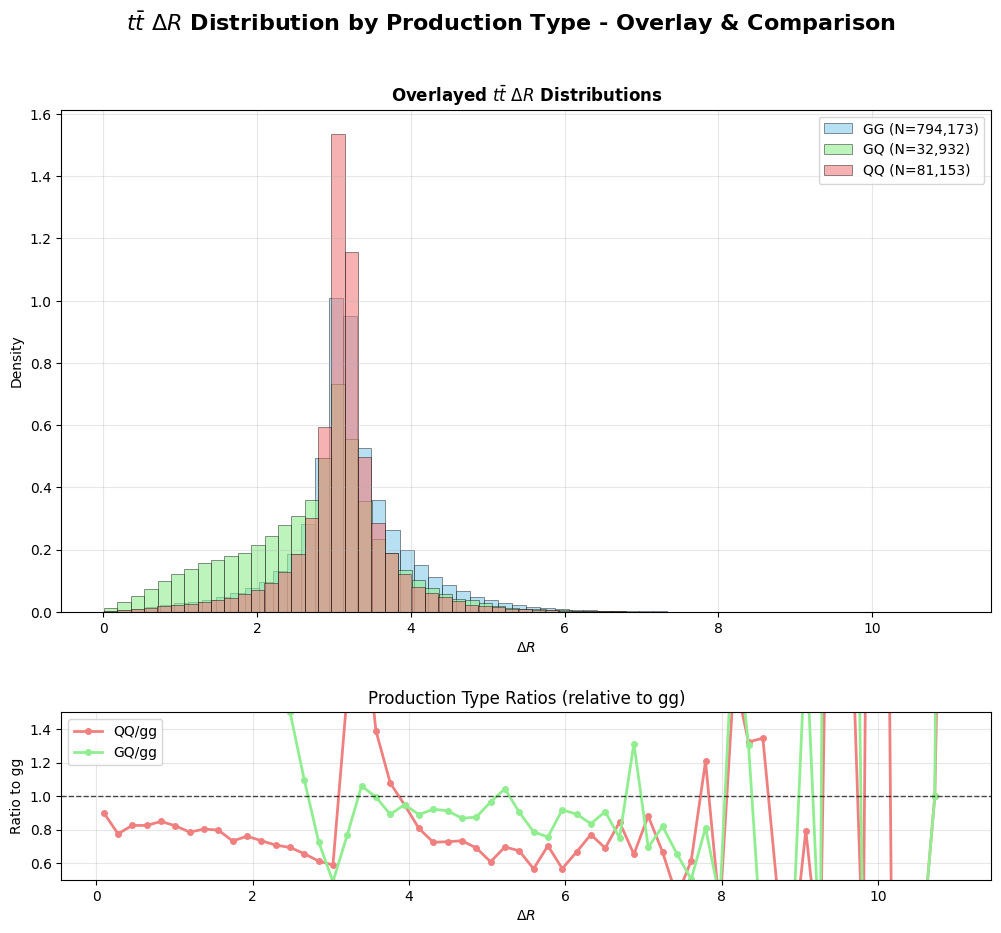

In [47]:
# Apply the function to analyze delta R over ttbar
fig = mplt.plot_variable_by_production_type(
    df=df_cut, 
    variable_array=ttbar_deltaR,
    variable_name="ttbar $\Delta R$",
    FileName=preSavefig+'DeltaR_ttbar_prod_type'+sufSavefig,
    xlabel=r'$\Delta R$',
    title_prefix=r'$t\bar{t} $ $\Delta R$',
    overlay_bins=60
)

#### Chel (cosPhi)

In [48]:
#Computing cos Phi
start_time = time.time()


ttbar_D_variable=np.empty(len(df_cut))  # New D variable

for j in range(len(df_cut)):
    
    # Calculate D variable
    ttbar_D_variable[j] = DH.calculateD(
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j],
        thad_4vec=df_cut['had_t'].iloc[j],
        tlep_4vec=df_cut['lep_t'].iloc[j], 
        down_4vec=df_cut['down_4vec'].iloc[j], 
        lep_4vec=df_cut['lepton_4vec'].iloc[j],
        apply_ttbar_boost=True
    )
    
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")
print(f"📊 D variable statistics:")
print(f"   • Valid calculations: {np.sum(ttbar_D_variable != -55.0)}")
print(f"   • Failed calculations: {np.sum(ttbar_D_variable == -55.0)}")

# Only show statistics if there are valid calculations
valid_D_values = ttbar_D_variable[ttbar_D_variable != -55.0]
if len(valid_D_values) > 0:
    print(f"   • Mean D (valid only): {np.mean(valid_D_values):.4f}")
    print(f"   • Range: [{np.min(valid_D_values):.4f}, {np.max(valid_D_values):.4f}]")
else:
    print(f"   • No valid D calculations available")


⚡ Creation completed in 245.7294 seconds
📊 D variable statistics:
   • Valid calculations: 908258
   • Failed calculations: 0
   • Mean D (valid only): 0.0718
   • Range: [-1.0000, 1.0000]


🔬 D Variable Analysis by Production Type
Valid D calculations: 908258 out of 908258 (100.0%)
🔬 D variable Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.0760
   • Std: 0.5732
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: 0.0486
   • Std: 0.5731
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: 0.0407
   • Std: 0.5750
   • Range: [-1.000, 1.000]


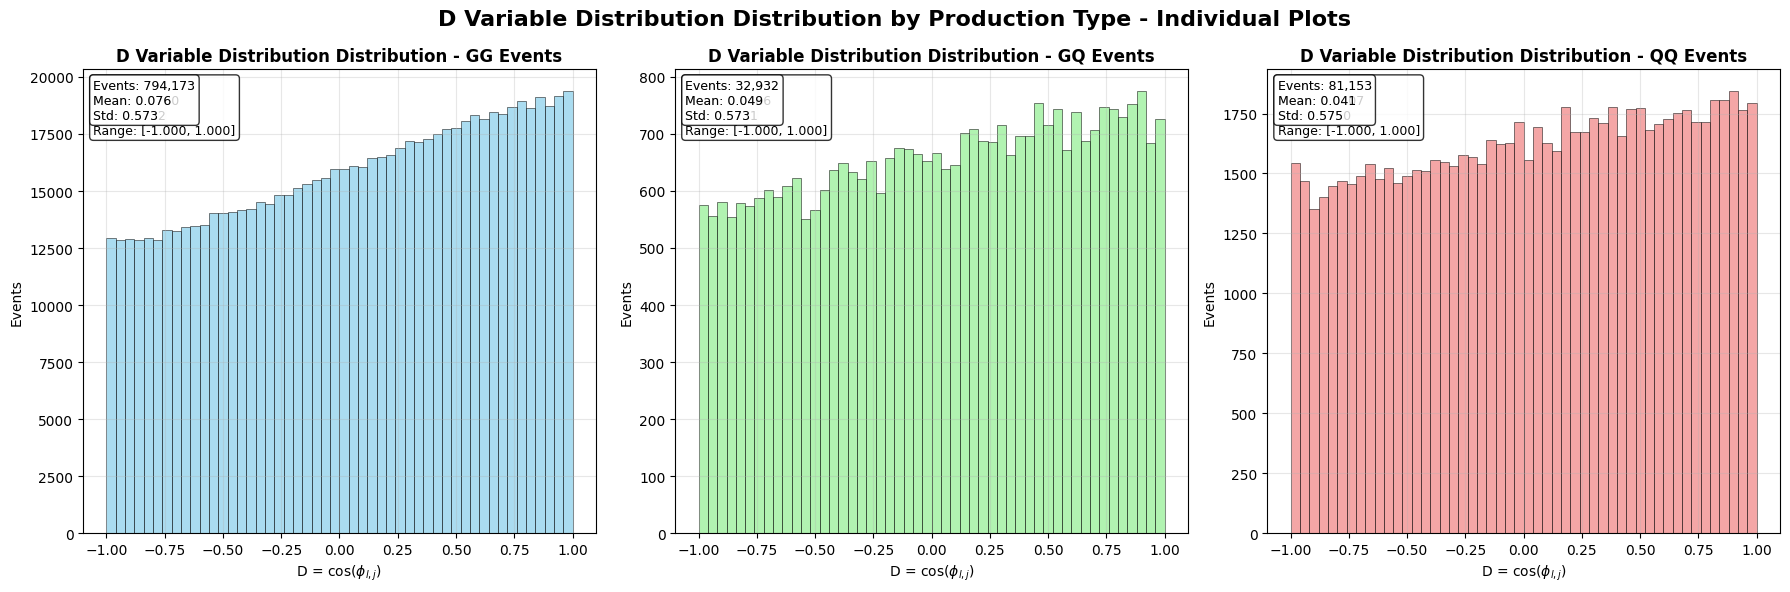

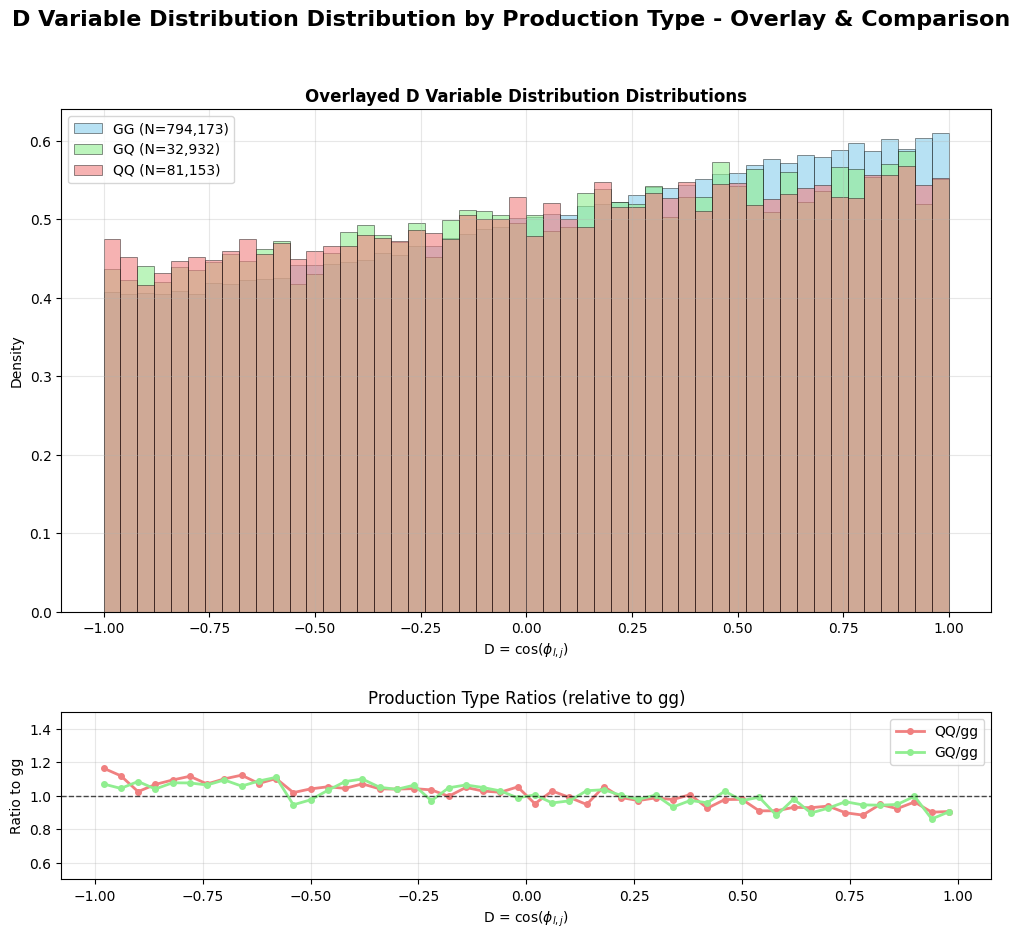

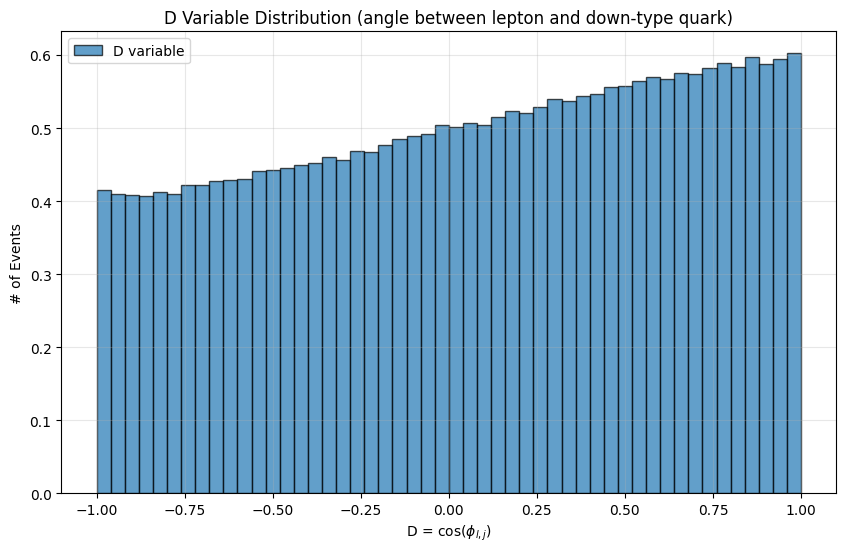

In [49]:
# Plot D variable distribution by production type
print("🔬 D Variable Analysis by Production Type")
print("=" * 50)

# Filter out failed calculations (-55.0)
valid_mask = ttbar_D_variable != -55.0
D_valid = ttbar_D_variable[valid_mask]
df_cut_valid = df_cut[valid_mask].reset_index(drop=True)

print(f"Valid D calculations: {len(D_valid)} out of {len(ttbar_D_variable)} ({100*len(D_valid)/len(ttbar_D_variable):.1f}%)")

if len(D_valid) > 0:
    # Apply the function to analyze D variable
    fig = mplt.plot_variable_by_production_type(
        df=df_cut_valid, 
        variable_array=D_valid,
        variable_name="D variable",
        FileName=preSavefig+'D_variable_prod_type'+sufSavefig,
        xlabel=r'D = cos($\phi_{l,j}$)',
        title_prefix=r'D Variable Distribution',
        overlay_bins=50
    )
    
    # Also create the general distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist(D_valid, bins=50, alpha=0.7, edgecolor='black', density=True, label='D variable')
    plt.xlabel(r'D = cos($\phi_{l,j}$)')
    plt.ylabel('# of Events')
    plt.title('D Variable Distribution (angle between lepton and down-type quark)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add statistics
    stats_text = (f'Events: {len(D_valid):,}\n'
                 f'Mean: {D_valid.mean():.4f}\n'
                 f'Std: {D_valid.std():.4f}\n'
                 f'Range: [{D_valid.min():.3f}, {D_valid.max():.3f}]')
    # plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             # verticalalignment='top', fontsize=10,
             # bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.savefig(preSavefig+'D_variable_all'+sufSavefig)
    plt.show()
    
else:
    print("❌ No valid D variable calculations to plot")

🔬 D variable Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 0.0760
   • Std: 0.5732
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: 0.0486
   • Std: 0.5731
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: 0.0407
   • Std: 0.5750
   • Range: [-1.000, 1.000]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


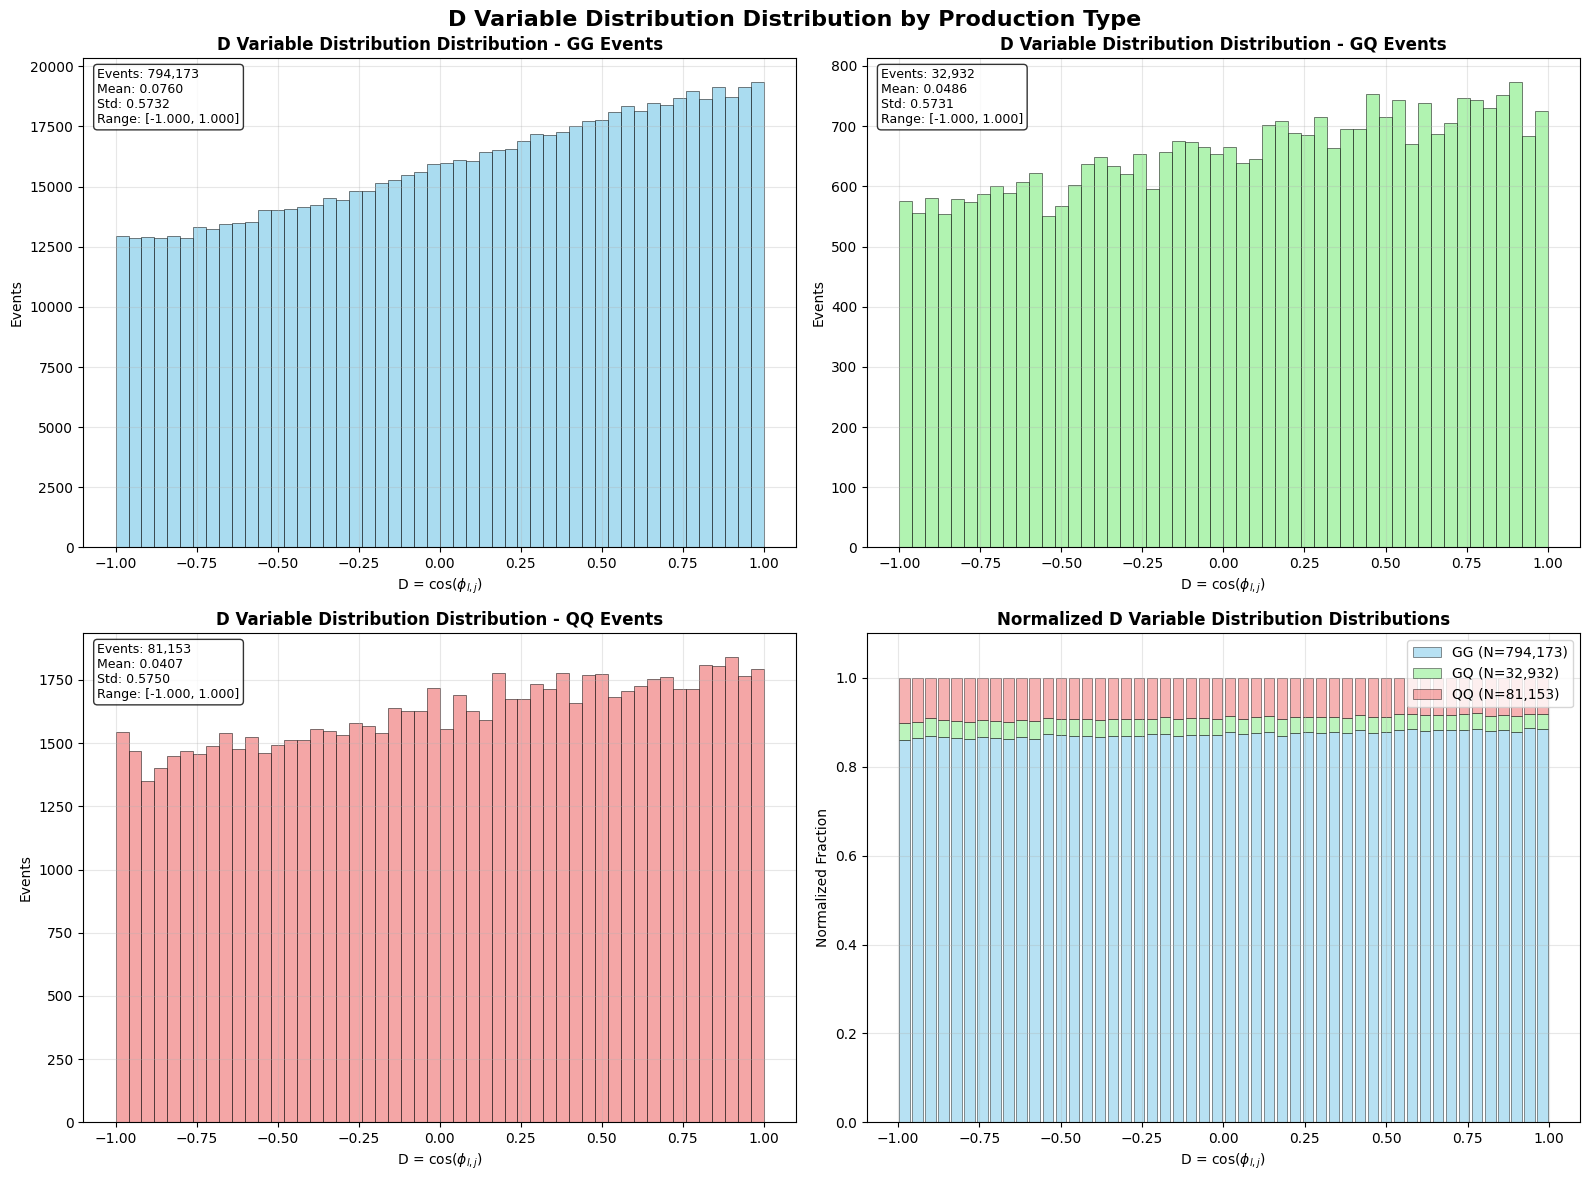

In [59]:
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut_valid, 
    variable_array=D_valid,
    variable_name="D variable",
    FileName=preSavefig+'D_variable_prod_type_norm1'+sufSavefig,
    xlabel=r'D = cos($\phi_{l,j}$)',
    title_prefix=r'D Variable Distribution',
    overlay_bins=50
)

#### Chan

In [50]:
# 🔬 Calculate C_han Variable (Corrected Approach)
print("🔬 Computing C_han Variable")
print("=" * 60)

# Initialize C_han array
ttbar_Cos_han_variable = np.full(len(df_cut), -55.0)

# Calculate C_han for each event
successful_calculations = 0
start_time = time.time()

for j in range(len(df_cut)):
    try:
        ttbar_Cos_han_variable[j] = DH.calculateCosHan(
            ttbar_4vec=df_cut['ttbar_4vec'].iloc[j],
            thad_4vec=df_cut['had_t'].iloc[j],
            tlep_4vec=df_cut['lep_t'].iloc[j],
            down_4vec=df_cut['down_4vec'].iloc[j],
            lep_4vec=df_cut['lepton_4vec'].iloc[j],
            apply_ttbar_boost=True
        )
        
        if ttbar_Cos_han_variable[j] != -55.0:
            successful_calculations += 1
            
    except Exception as e:
        ttbar_Cos_han_variable[j] = -55.0
        continue

end_time = time.time()

print(f"\n⚡ Computation completed in {end_time - start_time:.4f} seconds")
print(f"📊 C_han variable statistics:")
print(f"   • Valid calculations: {successful_calculations}")
print(f"   • Failed calculations: {len(df_cut) - successful_calculations}")
print(f"   • Success rate: {successful_calculations/len(df_cut)*100:.1f}%")

# Check the results
if successful_calculations > 0:
    valid_chan = ttbar_Cos_han_variable[ttbar_Cos_han_variable != -55.0]
    print(f"   • C_han range: [{np.min(valid_chan):.4f}, {np.max(valid_chan):.4f}]")
    print(f"   • Mean C_han: {np.mean(valid_chan):.4f}")
    print(f"   • Values in [-1,1]: {np.sum((valid_chan >= -1) & (valid_chan <= 1))}/{len(valid_chan)}")
    
    print("\n✅ C_han calculation completed successfully!")
    print("💡 Ready to plot with corrected C_han values")
else:
    print("\n❌ All C_han calculations failed")
    print("💡 May need to check boost direction (try negative boost like ROOT code)")

🔬 Computing C_han Variable

⚡ Computation completed in 263.0328 seconds
📊 C_han variable statistics:
   • Valid calculations: 908258
   • Failed calculations: 0
   • Success rate: 100.0%
   • C_han range: [-1.0000, 1.0000]
   • Mean C_han: 0.0757
   • Values in [-1,1]: 908258/908258

✅ C_han calculation completed successfully!
💡 Ready to plot with corrected C_han values


🔬 C_han Analysis by Production Type
Valid C_han calculations: 908258 out of 908258 (100.0%)
📊 Plotting C_han distribution with 908258 valid values
🔬 C_han Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.0772
   • Std: 0.5734
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: 0.0466
   • Std: 0.5791
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: 0.0731
   • Std: 0.5731
   • Range: [-1.000, 1.000]


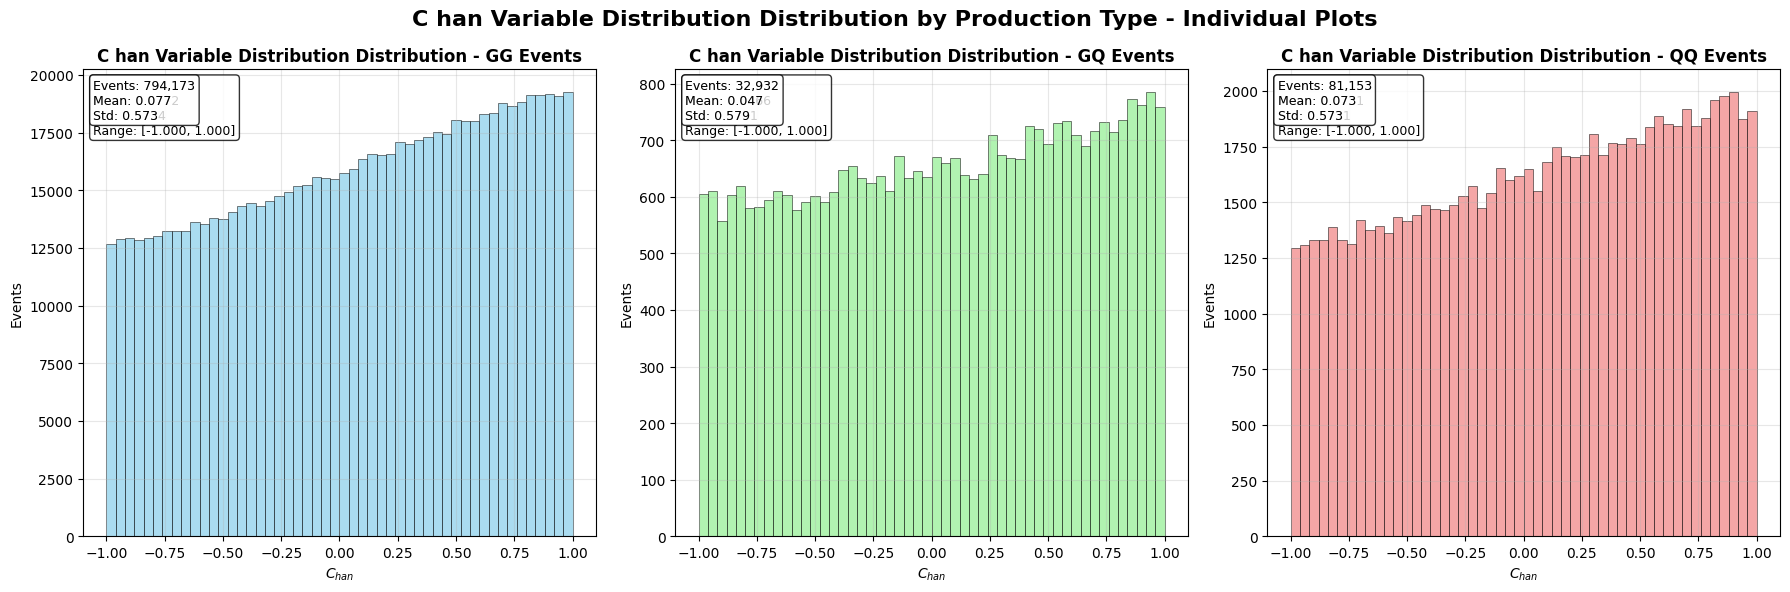

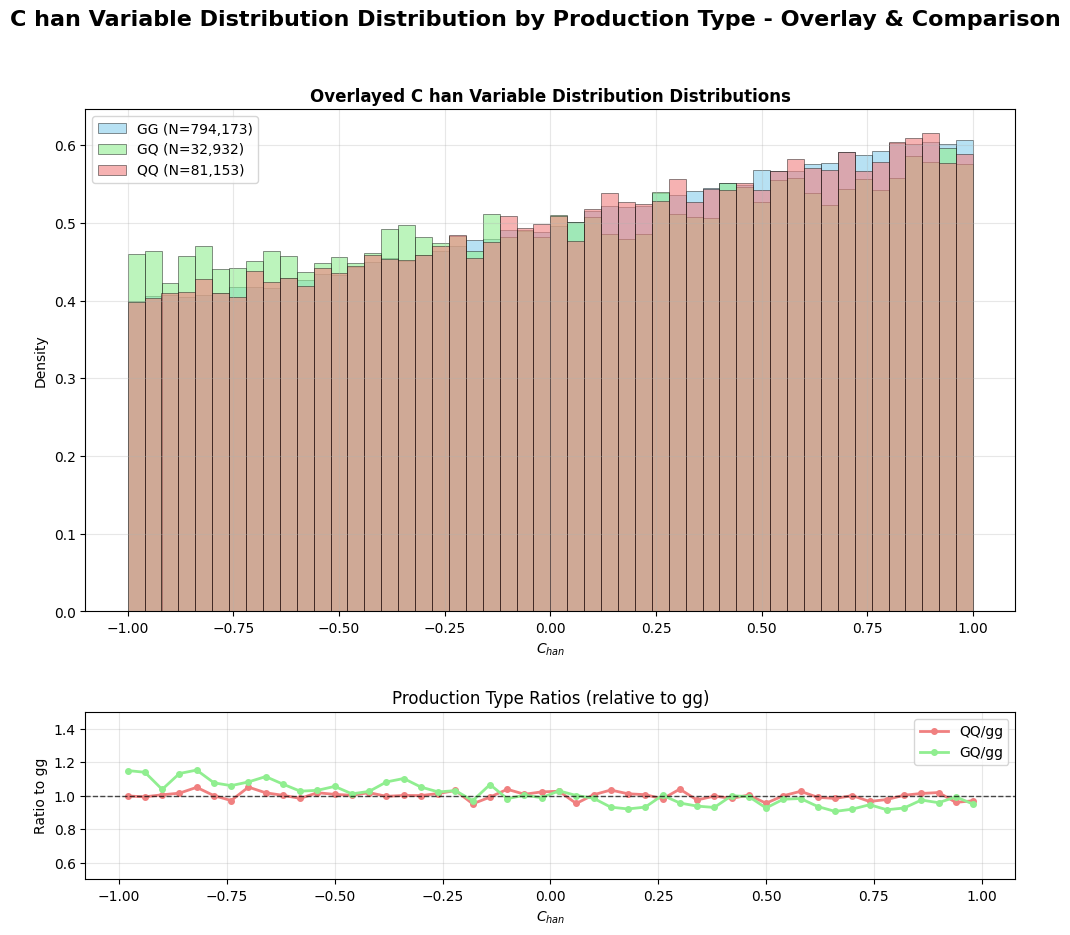

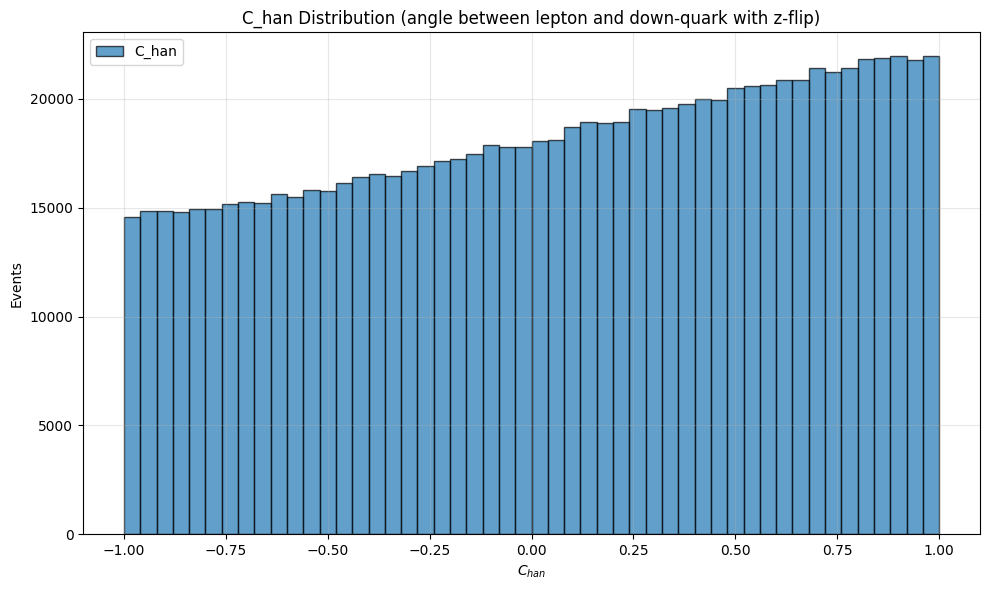

\n💡 C_han measures the correlation between leptons with z-component flip
✅ C_han plots created successfully!


In [51]:
# Plot C_han distribution by production type 
print("🔬 C_han Analysis by Production Type")
print("=" * 50)

# Create valid C_han array (excluding failed calculations)
valid_mask = ttbar_Cos_han_variable != -55.0
C_han_valid = ttbar_Cos_han_variable[valid_mask]

print(f"Valid C_han calculations: {len(C_han_valid)} out of {len(ttbar_Cos_han_variable)} ({100*len(C_han_valid)/len(ttbar_Cos_han_variable):.1f}%)")

if len(C_han_valid) > 100:  # Need sufficient data for meaningful plots
    print(f"📊 Plotting C_han distribution with {len(C_han_valid)} valid values")
    
    # Apply the function to analyze C_han (same style as cos(θ*))
    fig = mplt.plot_variable_by_production_type(
        df=df_cut, 
        variable_array=ttbar_Cos_han_variable,
        variable_name="C_han",
        FileName=preSavefig+'Chan_prod_type'+sufSavefig,
        xlabel=r'$C_{han}$',
        title_prefix=r'C han Variable Distribution',
        overlay_bins=50
    )
    
    # Additional simple plot
    plt.figure(figsize=(10, 6))
    plt.hist(C_han_valid, bins=50, alpha=0.7, edgecolor='black',
             label='C_han')
    plt.xlabel(r'$C_{han}$')
    plt.ylabel('Events')
    plt.title('C_han Distribution (angle between lepton and down-quark with z-flip)')
    plt.legend()
    plt.grid(True, alpha=0.3)    
    plt.tight_layout()
    plt.savefig(preSavefig+'C_han_all'+sufSavefig)
    plt.show()
    
    print("\\n💡 C_han measures the correlation between leptons with z-component flip")
    print("✅ C_han plots created successfully!")

else:
    print("❌ No valid C_han calculations to plot")
    print("💡 Check the corrected calculation results")

🔬 C_han Analysis by Production Type - NORMALIZED TO SUM=1

GG Production:
   • Events: 794,173
   • Mean: 0.0772
   • Std: 0.5734
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: 0.0466
   • Std: 0.5791
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: 0.0731
   • Std: 0.5731
   • Range: [-1.000, 1.000]

🔄 Applying special normalization: each bin sums to 1 across channels
   • Bin totals range: [1.000000, 1.000000] (should be close to 1.0)


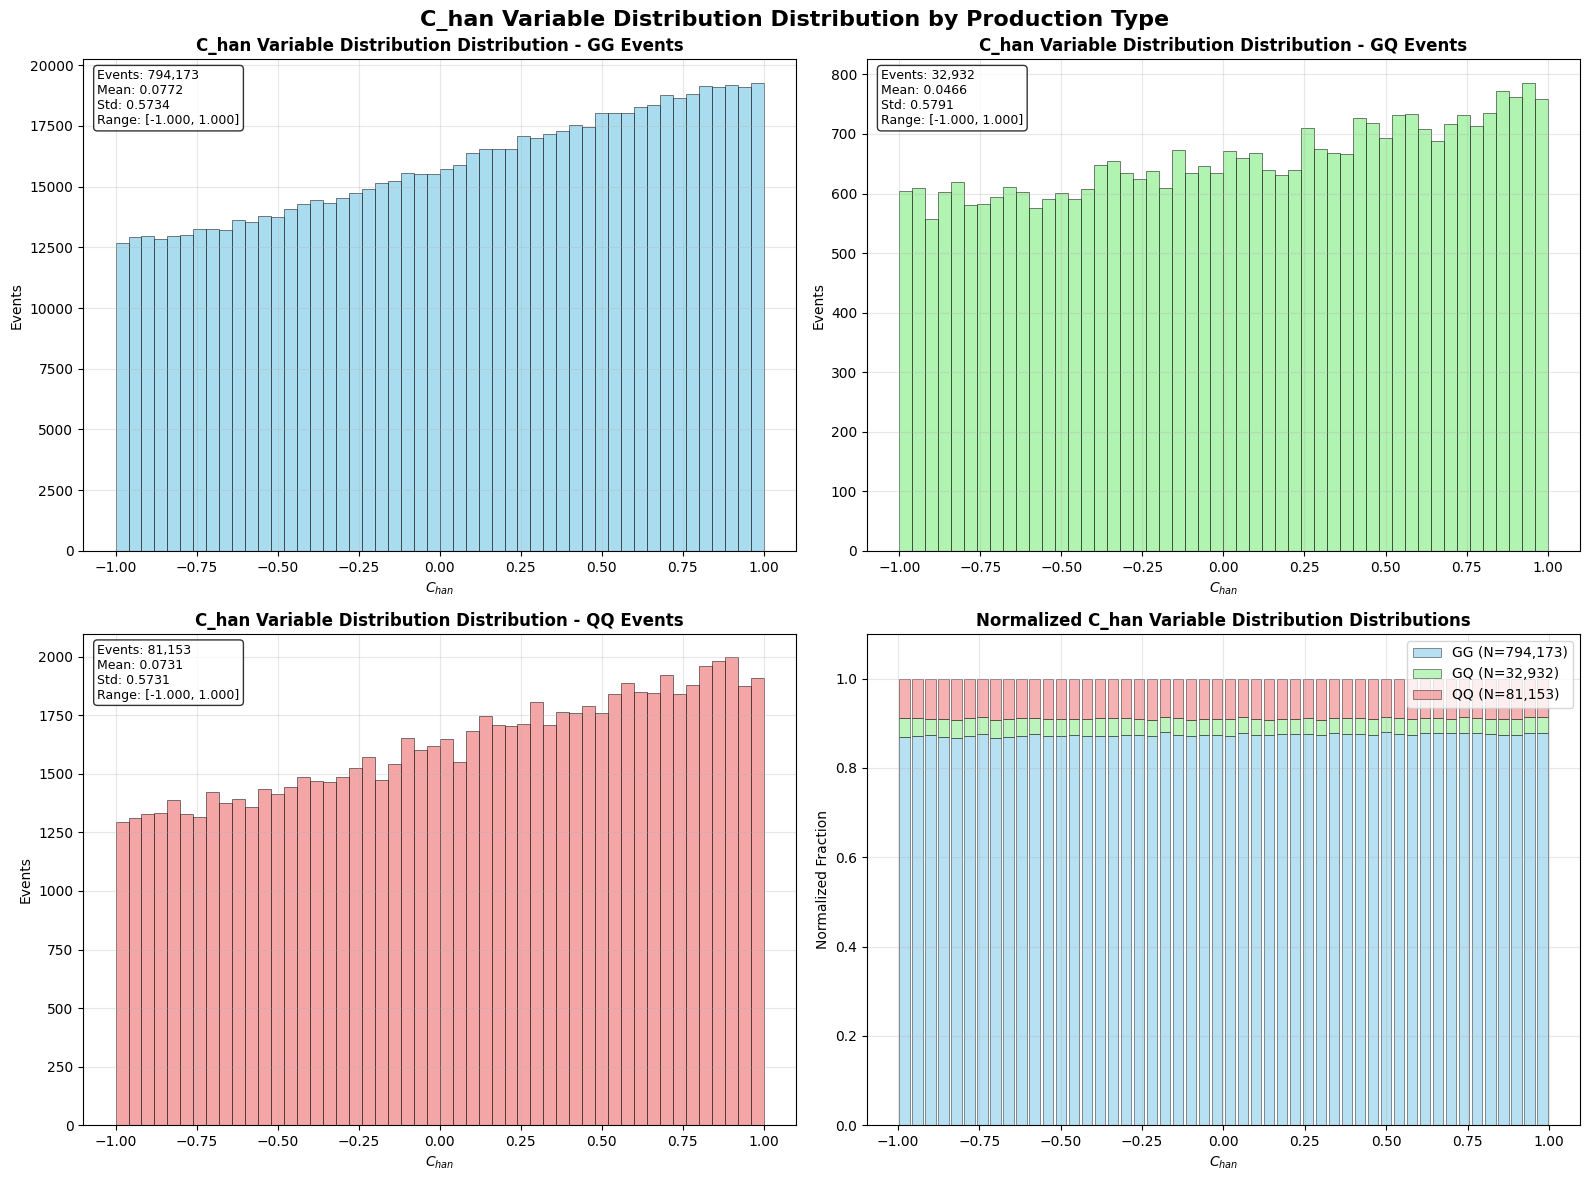

In [60]:
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=ttbar_Cos_han_variable,
    variable_name="C_han",
    FileName=preSavefig+'C_han_prod_type_norm1'+sufSavefig,
    xlabel=r'$C_{han}$',
    title_prefix=r'C_han Variable Distribution',
    overlay_bins=50
)

### cos$\theta^*$

In [52]:
# Compute cos(theta*) variables for the dataset
print("🔬 Computing cos(θ*) Variables for Hadronic and Leptonic Tops")
print("=" * 65)

start_time = time.time()

# Initialize arrays for both tops
ttbar_CosTstar_had = np.empty(len(df_cut))  # cos(θ*) for hadronic top
ttbar_CosTstar_lep = np.empty(len(df_cut))  # cos(θ*) for leptonic top

for j in range(len(df_cut)):
    # Calculate cos(θ*) for hadronic top
    ttbar_CosTstar_had[j] = DH.calculateCosTstar(
        top_4vec=df_cut['had_t'].iloc[j],
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j]
    )
    
    # Calculate cos(θ*) for leptonic top
    ttbar_CosTstar_lep[j] = DH.calculateCosTstar(
        top_4vec=df_cut['lep_t'].iloc[j],
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j]
    )

creation_time = time.time() - start_time

print(f"\n⚡ Computation completed in {creation_time:.4f} seconds")

# Statistics for hadronic top
valid_had = ttbar_CosTstar_had != -55.0
print(f"\n📊 cos(θ*) for Hadronic Top:")
print(f"   • Valid calculations: {np.sum(valid_had)} out of {len(ttbar_CosTstar_had)} ({100*np.sum(valid_had)/len(ttbar_CosTstar_had):.1f}%)")
if np.sum(valid_had) > 0:
    valid_values_had = ttbar_CosTstar_had[valid_had]
    print(f"   • Mean: {np.mean(valid_values_had):.4f}")
    print(f"   • Std: {np.std(valid_values_had):.4f}")
    print(f"   • Range: [{np.min(valid_values_had):.4f}, {np.max(valid_values_had):.4f}]")

# Statistics for leptonic top
valid_lep = ttbar_CosTstar_lep != -55.0
print(f"\n📊 cos(θ*) for Leptonic Top:")
print(f"   • Valid calculations: {np.sum(valid_lep)} out of {len(ttbar_CosTstar_lep)} ({100*np.sum(valid_lep)/len(ttbar_CosTstar_lep):.1f}%)")
if np.sum(valid_lep) > 0:
    valid_values_lep = ttbar_CosTstar_lep[valid_lep]
    print(f"   • Mean: {np.mean(valid_values_lep):.4f}")
    print(f"   • Std: {np.std(valid_values_lep):.4f}")
    print(f"   • Range: [{np.min(valid_values_lep):.4f}, {np.max(valid_values_lep):.4f}]")

print(f"\n💡 cos(θ*) measures the angular distribution of top quarks in the ttbar rest frame")
print(f"   • Values close to ±1: top aligned/anti-aligned with ttbar direction")
print(f"   • Values close to 0: top perpendicular to ttbar direction")
print(f"   • Important for studying top quark spin correlations and production dynamics")

🔬 Computing cos(θ*) Variables for Hadronic and Leptonic Tops

⚡ Computation completed in 214.2261 seconds

📊 cos(θ*) for Hadronic Top:
   • Valid calculations: 908258 out of 908258 (100.0%)
   • Mean: 0.0757
   • Std: 0.6291
   • Range: [-1.0000, 1.0000]

📊 cos(θ*) for Leptonic Top:
   • Valid calculations: 908258 out of 908258 (100.0%)
   • Mean: -0.0757
   • Std: 0.6291
   • Range: [-1.0000, 1.0000]

💡 cos(θ*) measures the angular distribution of top quarks in the ttbar rest frame
   • Values close to ±1: top aligned/anti-aligned with ttbar direction
   • Values close to 0: top perpendicular to ttbar direction
   • Important for studying top quark spin correlations and production dynamics


🔬 cos(θ*) Analysis for Hadronic Top by Production Type
Valid cos(θ*) calculations for hadronic top: 908258 out of 908258 (100.0%)
🔬 cos(θ*) hadronic Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: 0.0742
   • Std: 0.6347
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: 0.0645
   • Std: 0.6139
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: 0.0954
   • Std: 0.5778
   • Range: [-1.000, 1.000]


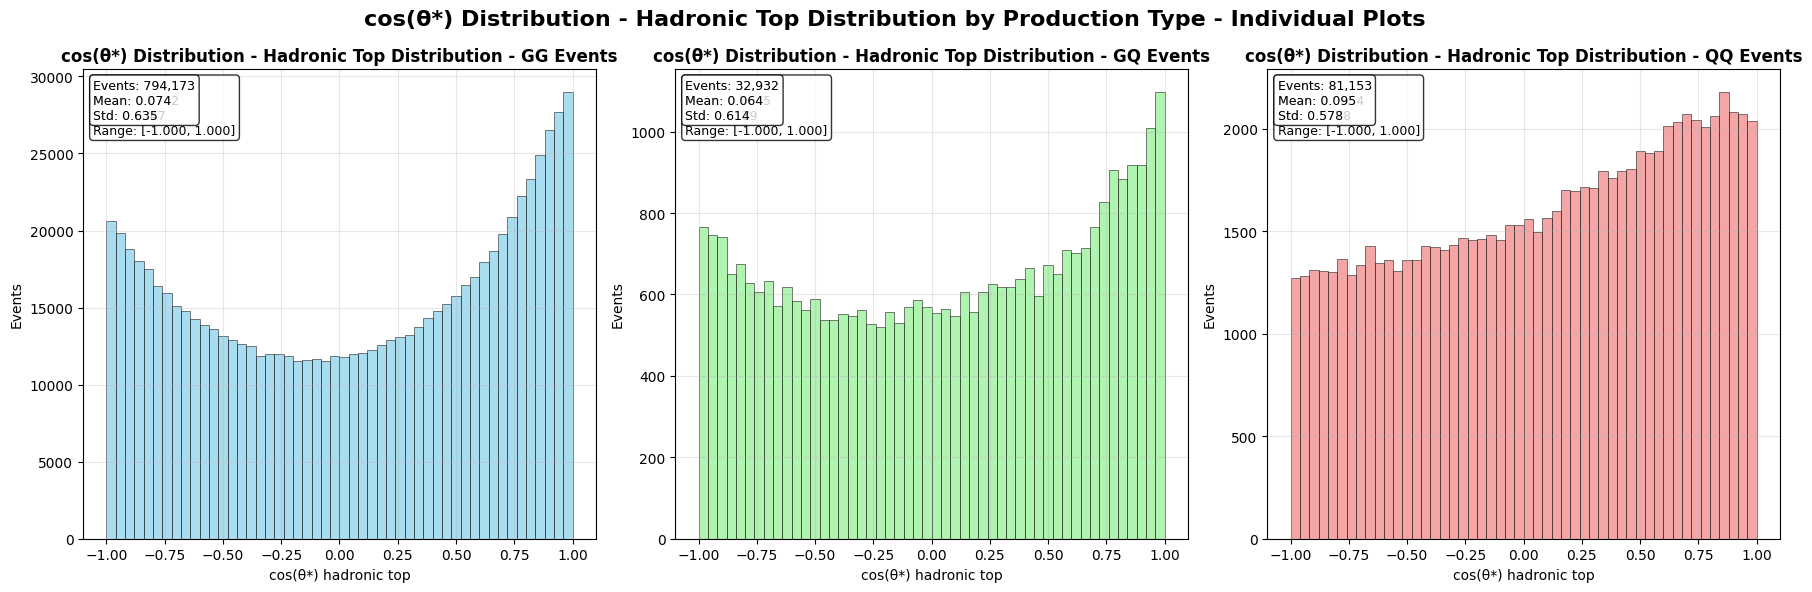

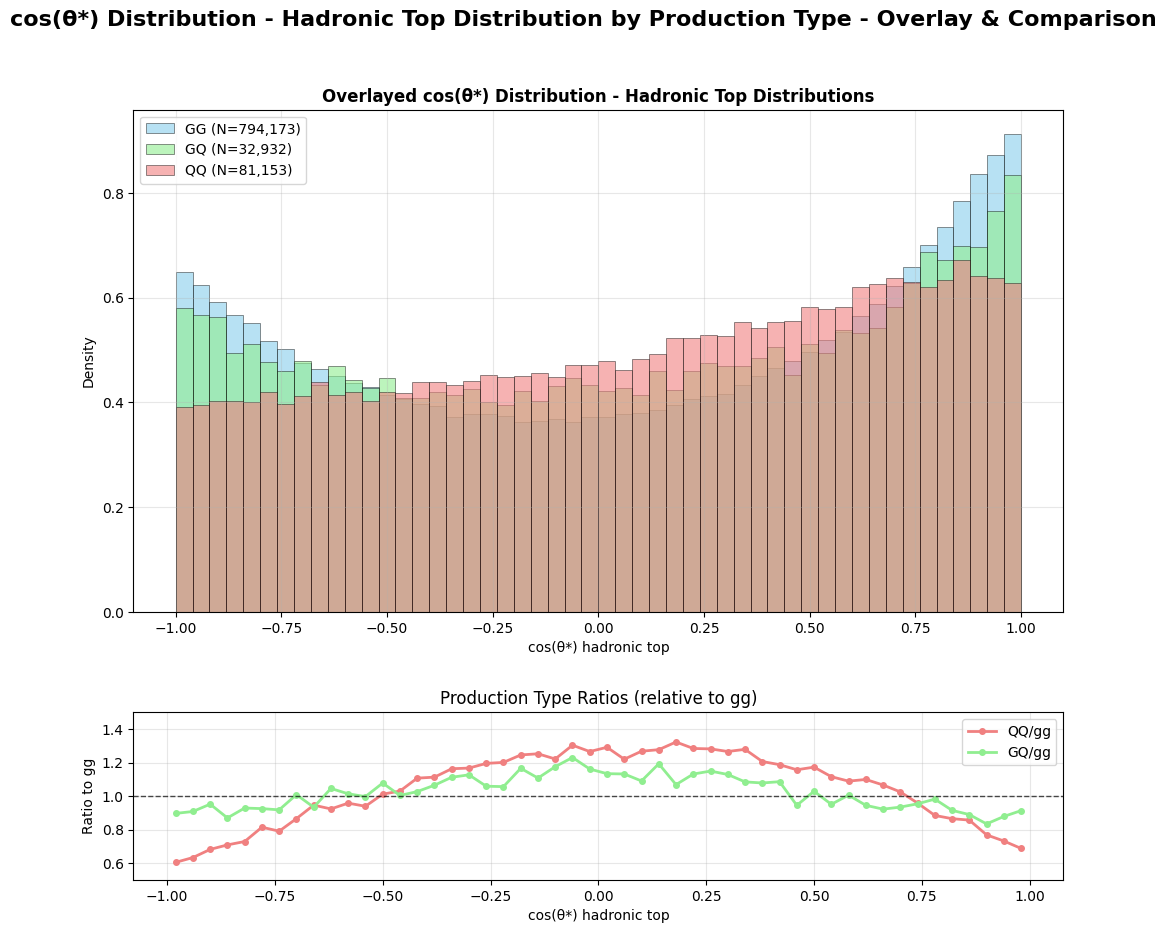

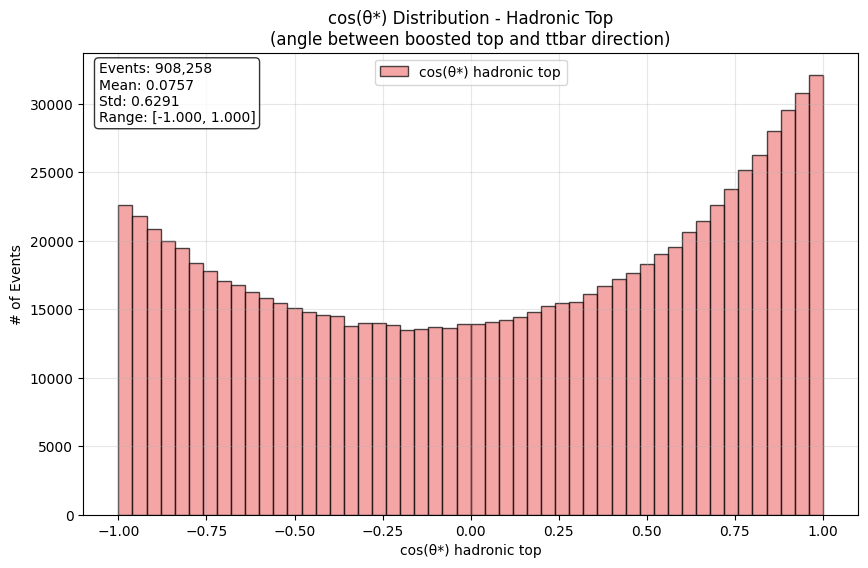

In [53]:
# Plot cos(θ*) distribution for hadronic top
print("🔬 cos(θ*) Analysis for Hadronic Top by Production Type")
print("=" * 60)

# Filter out failed calculations (-55.0)
valid_mask_had = ttbar_CosTstar_had != -55.0
CosTstar_had_valid = ttbar_CosTstar_had[valid_mask_had]
df_cut_valid_had = df_cut[valid_mask_had].reset_index(drop=True)

print(f"Valid cos(θ*) calculations for hadronic top: {len(CosTstar_had_valid)} out of {len(ttbar_CosTstar_had)} ({100*len(CosTstar_had_valid)/len(ttbar_CosTstar_had):.1f}%)")

if len(CosTstar_had_valid) > 0:
    # Apply the function to analyze cos(θ*) for hadronic top
    fig = mplt.plot_variable_by_production_type(
        df=df_cut_valid_had, 
        variable_array=CosTstar_had_valid,
        variable_name="cos(θ*) hadronic",
        FileName=preSavefig+'CosTstar_had_prod_type'+sufSavefig,
        xlabel=r'cos(θ*) hadronic top',
        title_prefix=r'cos(θ*) Distribution - Hadronic Top',
        overlay_bins=50
    )
    
    # Also create a simple distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist(CosTstar_had_valid, bins=50, alpha=0.7, edgecolor='black', density=False, 
             label='cos(θ*) hadronic top', color='lightcoral')
    plt.xlabel(r'cos(θ*) hadronic top')
    plt.ylabel('# of Events')
    plt.title('cos(θ*) Distribution - Hadronic Top\n(angle between boosted top and ttbar direction)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add statistics
    stats_text = (f'Events: {len(CosTstar_had_valid):,}\n'
                 f'Mean: {CosTstar_had_valid.mean():.4f}\n'
                 f'Std: {CosTstar_had_valid.std():.4f}\n'
                 f'Range: [{CosTstar_had_valid.min():.3f}, {CosTstar_had_valid.max():.3f}]')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.savefig(preSavefig+'CosTstar_had_all'+sufSavefig)
    plt.show()
    
else:
    print("❌ No valid cos(θ*) calculations for hadronic top to plot")

🔬 cos(θ*) Analysis for Leptonic Top by Production Type
Valid cos(θ*) calculations for leptonic top: 908258 out of 908258 (100.0%)
🔬 cos(θ*) leptonic Analysis by Production Type

GG Production:
   • Events: 794,173
   • Mean: -0.0742
   • Std: 0.6347
   • Range: [-1.000, 1.000]

GQ Production:
   • Events: 32,932
   • Mean: -0.0645
   • Std: 0.6139
   • Range: [-1.000, 1.000]

QQ Production:
   • Events: 81,153
   • Mean: -0.0954
   • Std: 0.5778
   • Range: [-1.000, 1.000]


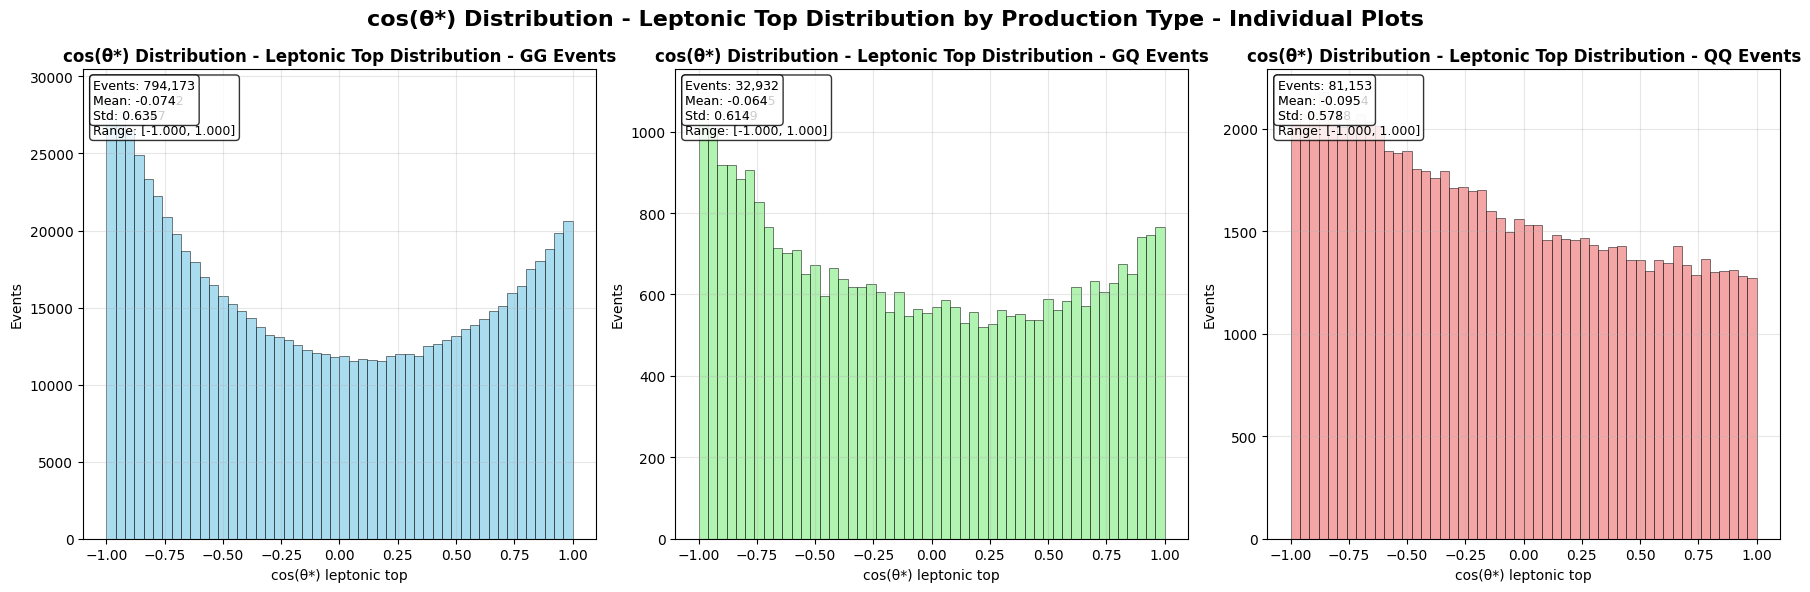

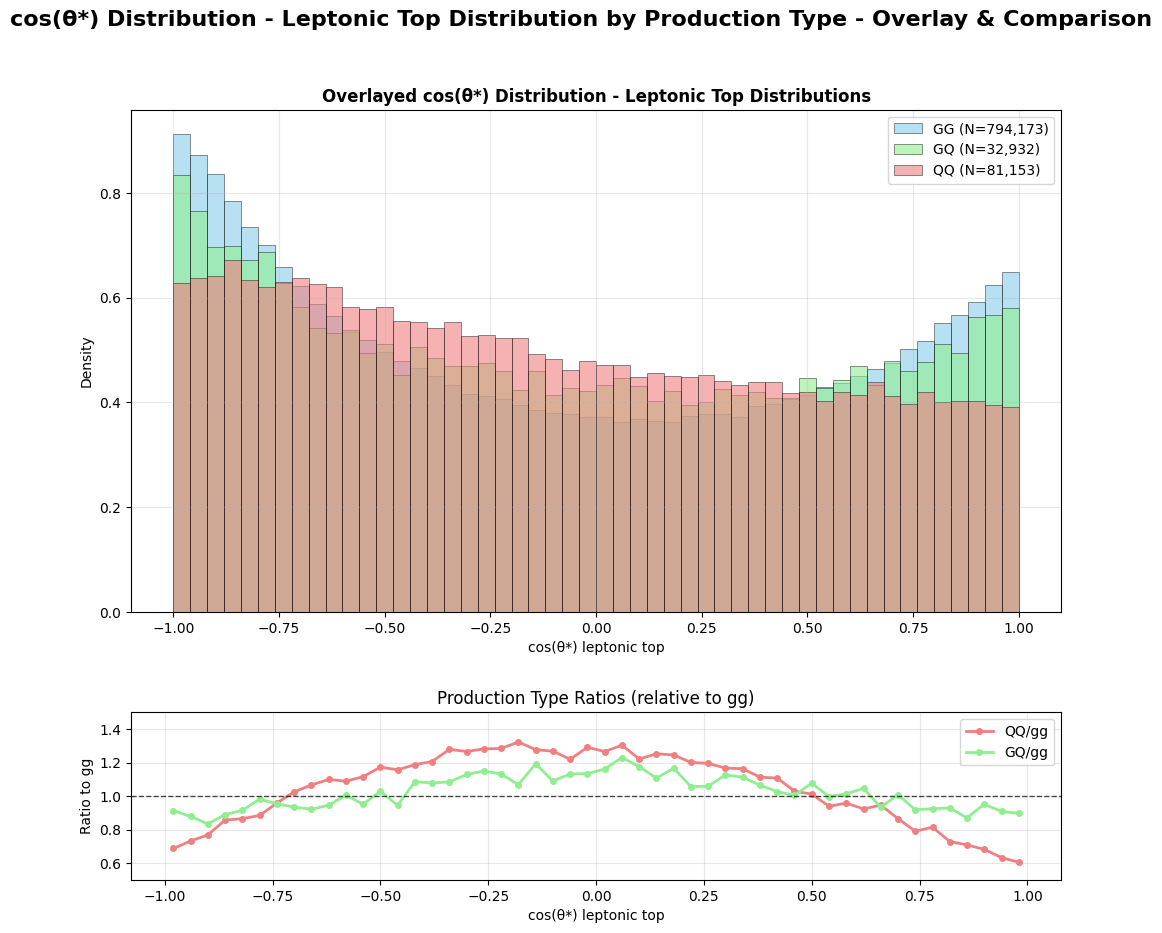

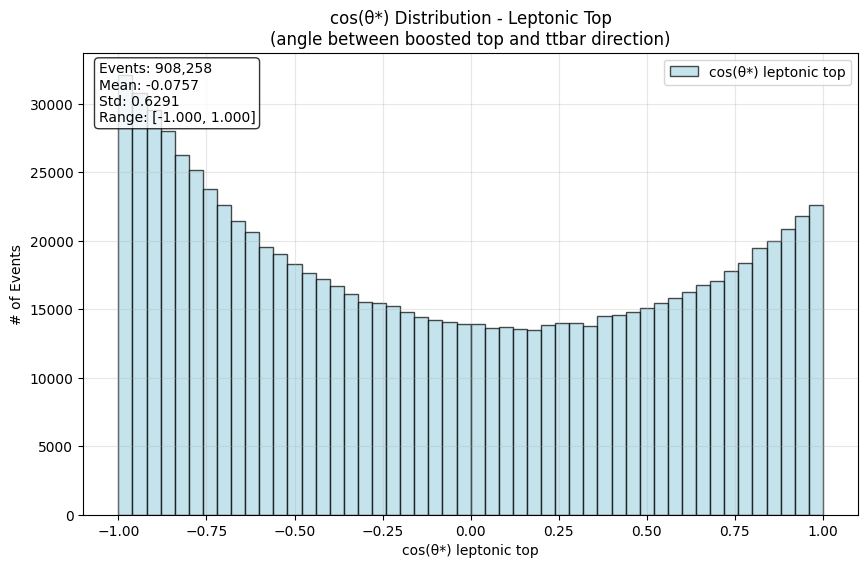

In [54]:
# Plot cos(θ*) distribution for leptonic top
print("🔬 cos(θ*) Analysis for Leptonic Top by Production Type")
print("=" * 60)

# Filter out failed calculations (-55.0)
valid_mask_lep = ttbar_CosTstar_lep != -55.0
CosTstar_lep_valid = ttbar_CosTstar_lep[valid_mask_lep]
df_cut_valid_lep = df_cut[valid_mask_lep].reset_index(drop=True)

print(f"Valid cos(θ*) calculations for leptonic top: {len(CosTstar_lep_valid)} out of {len(ttbar_CosTstar_lep)} ({100*len(CosTstar_lep_valid)/len(ttbar_CosTstar_lep):.1f}%)")

if len(CosTstar_lep_valid) > 0:
    # Apply the function to analyze cos(θ*) for leptonic top
    fig = mplt.plot_variable_by_production_type(
        df=df_cut_valid_lep, 
        variable_array=CosTstar_lep_valid,
        variable_name="cos(θ*) leptonic",
        FileName=preSavefig+'CosTstar_lep_prod_type'+sufSavefig,
        xlabel=r'cos(θ*) leptonic top',
        title_prefix=r'cos(θ*) Distribution - Leptonic Top',
        overlay_bins=50
    )
    
    # Also create a simple distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist(CosTstar_lep_valid, bins=50, alpha=0.7, edgecolor='black', density=False, 
             label='cos(θ*) leptonic top', color='lightblue')
    plt.xlabel(r'cos(θ*) leptonic top')
    plt.ylabel('# of Events')
    plt.title('cos(θ*) Distribution - Leptonic Top\n(angle between boosted top and ttbar direction)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add statistics
    stats_text = (f'Events: {len(CosTstar_lep_valid):,}\n'
                 f'Mean: {CosTstar_lep_valid.mean():.4f}\n'
                 f'Std: {CosTstar_lep_valid.std():.4f}\n'
                 f'Range: [{CosTstar_lep_valid.min():.3f}, {CosTstar_lep_valid.max():.3f}]')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.savefig(preSavefig+'CosTstar_lep_all'+sufSavefig)
    plt.show()
    
else:
    print("❌ No valid cos(θ*) calculations for leptonic top to plot")

🔬 Comparing cos(θ*) Distributions: Hadronic vs Leptonic Tops


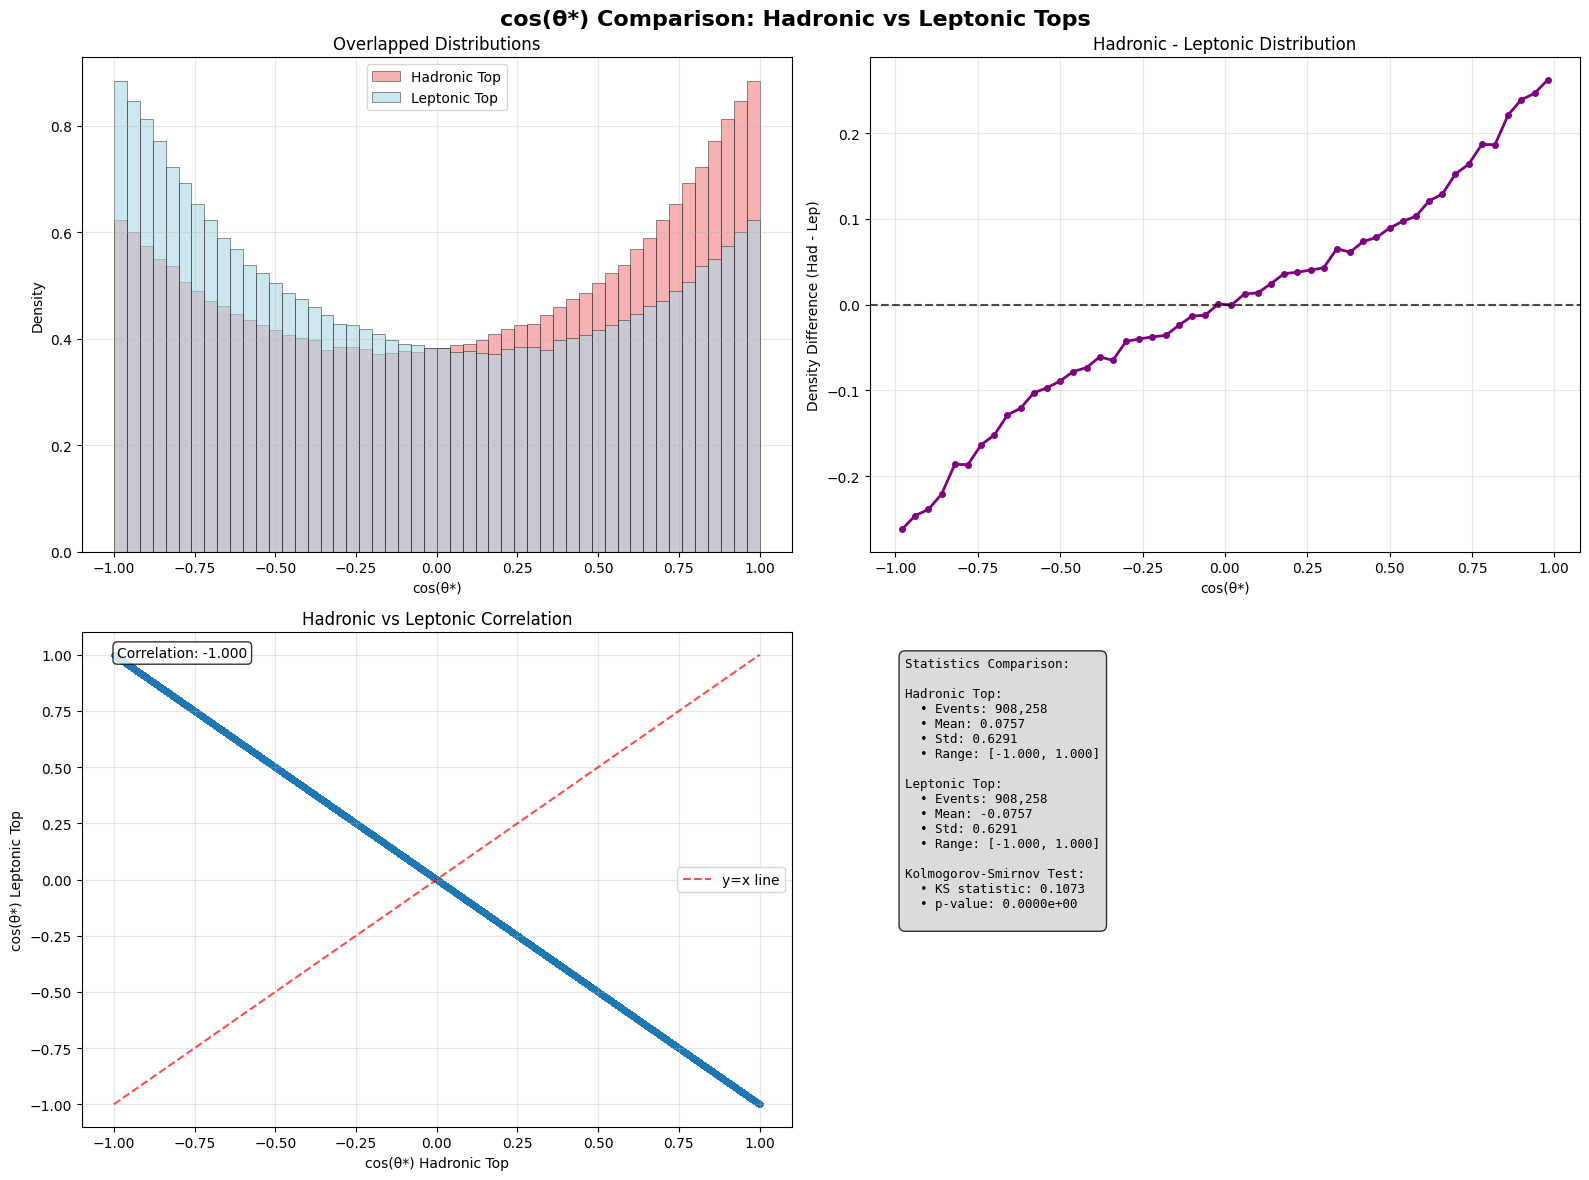


📊 Summary:
   • Hadronic cos(θ*): mean = 0.0757, std = 0.6291
   • Leptonic cos(θ*): mean = -0.0757, std = 0.6291
   • Mean difference: 0.1514
   • KS test p-value: 0.0000e+00
   • The distributions are significantly different (p < 0.05)


In [55]:
# Comparison plot: Hadronic vs Leptonic cos(θ*) distributions
print("🔬 Comparing cos(θ*) Distributions: Hadronic vs Leptonic Tops")
print("=" * 65)

# Use both valid datasets
if len(CosTstar_had_valid) > 0 and len(CosTstar_lep_valid) > 0:
    
    # Create comparison figure
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('cos(θ*) Comparison: Hadronic vs Leptonic Tops', fontsize=16, fontweight='bold')
    
    # Plot 1: Side-by-side histograms
    ax1 = axes[0, 0]
    bins = np.linspace(-1, 1, 51)
    ax1.hist(CosTstar_had_valid, bins=bins, alpha=0.6, label='Hadronic Top', 
             color='lightcoral', edgecolor='black', linewidth=0.5, density=True)
    ax1.hist(CosTstar_lep_valid, bins=bins, alpha=0.6, label='Leptonic Top', 
             color='lightblue', edgecolor='black', linewidth=0.5, density=True)
    ax1.set_xlabel(r'cos(θ*)')
    ax1.set_ylabel('Density')
    ax1.set_title('Overlapped Distributions')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Difference between distributions
    ax2 = axes[0, 1]
    counts_had, edges = np.histogram(CosTstar_had_valid, bins=bins, density=True)
    counts_lep, _ = np.histogram(CosTstar_lep_valid, bins=bins, density=True)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    difference = counts_had - counts_lep
    
    ax2.plot(bin_centers, difference, 'o-', color='purple', linewidth=2, markersize=4)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    ax2.set_xlabel(r'cos(θ*)')
    ax2.set_ylabel('Density Difference (Had - Lep)')
    ax2.set_title('Hadronic - Leptonic Distribution')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Correlation plot (if events match)
    ax3 = axes[1, 0]
    if len(CosTstar_had_valid) == len(CosTstar_lep_valid):
        ax3.scatter(CosTstar_had_valid, CosTstar_lep_valid, alpha=0.5, s=10)
        ax3.plot([-1, 1], [-1, 1], 'r--', label='y=x line', alpha=0.7)
        ax3.set_xlabel(r'cos(θ*) Hadronic Top')
        ax3.set_ylabel(r'cos(θ*) Leptonic Top')
        ax3.set_title('Hadronic vs Leptonic Correlation')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Calculate correlation
        correlation = np.corrcoef(CosTstar_had_valid, CosTstar_lep_valid)[0, 1]
        ax3.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=ax3.transAxes, fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    else:
        ax3.text(0.5, 0.5, 'Different number of\nvalid events\nfor correlation', 
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Hadronic vs Leptonic Correlation')
    
    # Plot 4: Statistics comparison
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Statistics table
    stats_text = "Statistics Comparison:\n\n"
    stats_text += "Hadronic Top:\n"
    stats_text += f"  • Events: {len(CosTstar_had_valid):,}\n"
    stats_text += f"  • Mean: {CosTstar_had_valid.mean():.4f}\n"
    stats_text += f"  • Std: {CosTstar_had_valid.std():.4f}\n"
    stats_text += f"  • Range: [{CosTstar_had_valid.min():.3f}, {CosTstar_had_valid.max():.3f}]\n\n"
    
    stats_text += "Leptonic Top:\n"
    stats_text += f"  • Events: {len(CosTstar_lep_valid):,}\n"
    stats_text += f"  • Mean: {CosTstar_lep_valid.mean():.4f}\n"
    stats_text += f"  • Std: {CosTstar_lep_valid.std():.4f}\n"
    stats_text += f"  • Range: [{CosTstar_lep_valid.min():.3f}, {CosTstar_lep_valid.max():.3f}]\n\n"
    
    # Statistical tests
    from scipy import stats
    ks_stat, ks_pvalue = stats.ks_2samp(CosTstar_had_valid, CosTstar_lep_valid)
    stats_text += f"Kolmogorov-Smirnov Test:\n"
    stats_text += f"  • KS statistic: {ks_stat:.4f}\n"
    stats_text += f"  • p-value: {ks_pvalue:.4e}\n"
    
    ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=9,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(preSavefig+'CosTstar_comparison_had_vs_lep'+sufSavefig, dpi=50)
    plt.show()
    
    # Print summary
    print(f"\n📊 Summary:")
    print(f"   • Hadronic cos(θ*): mean = {CosTstar_had_valid.mean():.4f}, std = {CosTstar_had_valid.std():.4f}")
    print(f"   • Leptonic cos(θ*): mean = {CosTstar_lep_valid.mean():.4f}, std = {CosTstar_lep_valid.std():.4f}")
    print(f"   • Mean difference: {CosTstar_had_valid.mean() - CosTstar_lep_valid.mean():.4f}")
    print(f"   • KS test p-value: {ks_pvalue:.4e}")
    
    if ks_pvalue < 0.05:
        print(f"   • The distributions are significantly different (p < 0.05)")
    else:
        print(f"   • The distributions are not significantly different (p ≥ 0.05)")
        
else:
    print("❌ Cannot create comparison plot - insufficient valid data for both tops")

### Creating the output df to feed to DNN

In [84]:
# Create new output dataframe with selected columns and computed arrays
print("📊 Creating df_output with selected columns and computed arrays")
print("=" * 60)

# Group 1: Columns to copy from df_cut
df_cut_columns = [
    'beta','prod_type'
]

# Group 2: Arrays to add as new columns (with their names)
array_columns = {
    'ttbar_mass_cut': ttbar_mass_cut,
    'ttbar_betaz_cut_abs': abs(ttbar_betaz_cut),
    'ttbar_pT': ttbar_pT,
    'jets_per_event': jets_per_event,
    'bbbar_deltaeta': bbbar_deltaeta,
    'bbbar_deltaR': bbbar_deltaR,
    'ttbar_deltaeta': ttbar_deltaeta,
    'ttbar_deltaR': ttbar_deltaR,
    'ttbar_D_variable': ttbar_D_variable,
    'ttbar_Cos_han_variable': ttbar_Cos_han_variable,
    'ttbar_CosTstar_had': ttbar_CosTstar_had,
    'ttbar_CosTstar_lep': ttbar_CosTstar_lep
}

# Start with copying the specified columns from df_cut
print("🔄 Copying columns from df_cut...")
df_output = df_cut[df_cut_columns].copy()

# Add the computed arrays as new columns
print("🔄 Adding computed arrays as new columns...")
for column_name, array_data in array_columns.items():
    # Ensure array length matches dataframe length
    if len(array_data) == len(df_output):
        df_output[column_name] = array_data
        print(f"   ✅ Added {column_name}: {len(array_data)} values")
    else:
        print(f"   ❌ Skipped {column_name}: length mismatch ({len(array_data)} vs {len(df_output)})")

# Display information about the new dataframe
print(f"\n📈 df_output Statistics:")
print(f"   • Shape: {df_output.shape}")
print(f"   • Total columns: {len(df_output.columns)}")
print(f"   • Memory usage: {df_output.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📋 df_output Columns:")
print("   Original df_cut columns:")
for col in df_cut_columns:
    if col in df_output.columns:
        print(f"      ✅ {col}")
    else:
        print(f"      ❌ {col} (not found in df_cut)")

print("   New array columns:")
for col_name in array_columns.keys():
    if col_name in df_output.columns:
        print(f"      ✅ {col_name}")
    else:
        print(f"      ❌ {col_name} (failed to add)")

print(f"\n✅ df_output created successfully!")
print(f"💾 Ready for analysis and export")


📊 Creating df_output with selected columns and computed arrays
🔄 Copying columns from df_cut...
🔄 Adding computed arrays as new columns...
   ✅ Added ttbar_mass_cut: 908258 values
   ✅ Added ttbar_betaz_cut_abs: 908258 values
   ✅ Added ttbar_pT: 908258 values
   ✅ Added jets_per_event: 908258 values
   ✅ Added bbbar_deltaeta: 908258 values
   ✅ Added bbbar_deltaR: 908258 values
   ✅ Added ttbar_deltaeta: 908258 values
   ✅ Added ttbar_deltaR: 908258 values
   ✅ Added ttbar_D_variable: 908258 values
   ✅ Added ttbar_Cos_han_variable: 908258 values
   ✅ Added ttbar_CosTstar_had: 908258 values
   ✅ Added ttbar_CosTstar_lep: 908258 values

📈 df_output Statistics:
   • Shape: (908258, 14)
   • Total columns: 14
   • Memory usage: 168.91 MB

📋 df_output Columns:
   Original df_cut columns:
      ✅ beta
      ✅ prod_type
   New array columns:
      ✅ ttbar_mass_cut
      ✅ ttbar_betaz_cut_abs
      ✅ ttbar_pT
      ✅ jets_per_event
      ✅ bbbar_deltaeta
      ✅ bbbar_deltaR
      ✅ ttbar_de

In [86]:
#Saving the new df
df_output.to_pickle('df_outputDNN.pkl')